
# Lab 3 Clustering-- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

<div class="alert alert-info"><h1>
<font color=red>[Click to this link to go to the beginning of LAB 3](#LAB3)</font>
</h1></div>


### Introduction.

North Carolina students continue to make gains on most measures of student learning, according to school accountability data released (News Release School-Year 2016-2017) to the State Board of Education, with more than 75 percent of public schools overall earning grades of C or better in the third year of the state’s A-F grading system.

School grades, required by state law, continue to correlate closely with the poverty levels of schools. Among all schools last year that received a D or F, 93 percent had enrollments with at least 50 percent of students from low-income families. Conversely, among schools that received at least a B, 75.7 percent had enrollments with less than 50 percent of students from low-income families.

In terms of growth achieved by schools this past year, 27.5 percent exceeded expected growth, virtually unchanged from 2014-15; 46.1 percent of schools met their expected performance, up from 44.7 percent in the previous year; and 26.4 percent fell short of their expected result, down from 27.7 percent the year before. The percentages of schools falling into the three growth categories have remained constant since 2012-13, with slight annual fluctuations up and down.

Full News Release Article http://www.ncpublicschools.org/newsroom/news/2016-17/20160901-01



###  Part 1: Data Preparation - Define and prepare class variables


>#### Data Source

>For this project we'll be using the North Carolina Schools education data set. The data we use is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI) which is charged with implementing the state's public-school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

>Our starting datasets [All_Data_By_School_Final] and [1516_Test_Scores] were taken from Dr. Drews GitHub https://github.com/jakemdrew/EducationDataNC where he combines multiple datasets from North Carolina Schools education data, preprocesses them and cleans them for Machine learning.

>We performed Visualization of high school’s data subset from this data, in our visualization lab hosted at https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.

>To gauge the health of the education system in the state of North Carolina, our team is going to focus on building models to classify the four-year graduation rate `Graduation_Rate4_Yr` on High school data. 
 
>Our team will build classification models to classify schools based on graduation rate of High Schools. We will begin by creating a categorical feature "Above_Avg_Graduation_Rate4_Yr" based `Graduation_Rate4_Yr`. "Above_Avg_Graduation_Rate4_Yr" is a binary feature binning schools as 1 if their Graduation_Rate4_Yr is above North Carolina (NC) four-year average High school graduation rate (85.4%) per http://www.dpi.state.nc.us/newsroom/news/2015-16/20150902-01 or 0 if the school’s Graduation_Rate4_Yr is below the NC State Average graduation rate. We will look at ROC curves, AUC, confusion matrix to see how well our classifiers fit our data perform.

>For both cases our team hopes to measure the accuracy and performance of our models by leveraging Stratified 10-Fold Cross Validation which will be discussed in detail in our results section of this report.

#### Loading the data

>In the code block below, we import python modules that we will use in our analysis and load [All_Data_By_School_Final] and [1516_Test_Scores] from Dr. Drews GitHub https://github.com/jakemdrew/EducationDataNC. All_Data_By_School_Final has 2579 rows, 293 features. Dr. Drew consolidated All_Data_By_School_Final from various tables within the NC Statistical Profiles and Report Card Databases. Each row represents a public school in the state of North Carolina and each feature is a school's attainment level. 1516_Test_Scores on the other end is school level attainment data containing 2669 rows, 73 features. The rows represent a school and the features are Percentage of entire student body meeting various subject, End of Grade (EOG), End of Course (EOC), ACT and Graduation Rate benchmarks.

>All_Data_By_School_Final and 1516_Test_Scores get merged on 'unit_code': a unique identifier for the schools in the state of North Carolina to form 'SchoolData' which we will proceed with for further preprocessing.


In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Command for plots to appear in the iPython Notebook
%matplotlib inline
wd = os.getcwd() #get working directory

#Read in raw data

#Get school level data
url="https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/Other%20Projects/Raw%20Datasets/All_Data_By_School_Final.csv"
schoolData=pd.read_csv(url, low_memory=False)


#Get test scores level data 
url="https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/Other%20Projects/Raw%20Datasets/1516_Test_Scores.csv"
testScores=pd.read_csv(url, low_memory=False)

#Review raw data before the join
schoolData.info()

#join files using school / unit code
# schoolData = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
schoolData = schoolData.merge(testScores, on='unit_code', how='left', suffixes=('_schoolData', '_testScores'))
schoolData.info()


C:\Users\kevolo\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 365 entries, Year to Passing_Math_III
dtypes: float64(324), int64(17), object(24)
memory usage: 7.2+ MB


In [7]:
schoolData.shape

(2579, 353)

In [8]:
#Remove fields not needed for machine learning
# Code block below is taken from Dr. Drew's notebook on graduation rate from his github link above.
excludeFields = ['Year','unit_code_schoolData', 'street_ad','scity_ad','state_ad','szip_ad','Closed_Ind_Text','New_ind_Txt',
                 'grades_BYOD','grades_1_to_1_access','District Name','unit_code_testScores','School Name','SBE District']

keepFields = [col for col in schoolData.columns if col not in excludeFields]

schoolData = schoolData[keepFields]

schoolData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2578
Columns: 353 entries, unit_code to Passing_Math_III
dtypes: bool(8), float64(324), int64(8), object(13)
memory usage: 6.8+ MB


In [9]:
schoolData.shape

(2579, 353)

> In the code block above we drop 12 features from our dataset from the get go. These are features that are unique for each of the records i.e. Street_ad, State_ad, School name etc. Since these features are unique to each record, they won't add value to our machine learning models.

In [10]:
#Clean up the dataset for machine learning 
boolFields = ['title1_type_flg', 'clp_ind_flg', 'focus_clp_flg', 'summer_program_flg', 
              'asm_no_spg_flg', 'no_data_spg_flg', 'stem_flg']

# Map flag fields into bool 
schoolData['title1_type_flg'] = schoolData['title1_type_flg'].map({-1:True, 0:False})
schoolData['clp_ind_flg'] = schoolData['clp_ind_flg'].map({-1:True, 0:False})
schoolData['focus_clp_flg'] = schoolData['focus_clp_flg'].map({-1:True, 0:False})
schoolData['summer_program_flg'] = schoolData['summer_program_flg'].map({-1:True, 0:False})
schoolData['asm_no_spg_flg'] = schoolData['asm_no_spg_flg'].map({-1:True, 0:False})
schoolData['no_data_spg_flg'] = schoolData['no_data_spg_flg'].map({-1:True, 0:False})
schoolData['stem_flg'] = schoolData['stem_flg'].map({-1:True, 0:False})

#
schoolData['esea_status'] = schoolData['esea_status'].map({'P':'Esea_Pass', 'F':'Esea_Fail', np.nan:'Non_Esea'})
schoolData['Grad_project_status'] = schoolData['Grad_project_status'].map({'Y':True, 'N':False, np.nan:False})

> In the code block above taken from Dr.Drews notebook, boolean fields are mapped into 1s and 0s for machine learning

In [11]:
highSchools = schoolData [((schoolData.category_cd == 'H') | 
                          (schoolData.category_cd == 'T') | 
                          (schoolData.category_cd == 'A'))&
                          (schoolData.Graduation_Rate4_Yr > 0) &
                          (schoolData.student_num > 0) & 
                          (schoolData.type_cd_txt == 'Public') & 
                          (schoolData.school_type_txt == 'Regular School')
                         ]

highSchools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 116 to 2419
Columns: 353 entries, unit_code to Passing_Math_III
dtypes: float64(324), int64(8), object(21)
memory usage: 1.2+ MB


In [12]:
#highSchools =schoolData.copy()

In [13]:
highSchools.shape

(440, 353)

> Since our team targets to classify and build models to predict High schools’ four-year graduation rate, the data was filtered to only schools’ categories that have high school grades based on category_cd flag. Our resulting dataset has 440 records.

> In the code block below taken from Dr. Drew's notebook, 225 columns are dropped from our high school data based on several reasons ranging from; feature not being applicable to High Schools, features having the same value for all the records, to duplicated fields or having 100% NANs. Please refer to comments as to why a column was dropped.


In [14]:
#High school - excluded fields and reasons
excludeFeaturesHS = ['no_data_spg_flg', #all false or NaN               
 'Avg_Class_Size_00', #NA for High Schools
 'Avg_Class_Size_01', #NA for High Schools
 'Avg_Class_Size_02', #NA for High Schools
 'Avg_Class_Size_03', #NA for High Schools
 'Avg_Class_Size_04', #NA for High Schools
 'Avg_Class_Size_05', #NA for High Schools
 'Avg_Class_Size_06', #NA for High Schools
 'Avg_Class_Size_07', #NA for High Schools
 'Avg_Class_Size_08', #NA for High Schools
 'Avg_Dist_Size_00', #NA for High Schools
 'Avg_Dist_Size_01', #NA for High Schools
 'Avg_Dist_Size_02', #NA for High Schools
 'Avg_Dist_Size_03', #NA for High Schools
 'Avg_Dist_Size_04', #NA for High Schools
 'Avg_Dist_Size_05', #NA for High Schools
 'Avg_Dist_Size_06', #NA for High Schools
 'Avg_Dist_Size_07', #NA for High Schools
 'Avg_Dist_Size_08', #NA for High Schools
 'Avg_State_Size_00', #NA for High Schools
 'Avg_State_Size_01', #NA for High Schools
 'Avg_State_Size_02', #NA for High Schools
 'Avg_State_Size_03', #NA for High Schools
 'Avg_State_Size_04', #NA for High Schools
 'Avg_State_Size_05', #NA for High Schools
 'Avg_State_Size_06', #NA for High Schools
 'Avg_State_Size_07', #NA for High Schools
 'Avg_State_Size_08', #NA for High Schools

 'total_expense_num', #494 NaN
 'salary_expense_pct', #494 NaN
 'services_expense_pct', #494 NaN
 'supplies_expense_pct', #494 NaN
 'instruct_equip_exp_pct', #494 NaN
 'other_expense_pct', #494 NaN
 'federal_perpupil_num', #494 NaN
 'local_perpupil_num', #494 NaN
 'state_perpupil_num', #494 NaN
 'lea_other_expense_pct', #All 0 or NaN
 'st_total_expense_num', #Same Value
 'st_salary_expense_pct', #Same Value
 'st_benefits_expense_pct', #Same Value
 'st_services_expense_pct', #Same Value
 'st_supplies_expense_pct', #Same Value
 'st_instruct_equip_exp_pct', #Same Value
 'st_other_expense_pct', #Same Value
 'st_federal_perpupil_num', #Same Value
 'st_local_perpupil_num', #Same Value
 'st_state_perpupil_num', #Same Value
 'Reading SPG Grade', #NA for High Schools
 'Reading  SPG Score', #NA for High Schools
 'Math SPG Grade', #NA for High Schools
 'Math SPG Score', #NA for High Schools
 'Read Score', #NA for High Schools
 'Math Score', #NA for High Schools
 'Science Score', #NA for High Schools
 'ACT WorkKeys Score', #81 NaN
 'GCE_LEP_School_Pct', #440 NaN
 'GCE_PRM_School_Pct', #440 NaN
 'GCE_RPF_School_Pct', #440 NaN
 'GCE_SWD_School_Pct', #440 NaN
 'PASSED_EOG_School_Pct', #438 NaN
 'PASSED_LAA_School_Pct', #440 NaN
 'PASSED_RTA_School_Pct', #440 NaN
 'PROMOTED_School_Pct', #438 NaN
 'RETAINED_School_Pct', #440 NaN
 'GCE_ALL_Dist_Pct', #437 NaN
 'GCE_LEP_Dist_Pct', #440 NaN
 'GCE_PRM_Dist_Pct', #440 NaN
 'GCE_RPF_Dist_Pct', #439 NaN
 'GCE_SWD_Dist_Pct', #438 NaN
 'PASSED_EOG_Dist_Pct', #437 NaN
 'PASSED_LAA_Dist_Pct', #438 NaN
 'PASSED_RTA_Dist_Pct', #440 NaN
 'PROMOTED_Dist_Pct', #437 NaN
 'RETAINED_Dist_Pct', #438 NaN
 'GCE_ALL_State_Pct', #437 NaN
 'GCE_LEP_State_Pct', #440 NaN
 'GCE_PRM_State_Pct', #440 NaN
 'GCE_RPF_State_Pct', #440 NaN
 'GCE_SWD_State_Pct', #437 NaN
 'PASSED_EOG_State_Pct', #437 NaN
 'PASSED_LAA_State_Pct', #437 NaN
 'PASSED_RTA_State_Pct', #440 NaN
 'PROMOTED_State_Pct', #437 NaN
 'RETAINED_State_Pct', #437 NaN
 'st_sat_avg_score_num  ', #All Same Value 
 'nat_sat_avg_score_num', #All Same Value
 'st_sat_participation_pct', #All Same Value 
 'nat_sat_participation_pct', #All Same Value
 'esea_attendance', #440 NaN
 'lea_esea_attendance', #440 NaN
 'st_ap_participation_pct', #All Same Value
 'st_ap_pct_3_or_above', #All Same Value
 'ib_participation_pct', #434 NaN
 'lea_ib_participation_pct', #440 NaN
 'st_ib_participation_pct', #440 NaN
 'ib_pct_4_or_above', #416 NaN
 'lea_ib_pct_4_or_above', #261 NaN
 'st_ib_pct_4_or_above', #All Same Value
 'st_total_specialized_courses', #All Same Value
 'st_ap_ib_courses ', #All Same Value
 'st_cte_courses', #All Same Value
 'st_univ_college_courses', #All Same Value
 'ttl_crimes_num', #440 NaN
 'st_expelled_per_c_num', #All Same Value
 'st_avg_age_media_collection ', #All Same Value
 'st_books_per_student', #All Same Value
 'st_wap_num', #All Same Value
 'st_wap_per_classroom', #All Same Value
 'prin_other_pct', #440 NaN
 'prinyrs_0thru3_pct', #440 NaN
 'prinyrs_4thru10_pct', #440 NaN
 'prinyrs_11plus_pct', #440 NaN
 'prin_advance_dgr_pct', #440 NaN
 '_1yr_prin_trnovr_pct', #440 NaN
 'prin_male_pct', #440 NaN
 'prin_female_pct', #440 NaN
 'prin_black_pct', #440 NaN
 'prin_white_pct', #440 NaN
 'emer_prov_teach_pct    ', #385 NaN 
 'st_highqual_class_hp_pct ', #All Same Value
 'st_highqual_class_lp_pct ', #All Same Value
 'st_highqual_class_all_pct ', #All Same Value
 'st_not_highqual_class_hp_pct ', #All Same Value
 'st_not_highqual_class_lp_pct ', #All Same Value
 'st_not_highqual_class_all_pct ', #All Same Value
 'st_prinyrs_0thru3_pct ', #All Same Value
 'st_prinyrs_4thru10_pct ', #All Same Value
 'st_prinyrs_11plus_pct', #All Same Value
 'st_prin_advance_dgr_pct', #All Same Value
 'st_1yr_prin_trnovr_pct ', #All Same Value
 'st_prin_male_pct ', #All Same Value
 'st_prin_female_pct ', #All Same Value
 'st_prin_black_pct ', #All Same Value
 'st_prin_white_pct', #All Same Value
 'st_prin_other_pct', #All Same Value
 'State_Prin_Exp_Pct_0_3_Years ', #All Same Value
 'State_Prin_Exp_Pct_4_10_Years ', #All Same Value
 'State_Prin_Exp_Pct_10+_Years ', #All Same Value
 'All_EOG_Subjects_CACR', #428 NaN 
 'All_EOG_Subjects_GLP', #428 NaN 
 
 'EOG_Gr3_CACR', #NA for High Schools
 'EOG_Gr3_GLP', #NA for High Schools
 'EOG_Gr4_CACR', #NA for High Schools
 'EOG_Gr4_GLP', #NA for High Schools
 'EOG_Gr5_CACR', #NA for High Schools
 'EOG_Gr5_GLP', #NA for High Schools
 'EOG_Gr6_CACR', #NA for High Schools
 'EOG_Gr6_GLP', #NA for High Schools
 'EOG_Gr7_CACR', #NA for High Schools
 'EOG_Gr7_GLP', #NA for High Schools
 'EOG_Gr8_CACR', #NA for High Schools
 'EOG_Gr8_GLP', #NA for High Schools
 'EOG_Math_Gr3_CACR', #NA for High Schools
 'EOG_Math_Gr3_GLP', #NA for High Schools
 'EOG_Math_Gr3-8_CACR', #NA for High Schools
 'EOG_Math_Gr3-8_GLP', #NA for High Schools
 'EOG_Math_Gr4_CACR', #NA for High Schools
 'EOG_Math_Gr4_GLP', #NA for High Schools
 'EOG_Math_Gr5_CACR', #NA for High Schools
 'EOG_Math_Gr5_GLP', #NA for High Schools
 'EOG_Math_Gr6_CACR', #NA for High Schools
 'EOG_Math_Gr6_GLP', #NA for High Schools
 'EOG_Math_Gr7_CACR', #NA for High Schools
 'EOG_Math_Gr7_GLP', #NA for High Schools
 'EOG_Math_Gr8_CACR', #NA for High Schools
 'EOG_Math_Gr8_GLP', #NA for High Schools
 'EOG_Reading_G3_GLP', #NA for High Schools
 'EOG_Reading_Gr3_CACR', #NA for High Schools
 'EOG_Reading_Gr4_CACR', #NA for High Schools
 'EOG_Reading_Gr4_GLP', #NA for High Schools
 'EOG_Reading_Gr5_CACR', #NA for High Schools
 'EOG_Reading_Gr5_GLP', #NA for High Schools
 'EOG_Reading_Gr6_CACR', #NA for High Schools
 'EOG_Reading_Gr6_GLP', #NA for High Schools
 'EOG_Reading_Gr7_CACR', #NA for High Schools
 'EOG_Reading_Gr7_GLP', #NA for High Schools
 'EOG_Reading_Gr8_CACR', #NA for High Schools
 'EOG_Reading_Gr8_GLP', #NA for High Schools
 'EOG_Reading_Grades_3_8_CACR', #NA for High Schools
 'EOG_Reading_Grades_3_8_GLP', #NA for High Schools
 'EOG_Science_Gr5_CACR', #NA for High Schools
 'EOG_Science_Gr5_GLP', #NA for High Schools
 'EOG_Science_Gr8_CACR', #NA for High Schools
 'EOG_Science_Gr8_GLP', #NA for High Schools
 'EOG_Science_Grades_5&8_CACR', #NA for High Schools
 'EOG_Science_Grades_5&8_GLP', #NA for High Schools
 'Graduation_Rate_5_Yr', #Using 4 year graduation rate as response variable
 
 'type_cd_txt', #Only 'Public' after filter
 'school_type_txt', #Only 'Regular School' after filter 
 'asm_no_spg_flg', #All False after filters
 'benefits_expense_pct', #440 NaN
 'State Gap Compared', #360 NaN
 'GCE_ALL_School_Pct', #437
 'emer_prov_teach_pct', #385 NaN
 'lea_emer_prov_teach_pct', #226 NaN 
 'Avg_State_Size_Biology', #All same value
 'Avg_State_Size_EnglishII', #All same value
 'Avg_State_Size_MathI', #All same value
 'st_sat_avg_score_num', #All same value 
 'st_ap_ib_courses', #All same value
 'st_avg_daily_attend_pct', #All same value
 'st_crime_per_c_num', #All same value
 'st_short_susp_per_c_num', #All same value
 'st_long_susp_per_c_num', #All same value
 'st_stud_internet_comp_num', #All same value
 'st_avg_age_media_collection', #All same value
 'st_flicensed_teach_pct', #All same value
 #'st_tchyrs_0thru3_pct', #All same value
 #'st_tchyrs_4thru10_pct', #All same value
 #'st_tchyrs_11plus_pct', #All same value
 'st_class_teach_num', #All same value
 'st_nbpts_num', #All same value
 'st_advance_dgr_pct', #All same value
 'st_1yr_tchr_trnovr_pct', #All same value
 'st_emer_prov_teach_pct', #All same value
 'st_lateral_teach_pct', #All same value
 'st_highqual_class_pct', #All same value
 'st_highqual_class_hp_pct', #All same value
 'st_highqual_class_lp_pct', #All same value
 'st_highqual_class_all_pct', #All same value
 'st_not_highqual_class_hp_pct', #All same value
 'st_not_highqual_class_lp_pct', #All same value
 'st_not_highqual_class_all_pct', #All same value
 'st_prinyrs_0thru3_pct', #All same value
 'st_prinyrs_4thru10_pct', #All same value
 'st_1yr_prin_trnovr_pct', #All same value
 'st_prin_male_pct', #All same value
 'st_prin_female_pct', #All same value
 'st_prin_black_pct', #All same value
 'State_Tch_Exp_Pct_0_3_Years', #All same value
 'State_Tch_Exp_Pct_4_10_Years', #All same value
 'State_Tch_Exp_Pct_10+_Years', #All same value
 'State_Prin_Exp_Pct_0_3_Years', #All same value
 'State_Prin_Exp_Pct_4_10_Years', #All same value
 'State_Prin_Exp_Pct_10+_Years', #All same value
 'st_avg_student_num', #All same value 
 #'unit_code', #School primary key, different for all records
 #-----------------------Added 01/30/2018------------------------
 #Removes dup fields to avoid Multicollinearity
 'tchyrs_0thru3_pct', #Duplicate field -> Tch_Exp_Pct_0_3_Years
 'tchyrs_4thru10_pct', #Duplicate field -> Tch_Exp_Pct_4_10_Years
 'tchyrs_11plus_pct', #Duplicate field -> Tch_Exp_Pct_10+_Years
 'lea_tchyrs_0thru3_pct', #Duplicate field -> Dist_Tch_Exp_Pct_0_3_Years
 'lea_tchyrs_4thru10_pct', #Duplicate field -> Dist_Tch_Exp_Pct_4_10_Years
 'lea_tchyrs_11plus_pct', #Duplicate field -> Dist_Tch_Exp_Pct_10+_Years
 'st_tchyrs_0thru3_pct', #Duplicate field -> State_Tch_Exp_Pct_0_3_Years
 'st_tchyrs_4thru10_pct', #Duplicate field -> State_Tch_Exp_Pct_4_10_Years
 'st_tchyrs_11plus_pct', #Duplicate field -> State_Tch_Exp_Pct_10+_Years
                    ]

keepFields = [col for col in highSchools.columns if col not in excludeFeaturesHS]

highSchools = highSchools[keepFields]

highSchools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 116 to 2419
Columns: 129 entries, unit_code to Passing_Math_III
dtypes: float64(115), object(14)
memory usage: 446.9+ KB


In [15]:
highSchools.shape

(440, 129)

#### Missing Data

In [16]:
#Review Missing values 
missing_values = highSchools.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values = missing_values[missing_values['Number Missing Values'] > 0] 

#Print all rows with missing values
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(missing_values)

                                      Variable Name  Number Missing Values
3    title1_type_flg                                 440                  
4    clp_ind_flg                                     440                  
5    focus_clp_flg                                   440                  
6    summer_program_flg                              440                  
7    esea_status                                     440                  
10   Grad_project_status                             440                  
11   stem_flg                                        440                  
12   Avg_Class_Size_Biology                          9                    
13   Avg_Class_Size_EnglishII                        8                    
14   Avg_Class_Size_MathI                            12                   
15   Avg_Dist_Size_Biology                           7                    
16   Avg_Dist_Size_EnglishII                         7                    
17   Avg_Dist_Size_MathI 

In [17]:
#Check for missing values
HighSchoolS = highSchools.copy()
Temp = pd.DataFrame(HighSchoolS.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with at least 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic stats on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No. of rows in HighSchoolS: ',len(HighSchoolS))
print('No. of Columns in HighSchoolS: ',len(HighSchoolS.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No. of Complete data columns: ', len(HighSchoolS.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(HighSchoolS)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(HighSchoolS.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(HighSchoolS)))/len(HighSchoolS.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with  missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(HighSchoolS))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(100)))

##################################################
###              Stats on missing data         ###
##################################################
No. of rows in HighSchoolS:  440
No. of Columns in HighSchoolS:  129
No. of Columns with Missing data:  79
No. of Complete data columns:  50
No. of Columns with 100% missing Values:  7
% of Columns with some Missing data:  61.24 %
% of Columns with 100% Missing data:  5.426 %
 
##################################################
###        Columns with  missing data      ###
##################################################
    DataMissing                                      ColumnName   Missing %
0   440          title1_type_flg                                 100.000000
1   440          clp_ind_flg                                     100.000000
2   440          focus_clp_flg                                   100.000000
3   440          summer_program_flg                              100.000000
4   440          esea_status           

>From above we note, of the 128 columns in High School dataset, 72 features (56.25%) of them have some missing data while 56 features (43.625) have complete data.

>Our team chose to replace missing categorical values with mode and missing continuous values with median. in the code block that follows a total of 72 columns with missing values have been cleaned.


In [18]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #categorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

HighSchools_Clean = ReplaceMissingdata(highSchools)    

HighSchools_Clean.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
unit_code                         0  
category_cd                       0  
calendar_only_txt                 0  
title1_type_flg                   440
clp_ind_flg                       440
focus_clp_flg                     440
summer_program_flg                440
esea_status                       440
student_num                       0  
lea_avg_student_num               0  
Grad_project_status               440
stem_flg                          440
Avg_Class_Size_Biology            9  
Avg_Class_Size_EnglishII          8  
Avg_Class_Size_MathI              12 
Avg_Dist_Size_Biology             7  
Avg_Dist_Size_EnglishII           7  
Avg_Dist_Size_MathI               7  
lea_total_expense_num             0  
lea_salary_expense_pct            0  
lea_benefits_expense_pct 

In [19]:
HighSchools_Clean.shape

(440, 129)

#### Final Dataset and New Features

In [20]:

#################################################
#               New Features                    #
#################################################
#1
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata =HighSchools_Clean.copy()
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["E", "D", "C",'B',"A"]))
#2 
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' , 'SPG Score', 'Cohort Graduation Rate Standard Score'] # school perfomance Weight 0.6
bin2 = ['The ACT Score' ,'Math Course Rigor Score', 'sat_avg_score_num'] # College Prep weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))

#3 Binned Graduation_Rate4_Yr for classification. We create a new feature binary feature 'Above_NC_Graduation_Rate4_Yr'. 
# The feature will be 1 if the school has a Graduation_Rate4_Yr => 85.4% which is the NC average highschool graduation rate else 0.
new_schooldata = new_schooldata.assign(Above_NC_AVG_Graduation_Rate4_Yr = np.where(new_schooldata['Graduation_Rate4_Yr']>=85.4, 1, 0))


School_Final = new_schooldata.drop(groupedbins, 1)
#School_Final.head().T


> From above code, we have created three new features.

> #### 1 .  Overall_Achievement_Score_bins: 
> This feature is used to group the Overall Achievement Scores into 5 different bins. The bins are selected based on  the splits from http://www.ncpublicschools.org/docs/accountability/reporting/spgbckgrndpack15.pdf

>> A: 85-100,

>> B: 70-84,

>> C: 55-69,

>> D: 40-54,

>> F:<40

> #### 2. SchoolWeightedScore:
> Summation of all achievement measures Scores.'EVAAS Growth Score','Overall Achievement Score’, 'SPG Score', 'Cohort Graduation Rate Standard Score' are put on bin1 and given a weight 0.6 of the overall weighted school as they describe the overall rating of a school. 'The ACT Score’, 'sat_avg_score_num', and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1.

> #### 3. Above_NC_AVG_Graduation_Rate4_Yr:
> This is categorical feature created from Graduation_Rate4_Yr in comparison to North Carolinas state average 4-year high school graduation rate. If a school's Graduation_Rate4_Yr is above 85.4% (NC State Average High School graduation rate), the school is binned as 1 else 0. We will use this feature for the classification tasks. 

Below we visualize these three newly created features.


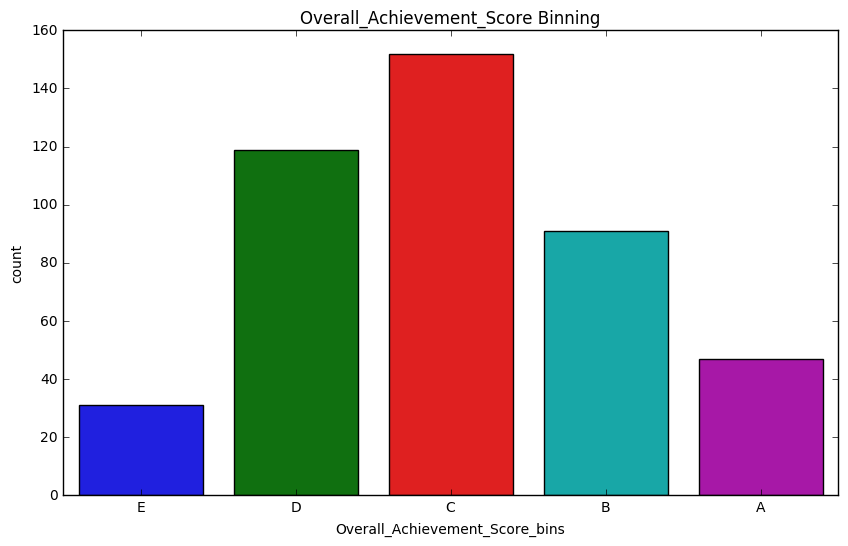

In [21]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Overall_Achievement_Score_bins", data=new_schooldata )
plt.title('Overall_Achievement_Score Binning')

In [22]:
new_schooldata.head().T

116                   122  \
unit_code                         100307                100326                 
category_cd                       H                     H                      
calendar_only_txt                 Traditional Calendar  Traditional Calendar   
title1_type_flg                   NaN                   NaN                    
clp_ind_flg                       NaN                   NaN                    
focus_clp_flg                     NaN                   NaN                    
summer_program_flg                NaN                   NaN                    
esea_status                       NaN                   NaN                    
student_num                       311                   1033                   
lea_avg_student_num               947                   947                    
Grad_project_status               NaN                   NaN                    
stem_flg                          NaN                   NaN                    
Avg_Class_Size_Biology            21                    21                     
Avg_Class_Size_EnglishII          16                    18                     
Avg_Class_Size_MathI              12                    18                     
Avg_Dist_Size_Biology             18                    18                     
Avg_Dist_Size_EnglishII           18                    18                     
Avg_Dist_Size_MathI               18                    18                     
lea_total_expense_num             9324.04               9324.04                
lea_salary_expense_pct            0.613                 0.613                  
lea_benefits_expense_pct          0.212                 0.212                  
lea_services_expense_pct          0.084                 0.084                  
lea_supplies_expense_pct          0.081                 0.081                  
lea_instruct_equip_exp_pct        0.01                  0.01                   
lea_federal_perpupil_num          1091                  1091                   
lea_local_perpupil_num            2667.56               2667.56                
lea_state_perpupil_num            5565.48               5565.48                
SPG Grade                         A                     C                      
SPG Score                         95                    63                     
EVAAS Growth Status               Exceeded              Met                    
...                                    ...              ...                    
Dist_Tch_Exp_Pct_10+_Years        0.533                 0.533                  
Dist_Prin_Exp_Pct_0_3_Years       0.526                 0.526                  
Dist_Prin_Exp_Pct_4_10_Years      0.368                 0.368                  
Dist_Prin_Exp_Pct_10+_Years       0.105                 0.105                  
ACT_Composite_Score_UNC_Min       100                   48.6                   
ACT_English_Benchmark             83.1                  30.9                   
ACT_Math_Benchmark                60                    18.2                   
ACT_Pct_of_Benchmarks_Met         60.6                  20.7                   
ACT_Reading_Benchmark             61.5                  21.4                   
ACT_Science_Benchmark             52.3                  15.9                   
ACT_WorkKeys_Silver_Beyond        74.2                  52.6                   
ACT_Writing_Benchmark             46.2                  17                     
All_EOC_Subjects_CACR             85.3                  38.9                   
All_EOC_Subjects_GLP              93.3                  50.7                   
All_EOG_EOC_Subjects_CACR         85.3                  38.9                   
All_EOG_EOC_Subjects_GLP          93.3                  50.7                   
EOC_Biology_CACR                  83.1                  49                     
EOC_Biology_GLP                   90.4                  59.4                   
EOC_English_2_CACR                93.8             

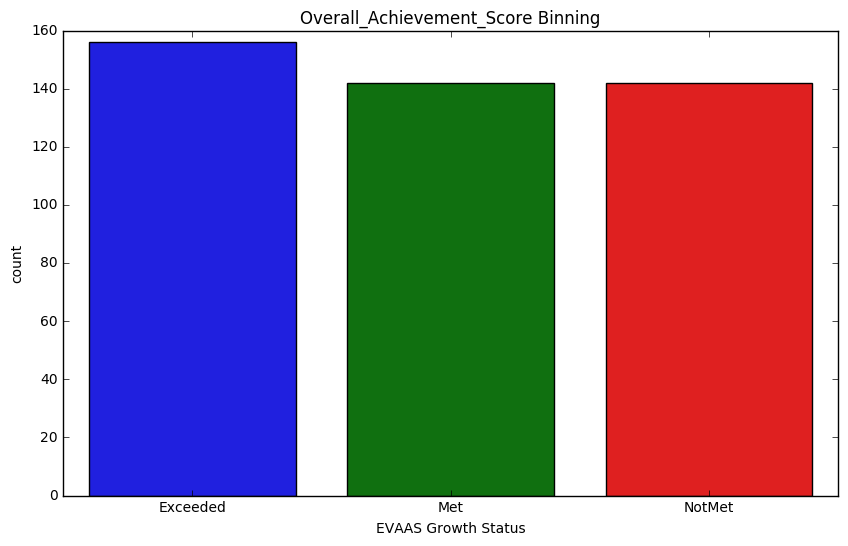

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="EVAAS Growth Status", data=new_schooldata )
plt.title('Overall_Achievement_Score Binning')

> majority of the schools have average overrall achievement score bin 56-69. For classification we will create dummy variable for each of this 5 bins.

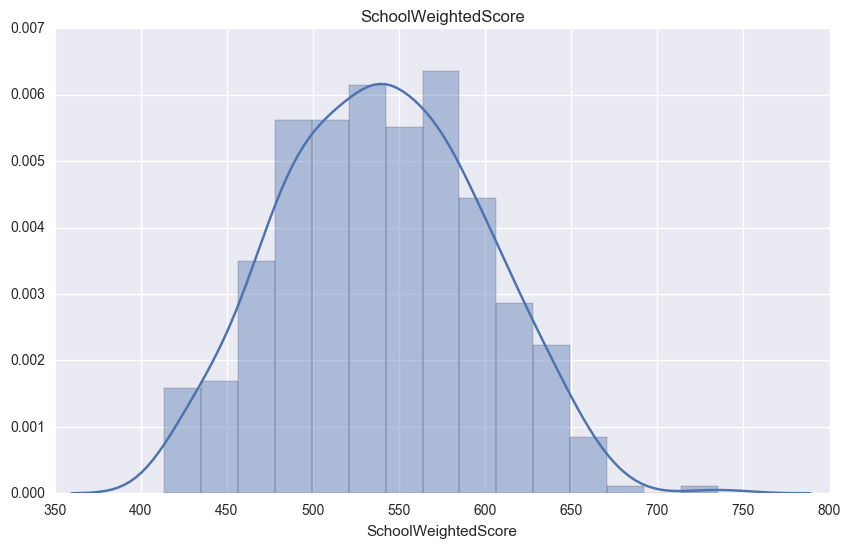

In [24]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(new_schooldata.SchoolWeightedScore);
plt.title('SchoolWeightedScore')

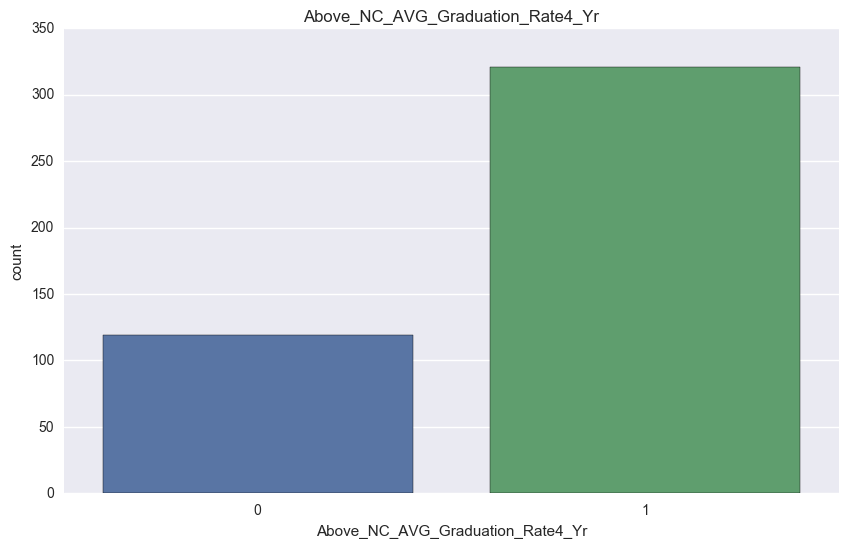

In [25]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Above_NC_AVG_Graduation_Rate4_Yr", data=new_schooldata )
plt.title('Above_NC_AVG_Graduation_Rate4_Yr')

In [29]:
modelingdata=School_Final.copy()
modelingdata.head().T

116                   122  \
unit_code                         100307                100326                 
category_cd                       H                     H                      
calendar_only_txt                 Traditional Calendar  Traditional Calendar   
title1_type_flg                   NaN                   NaN                    
clp_ind_flg                       NaN                   NaN                    
focus_clp_flg                     NaN                   NaN                    
summer_program_flg                NaN                   NaN                    
esea_status                       NaN                   NaN                    
student_num                       311                   1033                   
lea_avg_student_num               947                   947                    
Grad_project_status               NaN                   NaN                    
stem_flg                          NaN                   NaN                    
Avg_Class_Size_Biology            21                    21                     
Avg_Class_Size_EnglishII          16                    18                     
Avg_Class_Size_MathI              12                    18                     
Avg_Dist_Size_Biology             18                    18                     
Avg_Dist_Size_EnglishII           18                    18                     
Avg_Dist_Size_MathI               18                    18                     
lea_total_expense_num             9324.04               9324.04                
lea_salary_expense_pct            0.613                 0.613                  
lea_benefits_expense_pct          0.212                 0.212                  
lea_services_expense_pct          0.084                 0.084                  
lea_supplies_expense_pct          0.081                 0.081                  
lea_instruct_equip_exp_pct        0.01                  0.01                   
lea_federal_perpupil_num          1091                  1091                   
lea_local_perpupil_num            2667.56               2667.56                
lea_state_perpupil_num            5565.48               5565.48                
SPG Grade                         A                     C                      
SPG Score                         95                    63                     
EVAAS Growth Status               Exceeded              Met                    
...                                    ...              ...                    
Tch_Exp_Pct_10+_Years             0.75                  0.406                  
Dist_Tch_Exp_Pct_0_3_Years        0.262                 0.262                  
Dist_Tch_Exp_Pct_4_10_Years       0.205                 0.205                  
Dist_Tch_Exp_Pct_10+_Years        0.533                 0.533                  
Dist_Prin_Exp_Pct_0_3_Years       0.526                 0.526                  
Dist_Prin_Exp_Pct_4_10_Years      0.368                 0.368                  
Dist_Prin_Exp_Pct_10+_Years       0.105                 0.105                  
ACT_Composite_Score_UNC_Min       100                   48.6                   
ACT_English_Benchmark             83.1                  30.9                   
ACT_Math_Benchmark                60                    18.2                   
ACT_Pct_of_Benchmarks_Met         60.6                  20.7                   
ACT_Reading_Benchmark             61.5                  21.4                   
ACT_Science_Benchmark             52.3                  15.9                   
ACT_WorkKeys_Silver_Beyond        74.2                  52.6                   
ACT_Writing_Benchmark             46.2                  17                     
All_EOC_Subjects_CACR             85.3                  38.9                   
All_EOC_Subjects_GLP              93.3                  50.7                   
All_EOG_EOC_Subjects_CACR         85.3                  38.9                   
All_EOG_EOC_Subjects_GLP          93.3             

>The code block below is derived from taken from Dr. Drews notebook on. We create dummy variables then use correlation to eliminate features with more than 0.95 correlation.

In [30]:
%%time
modelingdata=School_Final.copy()
def dummy_Create(df):
    schoolDataFinal = df.copy()
    SchoolDataCat = schoolDataFinal.loc[:,(schoolDataFinal.dtypes == object) |(schoolDataFinal.dtypes == 'category')|(schoolDataFinal.dtypes == bool)]
    
    
    print(SchoolDataCat.columns)
    cat_vars1=SchoolDataCat.columns
    cat_vars=cat_vars1.copy()
    cat_vars=cat_vars1.drop('unit_code')
    #cat_vars=cat_vars.drop('Overall_Achievement_Score_bins')
    print(cat_vars)
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(schoolDataFinal[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars1=SchoolDataCat.columns
    cat_vars=cat_vars1.drop('unit_code')
    #cat_vars=cat_vars.drop('Overall_Achievement_Score_bins')
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]
    print(to_keep)
    #to_keep =to_keep.append('EVAAS Growth Status')

    ## Final data columns
    data_final=data[to_keep]
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    #y=['EVAAS Growth Status']
    #X=[i for i in data_final_vars if i not in y]
 
    #list(data_final_vars)
    #print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final)
    
modelingdata = dummy_Create(modelingdata)


Index(['unit_code', 'category_cd', 'calendar_only_txt', 'title1_type_flg',
       'clp_ind_flg', 'focus_clp_flg', 'summer_program_flg', 'esea_status',
       'Grad_project_status', 'stem_flg', 'SPG Grade', 'EVAAS Growth Status',
       'Byod', '1_to_1_access', 'Overall_Achievement_Score_bins'],
      dtype='object')
Index(['category_cd', 'calendar_only_txt', 'title1_type_flg', 'clp_ind_flg',
       'focus_clp_flg', 'summer_program_flg', 'esea_status',
       'Grad_project_status', 'stem_flg', 'SPG Grade', 'EVAAS Growth Status',
       'Byod', '1_to_1_access', 'Overall_Achievement_Score_bins'],
      dtype='object')
['unit_code', 'student_num', 'lea_avg_student_num', 'Avg_Class_Size_Biology', 'Avg_Class_Size_EnglishII', 'Avg_Class_Size_MathI', 'Avg_Dist_Size_Biology', 'Avg_Dist_Size_EnglishII', 'Avg_Dist_Size_MathI', 'lea_total_expense_num', 'lea_salary_expense_pct', 'lea_benefits_expense_pct', 'lea_services_expense_pct', 'lea_supplies_expense_pct', 'lea_instruct_equip_exp_pct', 'lea_fe

In [31]:
modelingdata.head().T

116      122      124      132  \
unit_code                               100307   100326   100334   100348    
student_num                             311      1033     1096     1346      
lea_avg_student_num                     947      947      947      947       
Avg_Class_Size_Biology                  21       21       21       20        
Avg_Class_Size_EnglishII                16       18       21       20        
Avg_Class_Size_MathI                    12       18       17       17        
Avg_Dist_Size_Biology                   18       18       18       18        
Avg_Dist_Size_EnglishII                 18       18       18       18        
Avg_Dist_Size_MathI                     18       18       18       18        
lea_total_expense_num                   9324.04  9324.04  9324.04  9324.04   
lea_salary_expense_pct                  0.613    0.613    0.613    0.613     
lea_benefits_expense_pct                0.212    0.212    0.212    0.212     
lea_services_expense_pct                0.084    0.084    0.084    0.084     
lea_supplies_expense_pct                0.081    0.081    0.081    0.081     
lea_instruct_equip_exp_pct              0.01     0.01     0.01     0.01      
lea_federal_perpupil_num                1091     1091     1091     1091      
lea_local_perpupil_num                  2667.56  2667.56  2667.56  2667.56   
lea_state_perpupil_num                  5565.48  5565.48  5565.48  5565.48   
SPG Score                               95       63       74       74        
EVAAS Growth Score                      89.6     80.6     90.9     90.9      
Overall Achievement Score               100      59       70       70        
Math I Score                            95       30       59       63        
English II Score                        100      49       57       59        
Biology Score                           88       54       66       57        
The ACT Score                           100      48       66       62        
Math Course Rigor Score                 100      100      100      100       
Cohort Graduation Rate Standard Score   100      85       84       83        
sat_avg_score_num                       1067     908      1023     963       
lea_sat_avg_score_num                   963      963      963      963       
sat_participation_pct                   0.12     0.4      0.28     0.53      
...                                      ...     ...       ...      ...      
EOC_English_2_CACR                      93.8     38.3     50.5     50.8      
EOC_English_2_GLP                       100      48.7     61.4     58.5      
EOC_Math_I_CACR                         80.3     29       41.9     44.1      
EOC_Math_I_GLP                          90.8     43.9     55.1     59.8      
Graduation_Rate4_Yr                     100      79.4     84       88.2      
Passing_Math_III                        100      100      100      100       
SchoolWeightedScore                     639.16   502.66   566.24   546.14    
Above_NC_AVG_Graduation_Rate4_Yr        1        0        0        1         
category_cd_A                           0        0        0        0         
category_cd_H                           1        1        1        1         
category_cd_T                           0        0        0        0         
calendar_only_txt_Traditional Calendar  1        1        1        1         
calendar_only_txt_Year-Round Calendar   0        0        0        0         
SPG Grade_A                             1        0        0        0         
SPG Grade_A+NG                          0        0        0        0         
SPG Grade_B                             0        0        1        1         
SPG Grade_C                             0        1        0        0         
SPG Grade_D                             0        0        0        0         
EVAAS Growth Status_Exceeded            1        0        1        1         
EVAAS Growth Status_Met                 0        1        0       

In [32]:
modelingdata.to_csv('data.csv')

<div class="alert alert-info"><h1>
<font color=red>[Click to this link to go to the beginning of LAB 3](#LAB3)</font>
</h1></div>


(440, 117)
Wall time: 409 ms


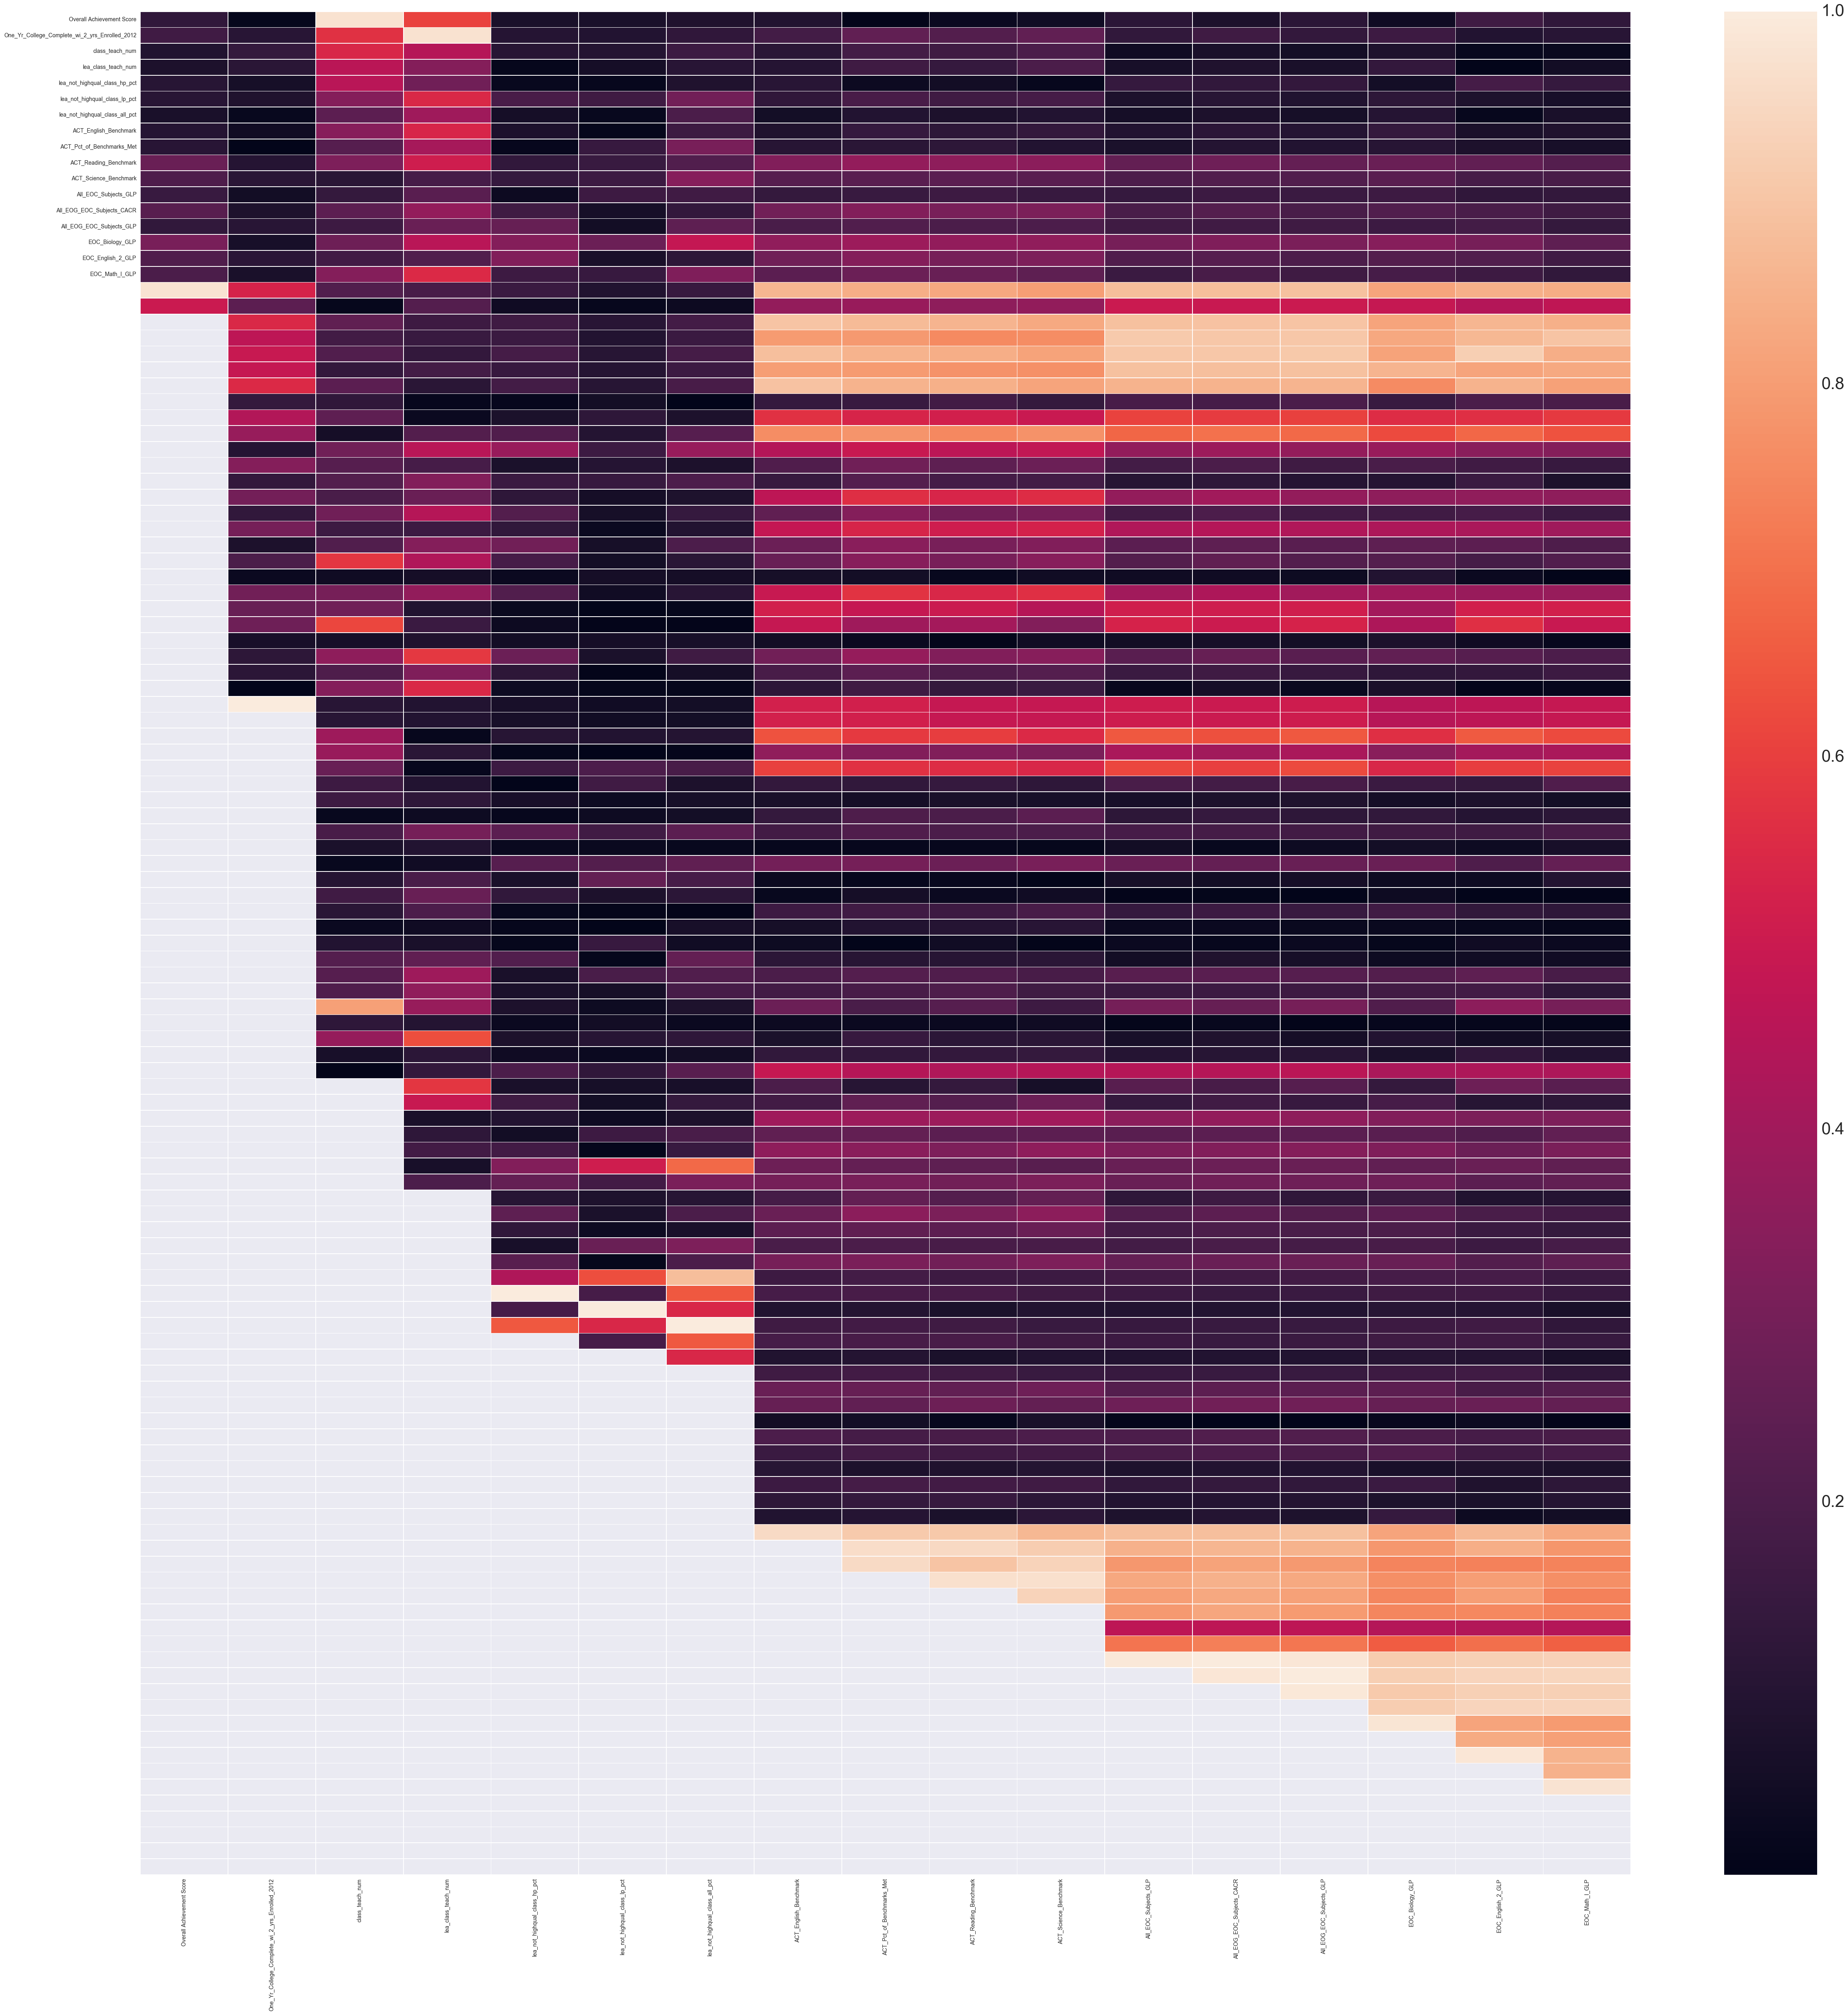

In [34]:
%%time
import seaborn as sns
%matplotlib inline
temp = modelingdata.select_dtypes(include=['int','float']) # select int to run corr on
print(temp.shape)

# calculate the correlation matrix
corr_matrix  = temp.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

fig, ax = plt.subplots(figsize=(60,60))
sns.set(font_scale=3)
sns.heatmap(upper[to_drop], 
            xticklabels=upper[to_drop].columns.values,
            yticklabels=upper[to_drop].columns.values,
            linewidths=.5, ax=ax)


In [35]:
# Columns with greater than 0.95 correlations to drop
to_drop

['Overall Achievement Score',
 'One_Yr_College_Complete_wi_2_yrs_Enrolled_2012',
 'class_teach_num',
 'lea_class_teach_num',
 'lea_not_highqual_class_hp_pct',
 'lea_not_highqual_class_lp_pct',
 'lea_not_highqual_class_all_pct',
 'ACT_English_Benchmark',
 'ACT_Pct_of_Benchmarks_Met',
 'ACT_Reading_Benchmark',
 'ACT_Science_Benchmark',
 'All_EOC_Subjects_GLP',
 'All_EOG_EOC_Subjects_CACR',
 'All_EOG_EOC_Subjects_GLP',
 'EOC_Biology_GLP',
 'EOC_English_2_GLP',
 'EOC_Math_I_GLP']

In [36]:
#Restore fontscale back to normal after heatmap
sns.set(font_scale=1)
# Drop the highly correlated features from our training data 
print('Before Drop')
print(modelingdata.shape)
print('After Drop')
modelingdata = modelingdata.drop(to_drop, axis=1)
modelingdata.shape

Before Drop
(440, 152)
After Drop


(440, 135)

In [37]:
modelingdata.to_csv('data.csv')

> using correlation, we eliminate 14 features. Our final dataset ready for modeling has 440 records and 140 features which includes the one -hot encoded features from categorical features.

In [24]:
# create X (Exploratory) and y (response) variable

In [25]:
%%time
#Create data = x
Cls_X = modelingdata.copy()
#create target = Y
Cls_y = Cls_X.Above_NC_AVG_Graduation_Rate4_Yr
print('X shape before ')
print(Cls_X.shape)
#drop the response column from the x dataset
Cls_X.pop('Graduation_Rate4_Yr') #drop 'Graduation_Rate4_Yr'
Cls_X.pop('Above_NC_AVG_Graduation_Rate4_Yr') # drop High_Graduation_Rate4_Yr'
print('X shape after ')
print(Cls_X.shape)
print('Y shape after ')
print(Cls_y.shape)

X shape before 
(440, 140)
X shape after 
(440, 138)
Y shape after 
(440,)
Wall time: 3.01 ms


 ### Part 2 Modeling and Evaluation 


<div class="alert alert-info"><h3>
Evaluation Metrics
</h3></div>

The goal of our classification task is to build a model which predicts whether a given high schools' 4-year graduation rate is `Above (encoded as 1) ` or `Below (encoded as 0) ` the state average. The criterion for choosing our model evaluation metric was that the metric must be robust to class imbalance. We first explore metrics such as accuracy, precision, recall and F-1 ratio which can be derived from the `Confusion Matrix` and then go on to explain why we chose *AUC as our metric of choice*.   

It helps to define what each element of the confusion matrix represents before we decide on the metric.
- **True Positive**: When the school's 4-year graduation rate is **Above** state average, our classifier *correctly* predicts **Above** 
- **False Negative**: When the school's 4-year graduation rate is **Above** state average, our classifier *incorrectly* predicts **Below** 
- **False Positive**: When the school's 4-year graduation rate is **Below** state average, our classifier *incorrectly* predicts **Above** 
- **True Negative**: When the school’s 4-year graduation rate is **Below** state average, our classifier *correctly* predicts **Below**


We first explain why we are not using `Accuracy` for evaluating our classification model performance. Accuracy is the most straightforward performance measure. It is the ratio of correctly predicted observation to the total observations, in confusion matrix terms: (TP + TN)/ (TP + FP + FN + TN). In our case, we have an imbalance in the class distribution, with 73% of our dataset containing `Above` state average high schools and 27% `Below`. Due to this imbalance, the `Null Accuracy` - which is the accuracy of a classifier which always predicts the majority class, is 73%. In other words, if our classifier always predicted that a given high-school is `Above` state average, then it's accuracy would be 73%. This provides us a baseline against which we can compare other models, but it is not useful in reporting our findings. Secondly, if we use accuracy as our metric, then we would not know what *type* of errors our classifier is making, i.e. FP's or FN's. Therefore, for us to correctly report our model findings we will not use accuracy as our metric. In the code below, we show the class distribution and calculation of Null Accuracy.

In [26]:
# Explore distribuion of our class

print("our class distibution")
print(Cls_y.value_counts())

# calculate the percentage of ones
print('Percentage of ones: ', round(Cls_y.mean(),4))

# calculate the percentage of zeros
print('Percentage of Zeros: ',round(1 - Cls_y.mean(),4))

# calculate null accuracy 
print('')
print('##############################')
print('NULL Accuracy: ', max(round(Cls_y.mean(),4), round(1 - Cls_y.mean(),4)))
print('##############################')


our class distibution
1.0    321
0.0    119
Name: Above_NC_AVG_Graduation_Rate4_Yr, dtype: int64
Percentage of ones:  0.7295
Percentage of Zeros:  0.2705

##############################
NULL Accuracy:  0.7295
##############################


 For the code above we calculate a null accuracy of 73% on our whole dataset. That means that a dumb model that always predicts majority predictor in our case 1 would be right 73% of the time. When evaluating our model performance, we will be looking to ensure the they shows classification accuracy better than that of a dumb model. 

Precision, Recall(sensitivity/TPR), F1-score and specificity(FNR) are some metrics that can be calculated from the confusion matrix. 
- **Precision**: is how precise the classifier is in predicting the positive class. In other words, when the classifier predicted `Above`, how often was it right? This can be calculated from confusion matrix as TP/ (TP + FP). Low false positives lead to high precision. 
- **Recall**: is the ratio of correctly predicted positive observations to the all observations in actual class. In other words, when the actual value was `Above`, how often did the classifier predict correctly. This is calculated from confusion matrix as TP/ (TP + FN). This is also known as True Positive Rate (TPR) or Sensitivity. That is, how sensitive the classifier is to detecting positive instances.
- **F1-score**: is the harmonic mean of precision and recall. 2.(precision. recall)/ (precision + recall). This takes both FP and FN into account. Intuitively this is a bit difficult to understand and report to a wider audience.
- **Specificity**: answers the question: when the actual value is negative, how often is the prediction correct? That is, TN/ (TN + FP). This is also known as the False Negative Rate (FNR). The False Positive Rate (FPR) can be calculated as 1 - specificity.


Each of these metrics has a specific goal and the choice of picking one over the other depends on the specific needs of the problem. In our context, since our goal is to pick a metric which is robust to imbalance in class distribution, we want a metric which takes into account the TPR and FPR of the classifier. 

 Given our understanding of the above metrics, we can now explore how to adjust the performance of our classifier by adjusting the classification threshold. Most classification models in Scikit-learn output the prediction probabilities of class membership. We can make use of these prediction probabilities to adjust the performance of a classifier by adjusting the classification threshold. We can adjust both the *sensitivity* and *specificity* of a classifier simply by adjusting the classification threshold. For example, if we decrease the threshold of predicting the positive class `Above`, to say, 0.3 we can increase the sensitivity (recall) of the classifier. This increases sensitivity because the classifier is now more sensitive to positive instances. 

A receiver operating characteristic (ROC) curve allows us to see how sensitivity and specificity are affected by various thresholds. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. ROC will help us evaluate the tradeoff between sensitivity and specificity in our models. Area under the curve (AUC) is a single-number-summary of the performance of a classifier. AUC is the percentage of the ROC plot that is underneath the curve. It turns out that AUC can also be interpreted as follows, if we randomly choose 1 positive observation and 1 negative observation from our testing set, AUC represents the likelihood that our classifier would assign a higher predicted probability to the positive observation. It makes sense that this is useful goal, because ultimately, we want the classifier to rank positive observations higher than negative observations in terms of predicted probability. AUC is also robust to high class imbalance and therefore we will be using **AUC as our metric of choice. **


Thus, we will be using **AUC** as our model evaluation metric for the classification models that we build in the subsequent sections.

References: 
   * http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc
   * http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
   * http://www.ritchieng.com/machine-learning-evaluate-classification-model  

The strategy we use to divide our dataset is: 
- Use train_test_split to hold out 30% of the data for testing. This will be the data the model has not seen during it's training. 
- Use Stratified 10-fold cross validation on 70% of the training data along with GridSearchCV's parameter grid to find the best parameters. 
- Use the best parameters and the training data to retrain the model. 
- Use the retrained model and the test set to evaluate the performance of the model.


<img src="http://dthomas.mathematical.guru/Img/dataSplitting.png" width="600" height="600" />

>> **Reference:** `Introduction to Machine Learning with Python: A Guide for Data Scientists by Andreas Müller and Sarah`

<div class="alert alert-info"><h3>
Using train_test_split to hold out 30% of data for testing.
</h3></div>

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. In scikit-learn a random split into training and test sets can be quickly computed with the `train_test_split` helper function.

In [27]:
# select a seed to use for repeatability
seed = 100

In [28]:
#Split data to  into train and holding set.
X_train,X_test,y_train,y_test = train_test_split(Cls_X, Cls_y, test_size = 0.3, random_state = seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(308, 138)
(308,)
(132, 138)
(132,)


We will use Stratified 10-fold CV on the training set to train our classifiers.

<div class="alert alert-info"><h3>
Using Stratified 10-fold CV
</h3></div>


In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset. It is like k-fold in that the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:
- A model is trained using `k-1` of the folds as training data;
- The resulting model is validated on the remaining part of the data, i.e., it is used as a test set to compute a performance measure such as `roc_auc`

The performance measure reported by stratified k-fold cross-validation is then the average of the values computed in the loop.


#### Classification 

In [29]:
Classification_cv = StratifiedKFold(n_splits = 10, random_state = seed)
Classification_cv

StratifiedKFold(n_splits=10, random_state=100, shuffle=False)

> With our final data set, we utilize StratifiedKFold class to create `Classification_cv` object that will be used to perform 10-fold stratified sampling of our data for Cross validation. StratifiedKFold is appropriate for our data since our dataset has class imbalance. Furthermore, creating this classification object, `Classification_cv` will allow us to compare the performance of different classification models, and model parameters on the same train/test set pairs for cross validation.

<div class="alert alert-info"><h3>
Classification Models
</h3></div>

#### KNN model with 10 fold cross validation 

>#### Data Scaling

> Standardization can be more practical for many machine learning algorithms. Using standardization, we 
center the feature columns at mean 0 with standard deviation 1, essentially creating z-scores that describe 
the shape of a standard normal distribution. This makes it easier to learn the weights and it the scaling via
standardization maintains useful information about outliers and makes the algorithm less sensitive to them in 
general allowing our KNN model to fit and perform better.

> **Reference:** `Raschka, Sebastian, and Knut Lorenzen. Machine Learning mit Python das Praxis-Handbuch für Data Science, Predictive Analytics und Deep Learning. Mitp, 2017.`

In [30]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_train_Knn = stdsc.fit_transform(X_train) 
X_train_Knn

array([[-0.57024288, -1.23253481,  0.31469049, ..., -0.74009371,
        -0.51214752, -0.33453454],
       [ 1.19951847,  1.72348323,  0.52960107, ..., -0.74009371,
        -0.51214752, -0.33453454],
       [-0.48620394,  0.02336154, -1.18968356, ..., -0.74009371,
        -0.51214752, -0.33453454],
       ..., 
       [-0.9673681 , -0.23714098,  0.52960107, ..., -0.74009371,
         1.95256242, -0.33453454],
       [ 0.15479901,  0.21805289, -0.33004124, ..., -0.74009371,
        -0.51214752, -0.33453454],
       [ 0.5716981 , -0.23439885, -0.11513067, ..., -0.74009371,
        -0.51214752, -0.33453454]])

>**Parameter description**
>* **`n_neighbors: `** Number of neighbors to use by default for kneighbors queries.
>* **`weights: `**weight function used in prediction. Possible values: 
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally. 
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
>* **`metric: `**the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric


>The KNN grid search consisted of varying n_neighbors from 2 to 50, using our weights (uniform and distance). And a default of auto for algorithm, and the default leaf size of 30  
We analyzed different metrics like minkowski, euclidean, manhattan, chebyshev. Since we scaled our data by standardization we opted not to use a penalty since our model may have overfit the training data, and we had to control these phenomena. We want to be able to apply our model to different sets and prefer it to be more robust then accurate in terms of practicality.


>** Reference:** http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

In [31]:
%%time
from sklearn.model_selection import GridSearchCV 
param_grid = {'n_neighbors': np.arange(2, 50),
             'weights':['uniform', 'distance'],
             'metric':['minkowski','euclidean', 'manhattan', 'chebyshev']
             }
knn_test = KNeighborsClassifier() 
knn_test_cv = GridSearchCV(knn_test, param_grid, cv=Classification_cv, scoring = 'roc_auc') 
knn_test_cv.fit(X_train_Knn,y_train) 
print(knn_test_cv.best_params_) 
print(knn_test_cv.best_score_)

{'metric': 'manhattan', 'n_neighbors': 44, 'weights': 'distance'}
0.856337941812
Wall time: 2min 10s


>Our best score was about 0.85 auc with the KNN model. Our best model parameters consisted of the 'manhattan' metric, 44 n_neighbors, with the weight of distance, all other variables are defaulted as stated earlier. Note that the manhattan metric also known as the taxicab metric tracks distance best on a grid or pathway, where the shortest distance between two paths could have multiple different pathways (similar to a taxicab driving from pt A to B) and not a unique distance like the euclidean metric.

#### Random Forest model with 10 fold cross validation

>In the cell below, we utilized GridSearchCV to iterate through different subsets of parameters to extract the combination that produces the best score. Of the parameters within the RandomForestClassifier, we chose to run permutations on 'criterion', 'n_estimators' and  'max_depth'.

>**Paramater Description**
>* **`Criterion: `**
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

>* **`max_depth: `**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

>* **`n_estimators: `** The number of trees in the forest.

>** Reference:** http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

In [32]:
%%time 
from sklearn.model_selection import GridSearchCV 
param_grid = {'n_estimators': [10, 50, 100],'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 10)} 
rf_clf = RandomForestClassifier(n_jobs=2, random_state=seed) 
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=Classification_cv, scoring ='roc_auc' ) 
rf_clf_cv.fit(X_train, y_train) 
print(rf_clf_cv.best_params_) 
print(rf_clf_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
0.894553952854
Wall time: 3min 32s


#### Logistic Regression model with 10 fold cross validation



> For our logistic regression classifier, we have chosen to manipulate cost which is the most appropriate parameter to tune for our data. Cost defined as 1/lambda, with lambda being the actual regularization term is the amount of constraint violation. Regularization intuitively can be thought as a penalty against complexity. If a model suffers from (high) variance (i.e., it overfits the training data) regularization is used to increase the bias to improve the model generalization performance especially on unseen data. Caution always must be taken to ensure too much bias is not added which could otherwise result in underfitting where a model shows a "bad" performance for both the training and test dataset.  

>We analyzed accuracy of our Classifier by manipulating cost for 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, and 1000. For our dataset, smaller the cost value {0.01}, the stronger the regularization and the better our model performed with an accuracy of 82.51% on a 10K cross validation.  We also note our logistic regression classifier performance degrades with increasing cost.

> We also manipulated logistic regression parameter `Class_weight` checking the impact of switching between ‘balanced’ class weight and `none` class_weight. `None` class weight gives us best performance as equal weight gets assigned to each class. One interesting observation we note is the benefit of a `balanced` class weight kicks in when a higher cost is use. For instance, a cost of 1000 with a `balanced` class weight yields an accuracy of 78.9% 10 fold average accuracy compared to 77.92% accuracy for a cost of 1000 and `None` class weight.

>**Paramater Description**
>* **`Cost (C): `**
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

>* **`class_weight: `**
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

>** Reference:** 
>* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
>* https://www.kdnuggets.com/2016/06/regularization-logistic-regression.html


In [33]:
# titles to be used for column names for our summary tables
title = ['Run1','Run2','Run3','Run4','Run5','Run6','Run7','Run8','Run9','Run10', 'AVG_Acc', 'Cost']
title3 = ['Run1','Run2','Run3','Run4','Run5','Run6','Run7','Run8','Run9','Run10', 'AVG_Acc', 'Class_Weight']
title4 = ['Run1','Run2','Run3','Run4','Run5','Run6','Run7','Run8','Run9','Run10', 'AVG_Acc', 'Cost', 'Penalty', 'Class_weight']
title2 = [1,2,3,4,5,6,7,8,9,10, 'AVG_Acc', 'Cost']
#Logistic Regression Paramaters to manipulate to increase generalization
penalty = ['l2']
class_weight = [None, 'balanced']
cost = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 1000]
i = 0
LR_list = []

print('#############################################')
print('Logistic Regression Model Accuracy vs Cost   ')
print('#############################################')

#For loop to evaluate accuracy for the different costs
for i in cost:
    lr_clf = LogisticRegression(C=i,class_weight=None, random_state=seed)

    acc = cross_val_score(lr_clf,  X_train, y_train, cv=Classification_cv.split(X_train, y_train))
    acc = np.append(acc,acc.mean())
    acc = np.round(np.append(acc,i), 4)
    #print(acc)
    #print(acc.mean())
    #LR_list.append(title)
    LR_list.append(list(acc))

LR_list = pd.DataFrame(LR_list)
LR_list.columns = title
display(LR_list.sort_values('AVG_Acc', ascending=False))
LR_list.columns = title2
LR_list_T =pd.melt(LR_list, id_vars=['Cost'], value_vars=[1,2,3,4,5,6,7,8,9,10])
LR_list_T.columns = ['Cost', 'Run', 'Accuracy']

#For loop to evaluate accuracy for the different penalty
print('#############################################')
print('Logistic Regression Model Accuracy vs Class Weight  ')
print('#############################################')
#LR_list_T
LR_list2 = []
for i in class_weight:
    lr_clf = LogisticRegression(penalty=penalty[0], C = 0.05, class_weight=i, random_state=seed)

    acc = cross_val_score(lr_clf,  X_train, y_train, cv=Classification_cv.split(X_train, y_train))
    acc = np.round(np.append(acc, acc.mean()),4)
    acc = np.append(acc,i)
    #print(acc)
    #print(acc.mean())
    #LR_list.append(title)
    LR_list2.append(list(acc))

LR_list2 = pd.DataFrame(LR_list2)
LR_list2.columns = title3

display(LR_list2)
#For loop to evaluate accuracy for the different penalty
print('##################################################################')
print('Logistic Regression Model Accuracy vs weight and Cost Combination')
print('##################################################################')
LR_list3 = []
for i in cost:
    for j in penalty:
        for k in class_weight:
            lr_clf = LogisticRegression(penalty=j, C = i, class_weight=k, random_state=seed)

            acc = cross_val_score(lr_clf,  X_train, y_train, cv=Classification_cv.split(X_train, y_train))
            acc = np.round(np.append(acc, acc.mean()),4)
            acc = np.append(acc,i)
            acc = np.append(acc,j)
            acc = np.append(acc,k)
            #print(acc)
            #print(acc.mean())
            #LR_list.append(title)
            LR_list3.append(list(acc))

LR_list3 = pd.DataFrame(LR_list3)
LR_list3.columns = title4
display(LR_list3.sort_values('AVG_Acc', ascending=False))




#############################################
Logistic Regression Model Accuracy vs Cost   
#############################################


Run1    Run2    Run3    Run4    Run5    Run6    Run7    Run8    Run9  \
0  0.7812  0.9032  0.7742  0.9032  0.7742  0.7742  0.7742  0.8333  0.8333   
1  0.7812  0.9032  0.8065  0.9032  0.7742  0.7097  0.8387  0.8000  0.8000   
2  0.7812  0.9032  0.8065  0.8710  0.8065  0.7097  0.8387  0.8000  0.7667   
3  0.7500  0.9032  0.7742  0.8710  0.8065  0.6452  0.8387  0.8000  0.7000   
7  0.7500  0.9032  0.7742  0.8387  0.8065  0.6452  0.8710  0.8000  0.7000   
5  0.7500  0.9355  0.7419  0.8710  0.7742  0.6452  0.8387  0.8000  0.7000   
6  0.7500  0.9355  0.7419  0.8387  0.8065  0.6452  0.8710  0.8000  0.7000   
4  0.7500  0.9032  0.7419  0.8387  0.8065  0.6452  0.8710  0.8000  0.7000   
8  0.7500  0.9355  0.7419  0.8387  0.7742  0.6452  0.8710  0.8000  0.7000   

    Run10  AVG_Acc     Cost  
0  0.9000  0.8251   0.01     
1  0.8667  0.8183   0.05     
2  0.8667  0.8150   0.10     
3  0.8667  0.7955   0.50     
7  0.8667  0.7955   100.00   
5  0.8667  0.7923   5.00     
6  0.8333  0.7922   10.00    
4  0.8333  0.7890   1.00     
8  0.8333  0.7890   1000.00

#############################################
Logistic Regression Model Accuracy vs Class Weight  
#############################################


Run1    Run2    Run3    Run4    Run5    Run6    Run7    Run8    Run9  \
0  0.7812  0.9032  0.8065  0.9032  0.7742  0.7097  0.8387  0.8     0.8      
1  0.7812  0.871   0.7097  0.9032  0.7742  0.7419  0.8065  0.7667  0.7667   

    Run10 AVG_Acc Class_Weight  
0  0.8667  0.8183  None         
1  0.8333  0.7954  balanced

##################################################################
Logistic Regression Model Accuracy vs weight and Cost Combination
##################################################################


Run1    Run2    Run3    Run4    Run5    Run6    Run7    Run8    Run9  \
0   0.7812  0.9032  0.7742  0.9032  0.7742  0.7742  0.7742  0.8333  0.8333   
2   0.7812  0.9032  0.8065  0.9032  0.7742  0.7097  0.8387  0.8     0.8      
4   0.7812  0.9032  0.8065  0.871   0.8065  0.7097  0.8387  0.8     0.7667   
1   0.7812  0.9032  0.7097  0.9032  0.7742  0.7742  0.7097  0.8333  0.8      
6   0.75    0.9032  0.7742  0.871   0.8065  0.6452  0.8387  0.8     0.7      
14  0.75    0.9032  0.7742  0.8387  0.8065  0.6452  0.871   0.8     0.7      
3   0.7812  0.871   0.7097  0.9032  0.7742  0.7419  0.8065  0.7667  0.7667   
5   0.75    0.871   0.6774  0.9032  0.7742  0.7742  0.8065  0.7667  0.7667   
10  0.75    0.9355  0.7419  0.871   0.7742  0.6452  0.8387  0.8     0.7      
12  0.75    0.9355  0.7419  0.8387  0.8065  0.6452  0.871   0.8     0.7      
16  0.75    0.9355  0.7419  0.8387  0.7742  0.6452  0.871   0.8     0.7      
8   0.75    0.9032  0.7419  0.8387  0.8065  0.6452  0.871   0.8     0.7      
9   0.75    0.9032  0.7419  0.8387  0.7742  0.7097  0.8065  0.7667  0.7333   
11  0.75    0.871   0.7419  0.8387  0.8065  0.6129  0.8387  0.7667  0.7333   
7   0.75    0.871   0.7419  0.8387  0.7742  0.7097  0.8065  0.7667  0.7      
17  0.75    0.9032  0.7419  0.8387  0.7742  0.6452  0.8387  0.7333  0.7333   
15  0.75    0.9032  0.7419  0.8387  0.7742  0.6129  0.8065  0.7667  0.7333   
13  0.75    0.9032  0.7419  0.8387  0.7742  0.6129  0.7419  0.7     0.7333   

     Run10 AVG_Acc    Cost Penalty Class_weight  
0   0.9     0.8251  0.01    l2      None         
2   0.8667  0.8183  0.05    l2      None         
4   0.8667  0.815   0.1     l2      None         
1   0.8333  0.8022  0.01    l2      balanced     
6   0.8667  0.7955  0.5     l2      None         
14  0.8667  0.7955  100.0   l2      None         
3   0.8333  0.7954  0.05    l2      balanced     
5   0.8333  0.7923  0.1     l2      balanced     
10  0.8667  0.7923  5.0     l2      None         
12  0.8333  0.7922  10.0    l2      None         
16  0.8333  0.789   1000.0  l2      None         
8   0.8333  0.789   1.0     l2      None         
9   0.8333  0.7858  1.0     l2      balanced     
11  0.8333  0.7793  5.0     l2      balanced     
7   0.8333  0.7792  0.5     l2      balanced     
17  0.8333  0.7792  1000.0  l2      balanced     
15  0.8333  0.7761  100.0   l2      balanced     
13  0.8333  0.763   10.0    l2      balanced

## Analyzing the results of cross-validation using AUC

It is often helpful to visualize the results of cross-validation, to understand how the model generalization depends on the parameters that we found to be most optimal. As we found in the above section, the best parameters are:

- KNN: **{'metric': 'manhattan', 'n_neighbors': 44, 'weights': 'distance'}** 
- RandomForsest: **{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}** 
- LogisticRegression: **{'penalty'='l2', 'C' = 0.01, 'class_weight'=None}**  

To help visualize the AUC score for each fold we created a helper function called `ROC_plotter`. Thus function takes the model with optimal parameters and fits it to the same training data that was used in GridSearchCV and plots the ROC curve for each fold. This will help us visually assess how each fold performs. `ROC_plotter` takes the following arguments:
- **clf** : the model with best parameters
- **classification_type** : KNN or RandomForest or LogisticRegression
- **cv** :  The same Classification_cv object that we used in the above section
- **X** :  X_train, the training data we used in the above section
- **y** :  y_train, the training labesl we used in the above section

In [34]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# clf -> the model with best parameters
# classification_type -> KNN or RandomForest or LogisticRegression
# cv -> The same Classification_cv object that we used in the above section
# X -> X_train, the training data we used in the above section
# y -> y_train, the training labesl we used in the above section
def ROC_plotter(clf,classfication_type,cv = Classification_cv, X = X_train.values, y = y_train.values):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i= 0

    f, ax = plt.subplots(figsize=(15, 8))
    for train, test in cv.split(X, y):       
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.5,
                 label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=3, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
     #                label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.005, 1.05])
    plt.ylim([-0.005, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for ' + classfication_type)
    plt.legend(loc="lower right")
    plt.show()

Automatically created module for IPython interactive environment


#### Analyzing KNN cross-validation results

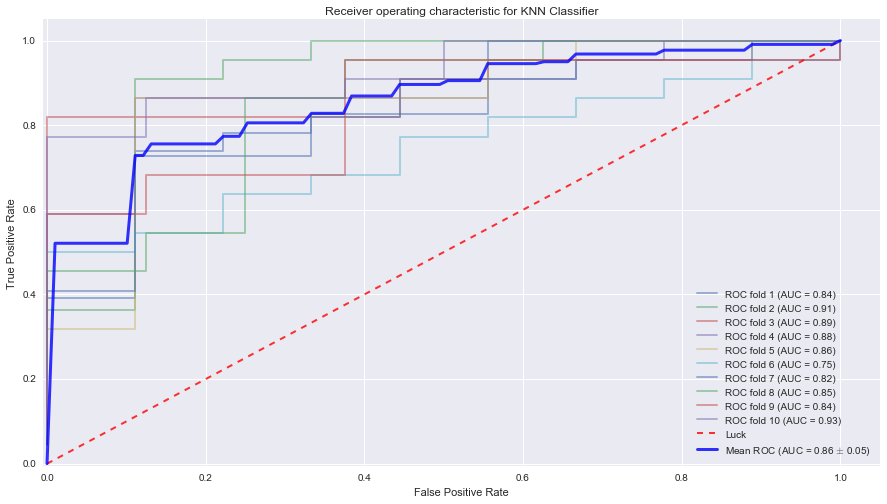

In [35]:
# Instantiate the model with best parameters found using GridSearchCV.
knn_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=44, weights='distance')

# Invoke ROC_plotter using the above model and the scaled Training data that was used for GridSearchCV.
ROC_plotter(knn_clf, 'KNN Classifier', X=X_train_Knn)


Each line in the above plot corresponds to one run of cross-validation. Looking at this plot, one might get a sense of how the AUC value varies from fold-to-fold and get an idea of the best and worst cases of how the model might generalize to unseen data. The mean AUC value for the 10-fold Stratified CV is found to be 0.86 with a standard deviation of 0.05. However, this mean AUC value should not be reported as the true measure of the model performance.

#### Analyzing the KNN test results

To get a true measure of how the model performs on unseen data, we make use of the 30% of test data that we have set aside.

Fitting the GridSearchCV object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the parameters that yielded the best cross-validation performance. Thus, we can make use of the GridSearchCV object: `knn_clf_cv_s` from the previous section to make prediction on the test set.

Note that before we trained our KNN model, we Standardized the X_train feature matrix. We apply the same Standarization to the X_test matrix for calculating the AUC score.

In [36]:
# Standardize the Test set.
stdsc = StandardScaler() 
X_test_Knn = stdsc.fit_transform(X_test) 

# Calculate test auc score
roc_auc_score(y_test, knn_test_cv.predict(X_test_Knn))

0.71999999999999997

There is a significant difference in the values obtained during model evaluation using Cross-Validation (*84%*) and the value obtained on unseen test data (*72%*). This indicates that the model that we trained is **overfitting** and not able to generalize well to unseen data.

### Analyzing RandomForest cross validation results

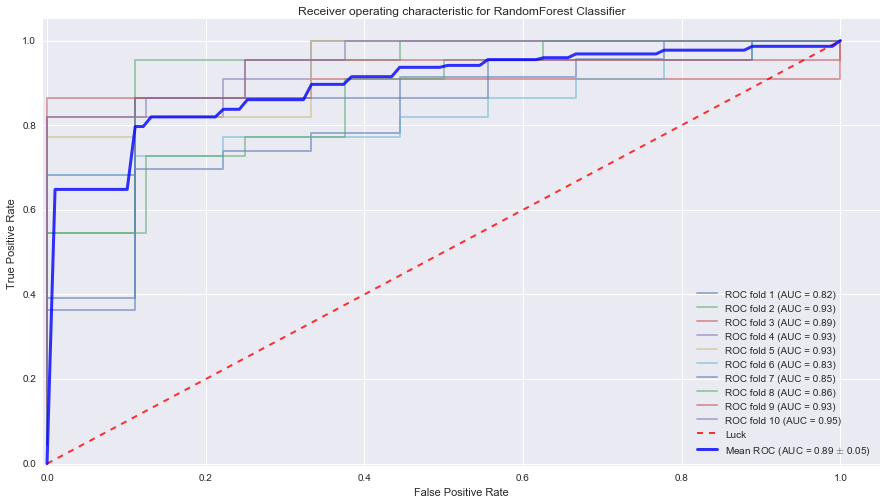

In [37]:
# {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
rf_clf = RandomForestClassifier(n_jobs=2, criterion='entropy', max_depth=9, n_estimators=100, random_state=seed)

# Invoke ROC_plotter using the above model and the training data that was used for GridSearchCV.
ROC_plotter(rf_clf, 'RandomForest Classifier')

Each line in the above plot corresponds to one run of cross-validation. Looking at this plot, one might get a sense of how the AUC value varies from fold-to-fold and get an idea of the best and worst cases of how the model might generalize to unseen data. The mean AUC value for the 10-fold Stratified CV is found to be 0.89 with a standard deviation of 0.05. However, this mean AUC value should not be reported as the true measure of the model performance.

#### Analyzing the RandomForestClassifier test results

Using the GridSearchCV object: rf_clf_cv we can calculate the AUC score for test data.

In [38]:
# Calculate test auc score
roc_auc_score(y_test, rf_clf_cv.predict(X_test))

0.82499999999999996

With an AUC score of 0.825 obtained from predicting on unseen test data, suggests that our RandomForest classifier is doing quite well.

### Analyzing LogisticRegression cross validation results

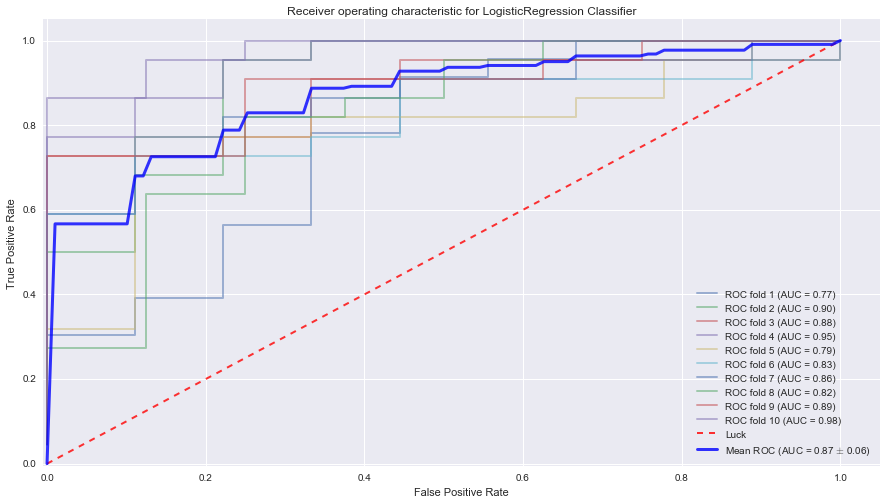

In [39]:
lr_clf = LogisticRegression(penalty='l2', C = 0.01, class_weight=None, random_state=seed)

# Invoke ROC_plotter using the above model and the training data used in the previous section
ROC_plotter(lr_clf, 'LogisticRegression Classifier')

Each line in the above plot corresponds to one run of cross-validation. Looking at this plot, one might get a sense of how the AUC value varies from fold-to-fold and get an idea of the best and worst cases of how the model might generalize to unseen data. The mean AUC value for the 10-fold Stratified CV is found to be 0.87 with a standard deviation of 0.06. However, this mean AUC value should not be reported as the true measure of the model performance.

#### Analyzing the LogisticRegression Classifier test results

For Logistic Regression, we did not use GridSearchCV but instead we used a for-loop to find the best parameters. For this reason, we re-train the Logistic Regression model using the training set with the best parameters.

In [40]:
# fit this to training
lr_clf.fit(X_train, y_train)

# predict and calculate auc on test data
roc_auc_score(y_test, lr_clf.predict(X_test))

0.76249999999999996

There is a significant difference in the values obtained during model evaluation using Cross-Validation (*87%*) and the value obtained on unseen test data (*76.24%*). This indicates that the model that we trained is **overfitting** and not able to generalize well to unseen data.

>**Reference** 
>* http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
>* https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
>* http://pages.cs.wisc.edu/~dpage/cs760/evaluating.pdf
>* http://scikit-plot.readthedocs.io/en/stable/apidocs.html

<div class="alert alert-info"><h3>
Discussing the Advantages, Disadvantages and Models Statistical Comparison 
</h3></div>

###  Advantages and Disadvantages

#### `Computational complexity and Running Time: `

**KNN** and <span style="color:red">**Random Forest** </span> have the downside of computational complexity. For both, Computational complexity grows linearly with the number of samples in the training dataset in the worst-case scenario.  In the case of a KNN unless the dataset has very few dimensions (features) and the algorithm has been implemented using efficient data structures such as KD-trees it could take longer time to run. Random forest would be the worst at runtime and computational complexity as the number of trees increases.

#### ` Overfitting and Overconfidence` 

It is important to mention that **KNN** is very susceptible to overfitting due to the curse of dimensionality. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. For this reason we had to scale our dataset to bring all features to the same scale for KNN classfication. This greatly improved our model accuracy 

**Logistic regression**  on the other hand tends to be vulnerable to overconfidence in cases involving imbalanced classes. In such cases, Logistic regression model tends to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.  This was a particular important aspect to consider for our model where our predicted variable `Above_NC_AVG_Graduation_Rate4_Yr` is imbalanced with False: 119 and True: 321 observations. 

Considering overfitting, <span style="color:green">**Random Forest**</span> is the clear winner as it mitigates noise of decision trees by aggregating their individual predictions. Having more trees in your forest produces better results which is a clear advantage in our classfication as we are dealing with unbalanced classes.


#### ` Interpratability`

<span style="color:green">**Logistic Regression**</span> takes a simple nice probabilistic interpretation approach.  Since Predictions are mapped to be between 0 and 1 through the logistic function, predictions can be interpreted as class probabilities. This makes Logistic regression a much simpler model to interpret compared to Random Forest and K Nearest neighbor classification. 

>**Reference**
>* (J. H. Friedman, J. L. Bentley, and R. A. Finkel. An algorithm for finding best matches 
in logarithmic expected time. ACM Transactions on Mathematical Software (TOMS), 3(3):209–226, 1977.)
>* https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

### ROC and AUC Comparison

Automatically created module for IPython interactive environment


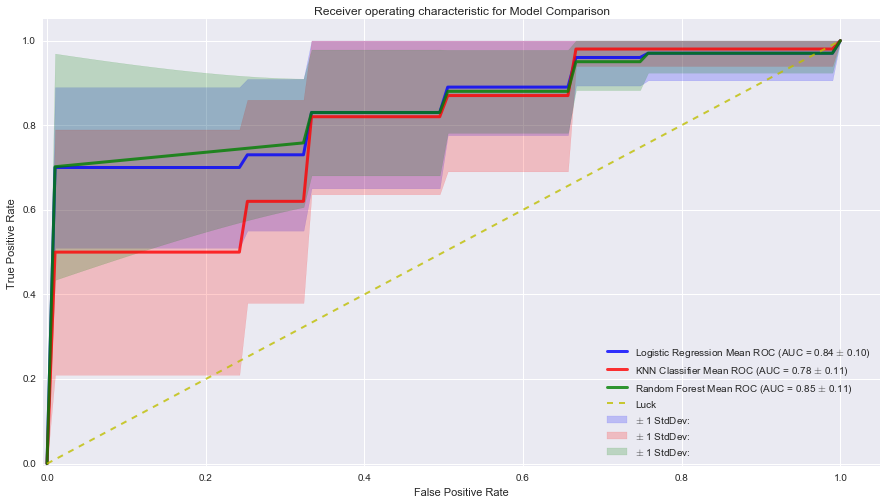

In [45]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#lr_clf = LogisticRegression(penalty='l1', C = 0.01, class_weight=None, random_state=seed)

classifiers = [lr_clf, knn_clf, rf_clf]
model = ['Logistic Regression', 'KNN Classifier', 'Random Forest']
colors = ['b','r','g']

def ROC_Compare(cv = Classification_cv, X = X_test.values, y = y_test.values):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i= 0
    p =0

    f, ax = plt.subplots(figsize=(15, 8))
    for p in range(3):
        for train, test in cv.split(X, y):       
            probas_ = classifiers[p].fit(X[train], y[train]).predict_proba(X[test])
            # Compute ROC curve and area the curve
            fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            #plt.plot(fpr, tpr, lw=2, alpha=0.5,
             #        label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

            i += 1


        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr, color=colors[p],
                 label=r''+model[p]+' Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                 lw=3, alpha=.8)
        std_tpr = np.std(tprs, axis=0)
        #tprs_upper = np.max(std_tpr)
        #tprs_lower = np.min(std_tpr)
        tprs_upper = np.minimum(mean_tpr + (std_tpr), 1)
        tprs_lower = np.maximum(mean_tpr - (std_tpr), 0)
        i= 0
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=colors[p], alpha=.2,
                        label=r'$\pm$ 1 StdDev:')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='y',
         label='Luck', alpha=.8)
    p +=1
    plt.xlim([-0.005, 1.05])
    plt.ylim([-0.005, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Model Comparison')
    plt.legend(loc="lower right")
    plt.show()
    
ROC_Compare()

While we believe Random Forest to be the best classifier, the amount of overlap between the three models using AUC considering 95% confidence interval shows no clear statistical distinction between them. 

<div class="alert alert-info"><h3>
Feature Importance
</h3></div>

> Like in many real world classification problems where feature importance is often unknown a priori, we choose to begin with using prediction accuracy of our model narrow down on a subset of features to use without significantly decreasing prediction accuracy of the classifiers. Below we calculate the accuracies of our Classification methods (Logistic Regression, Random Forest and KNN) based on a percetage of features selected by Chi-Squared test. Chi-square test measures dependence between our predictor and exploratory variables as such using Chi-Squared test, we weed out the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [46]:
%%time
from sklearn import cross_validation
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

percentiles = range(1, 100, 5)
results = []
results1 = []
results2 = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(lr_clf, X_train_fs, y_train, cv=Classification_cv.split(X_train_fs, y_train))
    scores1 = cross_validation.cross_val_score(rf_clf, X_train_fs, y_train, cv=Classification_cv.split(X_train_fs, y_train))
    scores2 = cross_validation.cross_val_score(knn_clf, X_train_fs, y_train, cv=Classification_cv.split(X_train_fs, y_train))
    print(i,' LR : ',scores.mean())
    print(i,' RF :',scores1.mean())
    print(i,' KNN :',scores2.mean())
    results = np.append(results, scores.mean())
    results1 = np.append(results1, scores1.mean())
    results2 = np.append(results2, scores2.mean())


1  LR :  0.717681451613
1  RF : 0.685
1  KNN : 0.659193548387
6  LR :  0.802311827957
6  RF : 0.789603494624
6  KNN : 0.711021505376
11  LR :  0.79251344086
11  RF : 0.80875672043
11  KNN : 0.753172043011
16  LR :  0.785745967742
16  RF : 0.789180107527
16  KNN : 0.759831989247
21  LR :  0.831444892473
21  RF : 0.824475806452
21  KNN : 0.753272849462
26  LR :  0.818333333333
26  RF : 0.828125
26  KNN : 0.756505376344
31  LR :  0.818333333333
31  RF : 0.808239247312
31  KNN : 0.756505376344
36  LR :  0.815208333333
36  RF : 0.805537634409
36  KNN : 0.756505376344
41  LR :  0.825100806452
41  RF : 0.808447580645
41  KNN : 0.736827956989
46  LR :  0.815423387097
46  RF : 0.795759408602
46  KNN : 0.736827956989
51  LR :  0.812305107527
51  RF : 0.801995967742
51  KNN : 0.736827956989
56  LR :  0.815215053763
56  RF : 0.811673387097
56  KNN : 0.736827956989
61  LR :  0.815215053763
61  RF : 0.805221774194
61  KNN : 0.736827956989
66  LR :  0.818440860215
66  RF : 0.802311827957
66  KNN : 0.

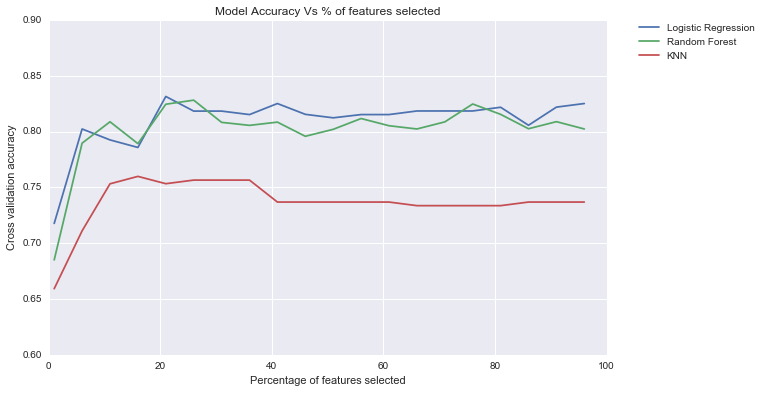

In [47]:
###### Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
f, ax = plt.subplots(figsize=(10, 6))
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results, label="Logistic Regression")
pl.plot(percentiles,results1, label="Random Forest")
pl.plot(percentiles,results2, label="KNN")
plt.axis([0, 100, 0.6, 0.9])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Model Accuracy Vs % of features selected')
plt.grid(True)

> The figure above Visualizes comparison of cross validation accuracy vs percentage of features selected for Logistic Regression, Random Forest and KNN classifiers on predicting whether a school 4-year high school graduation rate is above or below the NC states average graduation rate. 

> **We note the following trends: ** 

> 1. For Logistic Regression, KNN and Random Forest model; 21% of the features gives us the best performing models in terms of accuracy.  Beyond 21% of the features, we don't gain much benefit on the predictive power of our classifiers.

> 2.  Across the board, logistic regression and Random Forest are both competitive in terms of their predictions accuracy and superior to KNN classifier regardless of the number of features used.

> Below we list the top features identified by Chi-Squared test.


In [41]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=21)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
#print(fs.get_support())
#print(fs.scores_)
#print('')
Chi2_Score = pd.DataFrame()

for i in range(len(X_train.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': X_train.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score.sort_values('chi-squared', ascending=False)   

Feature   chi-squared
17  lea_wap_num                                    34792.725224
2   lea_local_perpupil_num                         4652.046900 
1   lea_federal_perpupil_num                       1679.188577 
0   lea_avg_student_num                            1340.333029 
14  short_susp_per_c_num                           1151.504912 
3   lea_state_perpupil_num                         773.551238  
26  EOC_Math_I_CACR                                586.036513  
20  ACT_Math_Benchmark                             545.857751  
22  ACT_Writing_Benchmark                          504.480468  
23  All_EOC_Subjects_CACR                          488.783472  
27  SchoolWeightedScore                            456.183457  
25  EOC_English_2_CACR                             431.866384  
24  EOC_Biology_CACR                               424.151137  
6   Math I Score                                   417.022940  
8   Biology Score                                  413.806648  
9   The ACT Score                                  380.668698  
19  ACT_Composite_Score_UNC_Min                    372.998263  
7   English II Score                               355.759213  
11  sat_avg_score_num                              334.125804  
4   SPG Score                                      175.000923  
15  lea_short_susp_per_c_num                       170.784788  
16  wap_num                                        128.217986  
12  lea_sat_avg_score_num                          78.703269   
5   EVAAS Growth Score                             76.826051   
10  Cohort Graduation Rate Standard Score          67.234319   
13  sch_percent_college_enrolled_16_mos_post_grad  45.706694   
28  Overall_Achievement_Score_bins_40-54           39.601471   
21  ACT_WorkKeys_Silver_Beyond                     35.642180   
18  lea_nbpts_num                                  34.646638

http://scikit-plot.readthedocs.io/en/stable/apidocs.html
### Feature importance for Random Forest

                                   feature  importance
24   Cohort Graduation Rate Standard Score  0.082365  
17   SPG Score                              0.043835  
100  SchoolWeightedScore                    0.041699  
20   English II Score                       0.031380  
45   short_susp_per_c_num                   0.030240  
97   EOC_English_2_CACR                     0.029122  
95   All_EOC_Subjects_CACR                  0.027402  
96   EOC_Biology_CACR                       0.022920  
19   Math I Score                           0.018810  
21   Biology Score                          0.017339  
91   ACT_Composite_Score_UNC_Min            0.016640  
35   ap_ib_courses                          0.016472  
92   ACT_Math_Benchmark                     0.015402  
15   lea_local_perpupil_num                 0.015263  
94   ACT_Writing_Benchmark                  0.015022  
25   sat_avg_score_num                      0.013867  
36   cte_courses                            0.013485  
43   avg_d

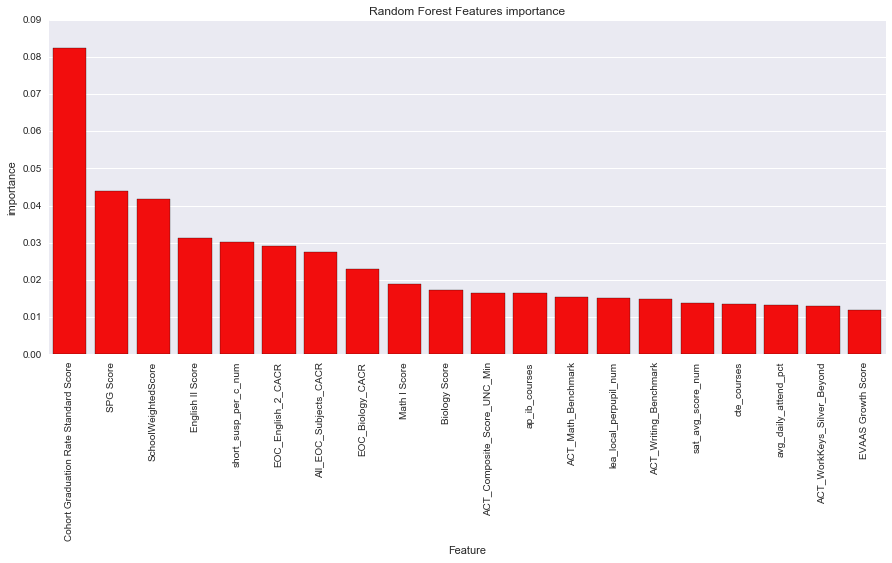

In [47]:
#https://stackoverflow.com/questions/22361781/how-does-sklearn-random-forest-index-feature-importances
rf_clf.fit(X_train, y_train)
importances = pd.DataFrame({'feature':X_train.columns, 'importance': rf_clf.feature_importances_}) 
importances = importances.sort_values('importance',ascending=False)#.set_index('feature') 
 
#only display top 20 importances[:10].plot.bar()
topDF1 = importances.head(20)
print(topDF1)

f, ax = plt.subplots(figsize=(15, 6))

g = sns.barplot('feature', y="importance", data=topDF1, color="red", saturation=.9, ci=68)
g =plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.title('Random Forest Features importance')

### Feature importance for Logistic Regression

Cohort Graduation Rate Standard Score 0.267629857025
short_susp_per_c_num 0.120850235738
Overall_Achievement_Score_bins_40-54 0.100677626557
lea_books_per_student 0.0940570002973
lea_ap_participation_pct 0.074868076238
SPG Score 0.0741615842609
Overall_Achievement_Score_bins_70-84 0.0716113142823
lea_wap_num 0.0690296799512
lea_avg_student_num 0.069024241477
English II Score 0.0682914712269
lea_ap_ib_courses 0.0681972573142
lea_1yr_tchr_trnovr_pct 0.0680633437582
EOC_Math_I_CACR 0.066367421165
All_EOC_Subjects_CACR 0.0648300378814
SchoolWeightedScore 0.064196388946
avg_daily_attend_pct 0.0641015362712
Dist_Tch_Exp_Pct_0_3_Years 0.0640914469949
Biology Score 0.0635914321167
lea_sat_participation_pct 0.062873810664
avg_age_media_collection 0.0612167262849
lea_local_perpupil_num 0.0611590737664


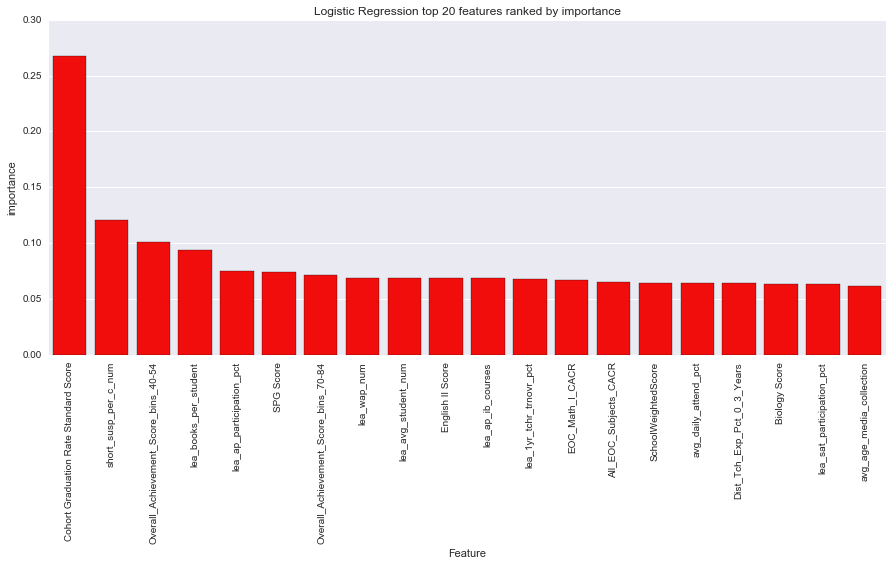

In [50]:
from sklearn.linear_model import LogisticRegression


# fit the model
#lr_clf.fit(X_train, y_train)
lr_clf.fit(X_train/ np.std(X_train, 0), y_train) #Scale the data before feature importance

# coefs
coefs = list(abs(lr_clf.coef_[0]))

# features
features = list(X_train.columns)


weights = pd.Series(coefs,index=features) 
top20 = abs(weights).sort_values(ascending = False).head(20) 


# zip them up
zipped = list(zip(features, coefs))

# create dictionary
coef_features = dict(zipped)

import operator
sorted_coef_features = sorted(coef_features.items(), key=operator.itemgetter(1), reverse=True)

# print the top 20 features with the heighest weights. 
i = 0
for feature, weight in sorted_coef_features:
    if (i <= 20):
        print(feature, weight)
        i=i+1

topDF = weights[top20.index] 
#ax = topDF.head(n=20).plot(kind='bar',figsize = (14, 8), color = 'b')
f, ax = plt.subplots(figsize=(15, 6))

topDF=pd.DataFrame(topDF)
topDF.columns = ['importance']

g = sns.barplot(topDF.index, y="importance", data=topDF, color="red", saturation=.9, ci=68)
g =plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.title('Logistic Regression top 20 features ranked by importance')

>Above we show the top 20 most important features for both Logistic regression and Random Forest classifiers. 

> We see quite a bit of overlap between features that are ranked as important in both Random forest and Logistic regression models. 

> Features related to Education attainment i.e. `Cohort Graduation Rate Standard Score`, `SPG Score`, `SchoolWeightedScore``English II Score`  , `English II Score` , `EOC_English_2_CACR`,  `Math I Score`  , `Biology Score`, `EVAAS Growth Score` e.tc. dominate the list of features that our classifier is relying on when classifying whether school is classified as having a 4-year graduation rate that is above or below the NC states average graduation rates. These features strongly support the theory, school performance in this education attainment measures are a strong indicator in predicting a school’s graduation rate.

> It has interesting to see a number of the features that we created are actually being weighted as important features for our logistic regression classifier especially. These features include `Overall_Achievement_Score_bins_40-54`, `Overall_Achievement_Score_bins_70-84 and `SchoolWeightedScore` which we describe in detail in the new features section




###  Part 3. Deployment 

At present, our model would provide a school with a prediction of whether or not they would surpass a given threshold for the metric of four-year graduation rates. The school would provide the necessary data that we would feed into the model and then we could provide them with a prediction of above or below the threshold.

This model could also be useful at the state level. Once the data has been collected by the schools, the state could have predictions on which schools will meet the threshold rate set by the state. This information would provide the state legislature a preview of where their schools will be in May, giving them a head start on funding decisions and in identifying schools which are projected to not meet specified graduation rates.

While this prediction is perhaps too specific and could be seen as providing little utility, the implications for improvement are obvious. The most important value gain of this model is this; when determining the four-year graduation rates of the school, we now know key variables that the model takes into account. This model merely serves as a foundation for further tuning that could provide more accurate predictions, deeper dives into the effects of individual dependent variables, and school specific predictions with the addition of year-over-year data.

To keep the model up to date, a yearly update of the graduation rates along with all the exploratory variables from individual schools will need to be feedback to the model to compare with the models' predictions. 


###  PART 4.  Exceptional Work  

####  Varying Threshold for converting the Graduation_Rate4_Yr to a binary Feature


In [51]:
### code below is is adopted and modified from Dr Drew's code to collect evaluation statistics

In [52]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
def EvaluateClassifierEstimator(model,Thresh,classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores =cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)
    
    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()
    

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"


    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))

    #print('*********************************************************')

    #print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    scoresResults['Model'] = model
    scoresResults['Predictor Threshold'] = Thresh
    scoresResults['Fold'] = scoresResults.index

    return scoresResults


In [55]:
thresh = [70, 75,78, 80, 83, 85,87, 90,93, 95, 97]

Data = pd.DataFrame()
c =0
classifiers = [knn_clf, rf_clf, lr_clf]
model = ['KNN Classifier', 'Random Forest', 'Logistic Regression']


X = Cls_X.copy()

c =0
classifiers = [knn_clf, rf_clf, lr_clf]
model = ['KNN Classifier', 'Random Forest', 'Logistic Regression']
for i in thresh:
    for c in range(len(model)):
        print('################################################################################################################')
        print('Cross Validation Fold Mean Error Scores for ' + model[c] +' with predictor Class split threshold of' +str(i) + '%')
        print('###############################################################################################################')
        y = modelingdata.Graduation_Rate4_Yr >= i # threshhold of 
        Data =  pd.concat([Data, EvaluateClassifierEstimator(model[c],i,classifiers[c], X, y, Classification_cv)])

display(Data)

################################################################################################################
Cross Validation Fold Mean Error Scores for KNN Classifier with predictor Class split threshold of70%
###############################################################################################################
The average accuracy for all cv folds is: 			 0.99111
The average precision for all cv folds is: 			 0.99111
The average recall for all cv folds is: 			 1.0
################################################################################################################
Cross Validation Fold Mean Error Scores for Random Forest with predictor Class split threshold of70%
###############################################################################################################
The average accuracy for all cv folds is: 			 0.99111
The average precision for all cv folds is: 			 0.99111
The average recall for all cv folds is: 			 1.0
#################################

Accuracy  Precision    Recall                Model  Predictor Threshold  \
0   0.977778  0.977778   1.000000  KNN Classifier       70                    
1   0.977778  0.977778   1.000000  KNN Classifier       70                    
2   0.977778  0.977778   1.000000  KNN Classifier       70                    
3   0.977778  0.977778   1.000000  KNN Classifier       70                    
4   1.000000  1.000000   1.000000  KNN Classifier       70                    
5   1.000000  1.000000   1.000000  KNN Classifier       70                    
6   1.000000  1.000000   1.000000  KNN Classifier       70                    
7   1.000000  1.000000   1.000000  KNN Classifier       70                    
8   1.000000  1.000000   1.000000  KNN Classifier       70                    
9   1.000000  1.000000   1.000000  KNN Classifier       70                    
0   0.977778  0.977778   1.000000  Random Forest        70                    
1   0.977778  0.977778   1.000000  Random Forest        70                    
2   0.977778  0.977778   1.000000  Random Forest        70                    
3   0.977778  0.977778   1.000000  Random Forest        70                    
4   1.000000  1.000000   1.000000  Random Forest        70                    
5   1.000000  1.000000   1.000000  Random Forest        70                    
6   1.000000  1.000000   1.000000  Random Forest        70                    
7   1.000000  1.000000   1.000000  Random Forest        70                    
8   1.000000  1.000000   1.000000  Random Forest        70                    
9   1.000000  1.000000   1.000000  Random Forest        70                    
0   0.977778  0.977778   1.000000  Logistic Regression  70                    
1   0.977778  1.000000   0.977273  Logistic Regression  70                    
2   0.977778  0.977778   1.000000  Logistic Regression  70                    
3   0.977778  0.977778   1.000000  Logistic Regression  70                    
4   0.954545  1.000000   0.954545  Logistic Regression  70                    
5   1.000000  1.000000   1.000000  Logistic Regression  70                    
6   1.000000  1.000000   1.000000  Logistic Regression  70                    
7   0.976744  1.000000   0.976744  Logistic Regression  70                    
8   1.000000  1.000000   1.000000  Logistic Regression  70                    
9   0.976744  1.000000   0.976744  Logistic Regression  70                    
..       ...       ...        ...                  ...  ..                    
0   0.844444  1.000000   0.416667  KNN Classifier       97                    
1   0.800000  1.000000   0.250000  KNN Classifier       97                    
2   0.822222  0.833333   0.416667  KNN Classifier       97                    
3   0.711111  0.466667   0.583333  KNN Classifier       97                    
4   0.818182  0.800000   0.363636  KNN Classifier       97                    
5   0.340909  0.050000   0.090909  KNN Classifier       97                    
6   0.744186  0.500000   0.090909  KNN Classifier       97                    
7   0.837209  1.000000   0.363636  KNN Classifier       97                    
8   0.837209  1.000000   0.363636  KNN Classifier       97                    
9   0.767442  0.600000   0.272727  KNN Classifier       97                    
0   0.844444  0.857143   0.500000  Random Forest        97                    
1   0.911111  0.900000   0.750000  Random Forest        97                    
2   0.911111  0.900000   0.750000  Random Forest        97                    
3   0.844444  0.727273   0.666667  Random Forest        97                    
4   0.886364  0.800000   0.727273  Random Forest        97                    
5   0.818182  0.636364   0.636364  Random Forest        97                    
6   0.906977  0.888889   0.727273  Random Forest        97                    
7   0.953488  1.000000   0.818182  Random Forest        97                    
8   0.906977  0.888889   0.727273  Random Forest      

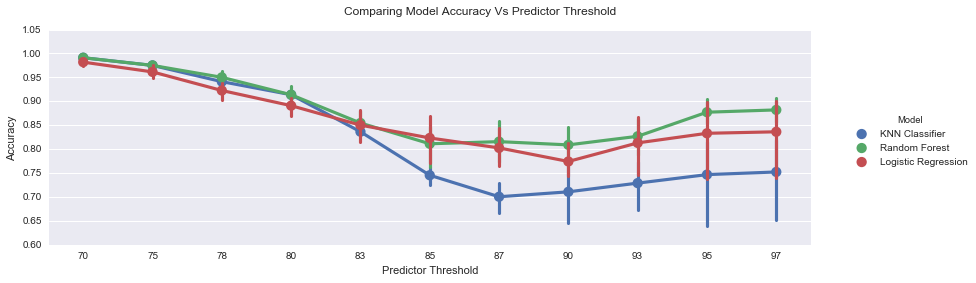

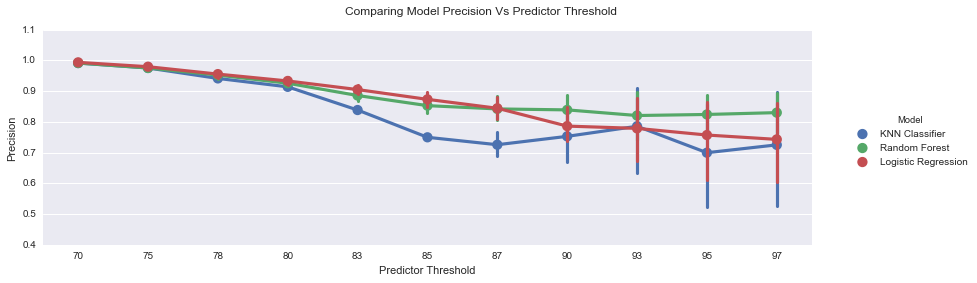

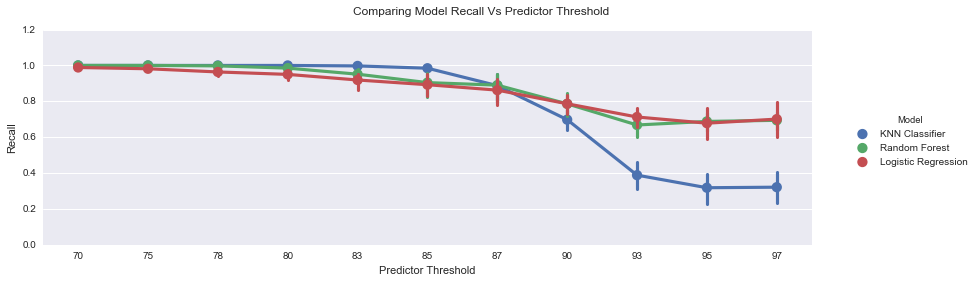

In [56]:
# Factor Plot
List = ['Accuracy','Precision', 'Recall']

for i in List:
    g = sns.factorplot(x='Predictor Threshold', 
                       y=i, 
                       data=Data,
                       Size = 20,
                       aspect  = 3,
                       legend =True,
                       margin_titles=True,
                       hue='Model',  # Color by stage
                       #col='Model',  # Separate by stage
                       kind='point') # Swarmplot
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Comparing Model '+ i + ' Vs Predictor Threshold')

The accuracy, precision and recall for Random Forest and Logistic regression classifier follow the same trend with varying threshold which we used to convert our predictor, `Graduation_Rate4_Yr`, to a binary feature. We see a significant drop in the KNN classifier as the threshold increases. 

When the classes are imbalanced, our classifiers seem to perform better.

When our classes are evenly balanced, our classifiers struggle with the correctly classifying the schools.

<a class="anchor" id="LAB3"></a>
<div class="alert alert-info"><h1>

<font color=green>CLUSTER ANALYSIS MODELING AND EVALUATION [50 Points]</font>
</h1></div>

## Introduction
The goal of unsupervised learning is to find patterns in data. Clustering is one method which can be used to find homogeneous sub-groups within a larger group. For our dataset, we are interested in finding whether there are groups of schools which have similar features. We used two approaches to cluster the schools - Partition clustering using k-means algorithm and Hierarchical Clustering with various agglomorative/linkage functions. Several distance measures and linkage methods have been used to decide which schools can be clustered together. 

Largely there were two groups of schools, ones which have a `Avg High School Graduation Rate` which is greater than NC schools average are clustered into one group and ones which have a `Avg High School Graduation Rate` which is less than NC schools average. 

The goal of this lab is to group observations into clusters based on how similar they are. We then compare our clustering results with existing features to see how well our clustering algorithms have worked. We explore how each clustering model performs in terms of separating schools into categories and how the clustering models compare to each other.

F


In [9]:
# load required packages
#library(tidyverse)  # data manipulation
#library(cluster)    # clustering algorithms
#library(factoextra) # clustering algorithms & visualization
#install.packages("pacman", repos = "http://cran.us.r-project.org")
pacman::p_load(pacman,tidyverse,cluster,factoextra, dplyr, readxl, ggplot2,mclust,e1071, NbClust, fpc,radiant, dbscan,cowplot,gridExtra)

#### Clustering Dataset

***data.csv*** that we import below is data from preprocessing and cleaning step in LAB2.  We created dummy variables for categorical variables except for those that we could potential use as class labels for clustering. Our potential class variable that are retain are the following variables. 

* 'Above_NC_AVG_Graduation_Rate4_Yr',

We wrote our data after preprocessing in a csv file for easy import in R which was our language of choice for lab 3. 

In [10]:
data<-read.csv('data.csv')

In [11]:
rownames(data) <- data$unit_code
data$unit_code <- NULL # delete the index column
head(data)

X   student_num lea_avg_student_num Avg_Class_Size_Biology Avg_Class_Size_EnglishII Avg_Class_Size_MathI Avg_Dist_Size_Biology Avg_Dist_Size_EnglishII Avg_Dist_Size_MathI lea_total_expense_num
100307 116  311        947                 21                     16                       12                   18                    18                      18                  9324.04              
100326 122 1033        947                 21                     18                       18                   18                    18                      18                  9324.04              
100334 124 1096        947                 21                     21                       17                   18                    18                      18                  9324.04              
100348 132 1346        947                 20                     20                       17                   18                    18                      18                  9324.04              
110304 134 1279        779                 22                     23                       21                   19                    19                      22                  9079.74              
110322 139  268        779                 19                     19                       19                   19                    19                      22                  9079.74              
       ⋯ EVAAS.Growth.Status_NotMet Byod_No Byod_Yes X1_to_1_access_No X1_to_1_access_Yes Overall_Achievement_Score_bins_E Overall_Achievement_Score_bins_D Overall_Achievement_Score_bins_C
100307 ⋯ 0                          0       1        0                 1                  0                                0                                0                               
100326 ⋯ 0                          0       1        1                 0                  0                                1                                0                               
100334 ⋯ 0                          1       0        1                 0                  0                                0                                1                               
100348 ⋯ 0                          0       1        1                 0                  0                                0                                1                               
110304 ⋯ 0                          0       1        1                 0                  0                                0                                0                               
110322 ⋯ 0                          1       0        1                 0                  0                                0                                0                               
       Overall_Achievement_Score_bins_B Overall_Achievement_Score_bins_A
100307 0                                1                               
100326 0                                0                               
100334 0                                0                               
100348 0                                0                               
110304 1                                0                               
110322 0                                1

In [12]:
str(data) # peak at the data

'data.frame':	440 obs. of  140 variables:
 $ X                                             : int  116 122 124 132 134 139 140 144 146 149 ...
 $ student_num                                   : num  311 1033 1096 1346 1279 ...
 $ lea_avg_student_num                           : num  947 947 947 947 779 779 779 779 779 779 ...
 $ Avg_Class_Size_Biology                        : num  21 21 21 20 22 19 20 21 19 18 ...
 $ Avg_Class_Size_EnglishII                      : num  16 18 21 20 23 19 20 21 20 17 ...
 $ Avg_Class_Size_MathI                          : num  12 18 17 17 21 19 19 22 17 20 ...
 $ Avg_Dist_Size_Biology                         : num  18 18 18 18 19 19 19 19 19 19 ...
 $ Avg_Dist_Size_EnglishII                       : num  18 18 18 18 19 19 19 19 19 19 ...
 $ Avg_Dist_Size_MathI                           : num  18 18 18 18 22 22 21 22 22 22 ...
 $ lea_total_expense_num                         : num  9324 9324 9324 9324 9080 ...
 $ lea_salary_expense_pct                        

In [13]:
dim(data)

[1] 440 140

Our starting dataset has 140 features and 440 instances. 

From the summary above, we note our features are not on the same scale. This could be a problem escpecially in the selection of Principal components as high variance features would always dominate. We proceed to split our data to training set and class lables then standadize our training data to bring all features to the same scale.

### Splitting data to training set and labels

In [14]:
summary(as.factor(data$Above_NC_AVG_Graduation_Rate4_Yr))

0   1 
119 321

Above is a list of our potential class lables which we will remove fromout training set but later use to evaluate how well our clustering algorithms are doing. We will select one of this to use.

##### Needs to update this depending pon which class label we choose to proceed with.

In [15]:
# create the data to cluster on and the class variable
data.new<- data[,-which(names(data) %in% c('Above_NC_AVG_Graduation_Rate4_Yr'))]
data.class<- data[,'Above_NC_AVG_Graduation_Rate4_Yr']

In [16]:
head(data.class)

[1] 1 0 0 1 1 1

### Data Scaling

In [17]:
set.seed(1000000)
#dat <- data.frame(data.new)
print('Before scaling')
head(data.new,2)
scaled_data.new<- data.new %>% mutate_each_(funs(scale(.) %>% as.vector), 
                             vars=c(names(data.new)))
print('After scaling')
head(scaled_data.new,2)

[1] "Before scaling"


X   student_num lea_avg_student_num Avg_Class_Size_Biology Avg_Class_Size_EnglishII Avg_Class_Size_MathI Avg_Dist_Size_Biology Avg_Dist_Size_EnglishII Avg_Dist_Size_MathI lea_total_expense_num
100307 116  311        947                 21                     16                       12                   18                    18                      18                  9324.04              
100326 122 1033        947                 21                     18                       18                   18                    18                      18                  9324.04              
       ⋯ EVAAS.Growth.Status_NotMet Byod_No Byod_Yes X1_to_1_access_No X1_to_1_access_Yes Overall_Achievement_Score_bins_E Overall_Achievement_Score_bins_D Overall_Achievement_Score_bins_C
100307 ⋯ 0                          0       1        0                 1                  0                                0                                0                               
100326 ⋯ 0                          0       1        1                 0                  0                                1                                0                               
       Overall_Achievement_Score_bins_B Overall_Achievement_Score_bins_A
100307 0                                1                               
100326 0                                0

`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`


[1] "After scaling"


X         student_num lea_avg_student_num Avg_Class_Size_Biology Avg_Class_Size_EnglishII Avg_Class_Size_MathI Avg_Dist_Size_Biology Avg_Dist_Size_EnglishII Avg_Dist_Size_MathI
1 -1.673353 -0.9784000  0.2440835           0.2964675              -0.8996305               -1.5896839           -0.2591576            -0.4089608              -0.9317166         
2 -1.664362  0.2219387  0.2440835           0.2964675              -0.4571069               -0.2385038           -0.2591576            -0.4089608              -0.9317166         
  lea_total_expense_num ⋯ EVAAS.Growth.Status_NotMet Byod_No   Byod_Yes X1_to_1_access_No X1_to_1_access_Yes Overall_Achievement_Score_bins_E Overall_Achievement_Score_bins_D
1 0.1882198             ⋯ -0.6895122                 -1.341063 1.341063 -1.6500339         1.6500339         -0.2749952                       -0.6081727                      
2 0.1882198             ⋯ -0.6895122                 -1.341063 1.341063  0.6046708        -0.6046708         -0.2749952                        1.6405329                      
  Overall_Achievement_Score_bins_C Overall_Achievement_Score_bins_B Overall_Achievement_Score_bins_A
1 -0.7256571                       -0.5100514                        2.8883729                      
2 -0.7256571                       -0.5100514                       -0.3454288

integer(0)

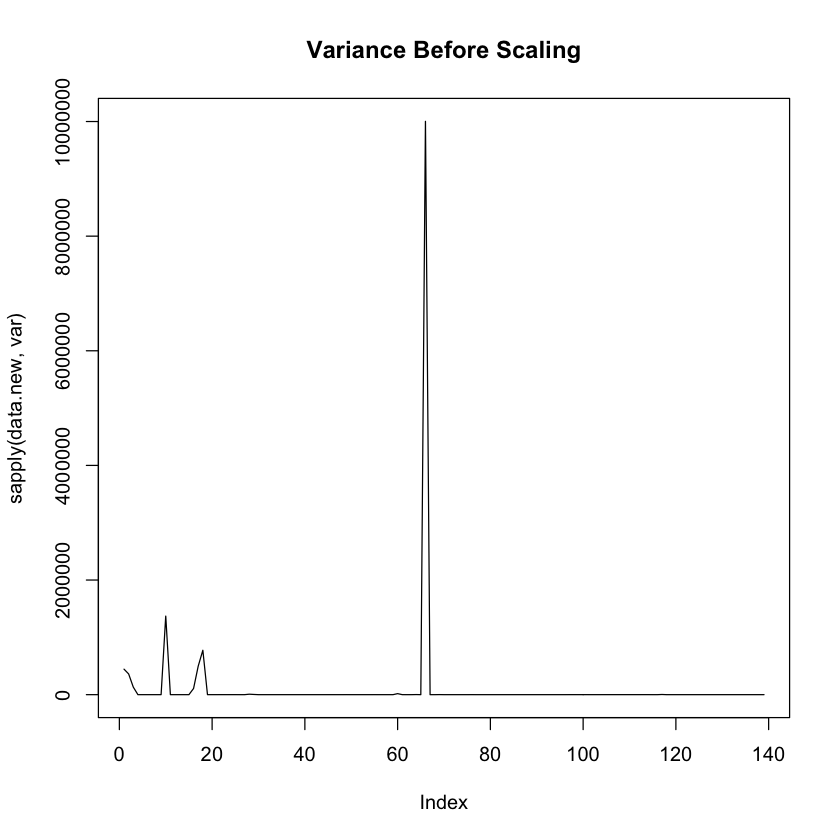

integer(0)

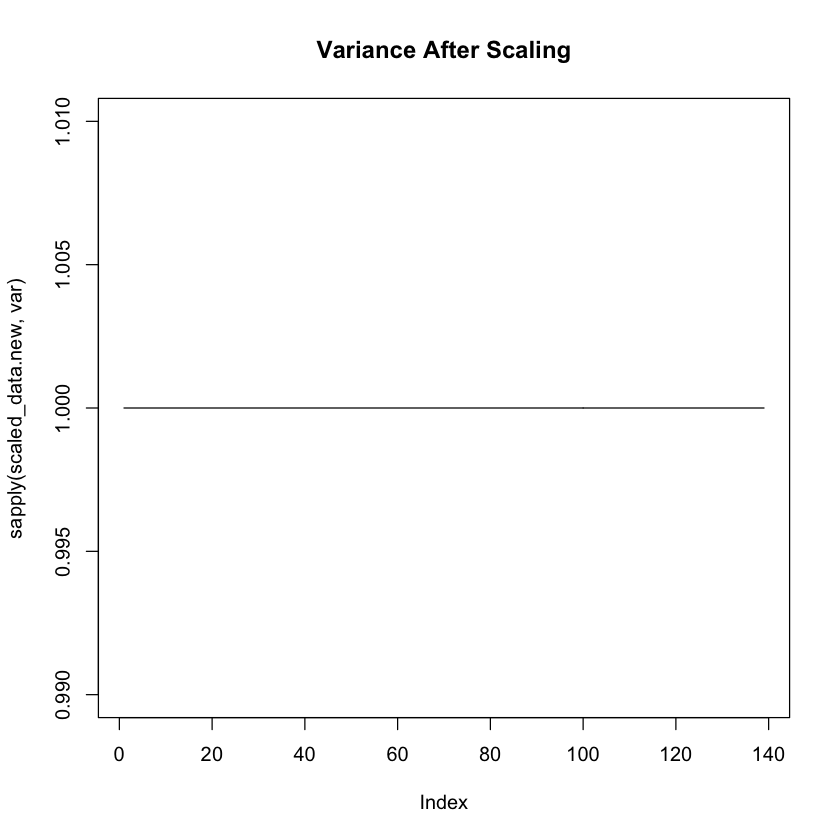

In [21]:
# Checking variance is uniform
plot(sapply(data.new, var),  t='l')+title('Variance Before Scaling')
# Verify variance is uniform
plot(sapply(scaled_data.new, var),  t='l')+title('Variance After Scaling')

In the above plot we verify equal variance on the scaled data 

### Dimensionality Reduction

Since our dataset, has 148 features we thought this was a great opportunity for us to practice dimensionality reduction to make our data visualization much easier. Below we show a sample of what a daunting task it would be visualizing our dataset with full 148 features. 

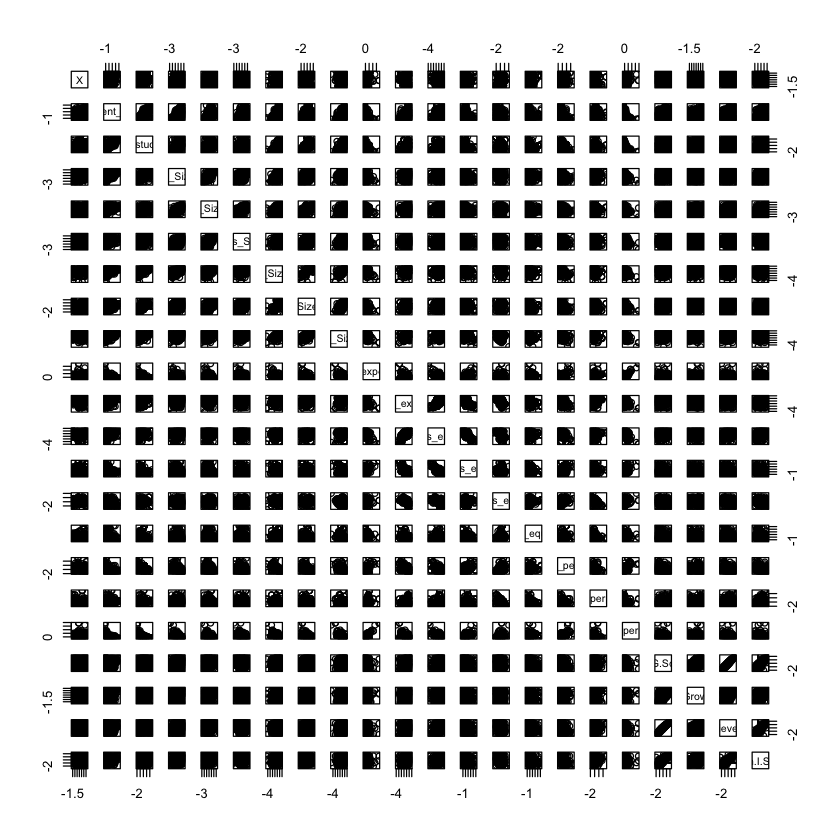

In [22]:
plot(scaled_data.new[,1:22])

In [23]:
# the funct,ion below will beused to display scree plots for selection of PCAs. 
# The code is adopted from http://rstudio-pubs-static.s3.amazonaws.com/27823_dbc155ba66444eae9eb0a6bacb36824f.html
pcaCharts <- function(x) {
    x.var <- x$sdev ^ 2
    x.pvar <- x.var/sum(x.var)
    print("proportions of variance:")
    print(x.pvar)
    
    par(mfrow=c(2,2))
    plot(x.pvar,xlab="Principal component", ylab="Proportion of variance explained", ylim=c(0,1), type='b')
    plot(cumsum(x.pvar),xlab="Principal component", ylab="Cumulative Proportion of variance explained", ylim=c(0,1), type='b')
    screeplot(x)
    screeplot(x,type="l")
    par(mfrow=c(1,1))
}

[1] "proportions of variance:"
                    Comp.1                     Comp.2                     Comp.3                     Comp.4                     Comp.5                     Comp.6                     Comp.7 
0.234337461437075095238569 0.096670606335038905543300 0.056152700080056482112578 0.037540821946486779836505 0.035045824733604458156577 0.028543792953954531810279 0.024612642282409058491766 
                    Comp.8                     Comp.9                    Comp.10                    Comp.11                    Comp.12                    Comp.13                    Comp.14 
0.020718263327631446929500 0.020046469319293300920259 0.018923358089866500891807 0.018158257710863615064234 0.016409791080964995085845 0.015823886805763319463036 0.014950032102555575394542 
                   Comp.15                    Comp.16                    Comp.17                    Comp.18                    Comp.19                    Comp.20                    Comp.21 
0.01463265708074300

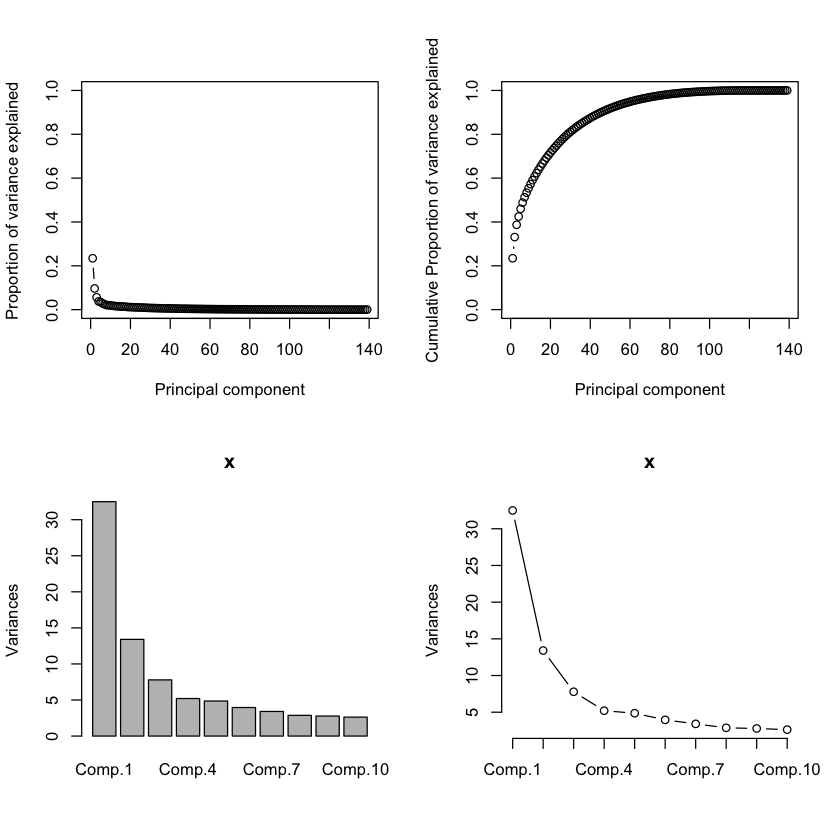

In [24]:
# Proceed with principal components
pc <- princomp(scaled_data.new)
pcaCharts(pc)

Looking at the the summary of Pricipal components above, we note that 10 Pricipal components account for majority of the variance in our education data ~60% of the variance. This helps us reduce our target visualization to 10 from 148 features. 

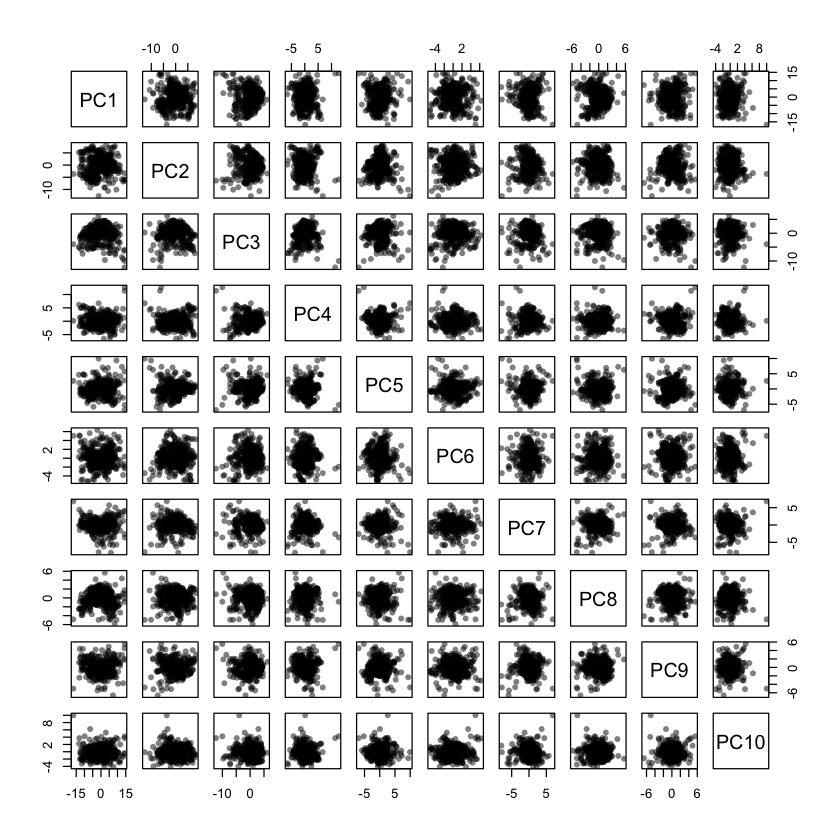

In [25]:
# Get principal component vectors using prcomp instead of princomp
# from above 4 PC explain most of the variation
#pc <- prcomp(scaled_new.data)
pc <- prcomp(scaled_data.new)

# First four principal components
comp <- data.frame(pc$x[,1:10])
# Plot
plot(comp, pch=16, col=rgb(0,0,0,0.5))

<div class="alert alert-info"><h1>

<font color=black> Train and adjust parameters (10 points)</font>
</h1></div>


#### Reference: 
* https://www.r-bloggers.com/k-means-clustering-in-r/
* https://uc-r.github.io/kmeans_clustering
* http://www.saedsayad.com/clustering_kmeans.htm
* http://www.sthda.com/english/articles/30-advanced-clustering/104-model-based-clustering-essentials/


<div class="alert alert-info"><h2>

<font color=red>1. Kmeans Clustering</font>
</h2></div>


K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. For our North Carolina High school Education dataset, we will be aiming to group schools with the greatest similarity together.

As we will see below, K-Means is a relatively an efficient method. However, we need to specify the number of clusters, in advance and the conclusive results are sensitive to initialization and often terminates at a local optimum.  A practical approach is to compare the outcomes of multiple runs with different k and choose the best one based on a predefined criterion. In general, a large k decreases the error but increases the risk of overfitting.

For K-means clustering, we choose to k and nstart as parameters to play with to tune our model:
* **Centers (k)** - number of clusters. We will use both a manual approach where we will visually evaluate the clusters and other approaches which use within sums of squares to determine the optimal number of clusters.
* **nstart** - Defines how many random sets should be chosen. nstart attempts multiple initial configurations and reports on the best clustering configuration.


In [22]:
#Rdocumentation to kmeans clustering
#?kmeans

In [26]:
#run Kmeans clustering with 2 centers to start as we know we have atleast two class variables.
#We will tune for optimal number of clusters later on
set.seed(1000000000)
result<- kmeans(comp,centers =3, nstart = 25)



Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



[1] "clustering with centers(k) =2"
[1] "Clusters content"


[1] 255 185

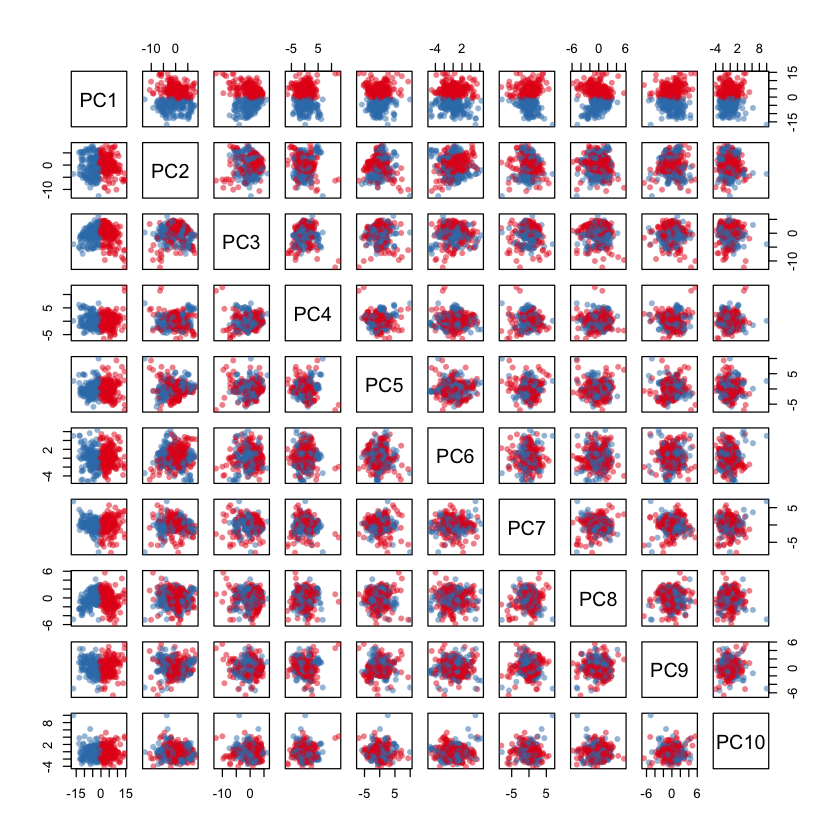

In [27]:
# Apply k-means with k=2
k2 <- kmeans(comp, 2, nstart=250, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =2')

print('Clusters content')
k2$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k2$clust, pch=16)

#pulling the first two dimensions only to compare later on
p2 <- fviz_cluster(k2, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2")


In [28]:
# How does the clustering model do?
table(data.frame(data.class, k2$cluster))

          k2.cluster
data.class   1   2
         0 111   8
         1 144 177

[1] "clustering with centers(k) =3"
[1] "Clusters content"


[1] 162  99 179

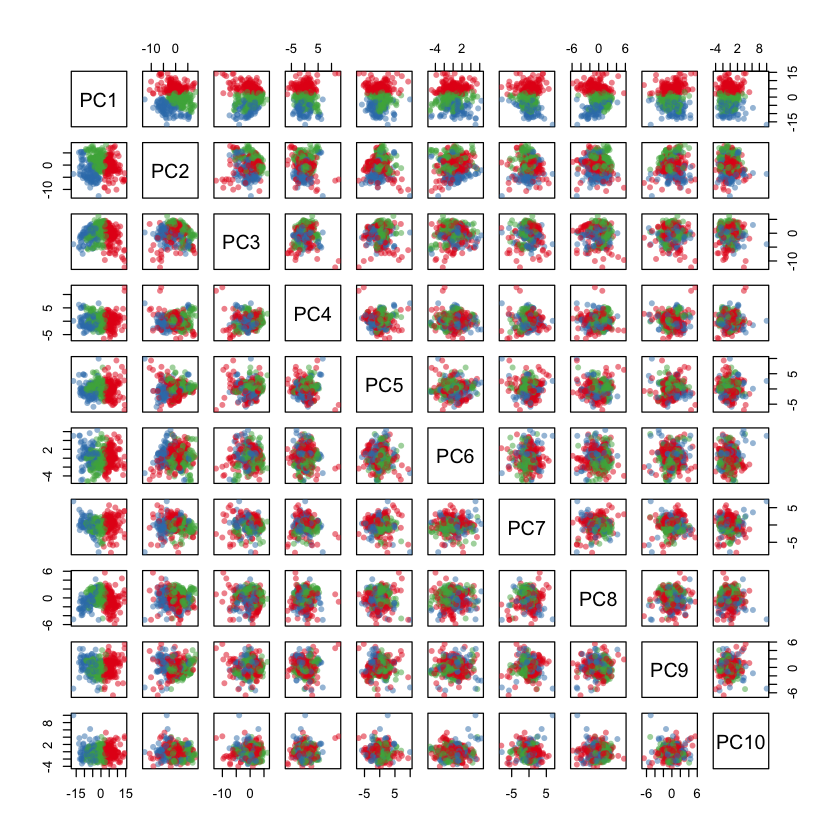

In [29]:
# Apply k-means with k=3
k3 <- kmeans(comp, 3, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =3')
print('Clusters content')
k3$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k3$clust, pch=16)


#pulling the first two dimensions only to compare later on
p3 <- fviz_cluster(k3, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 3")

[1] "clustering with centers(k) =5"
[1] "Clusters content"


[1] 153  43  16 144  84

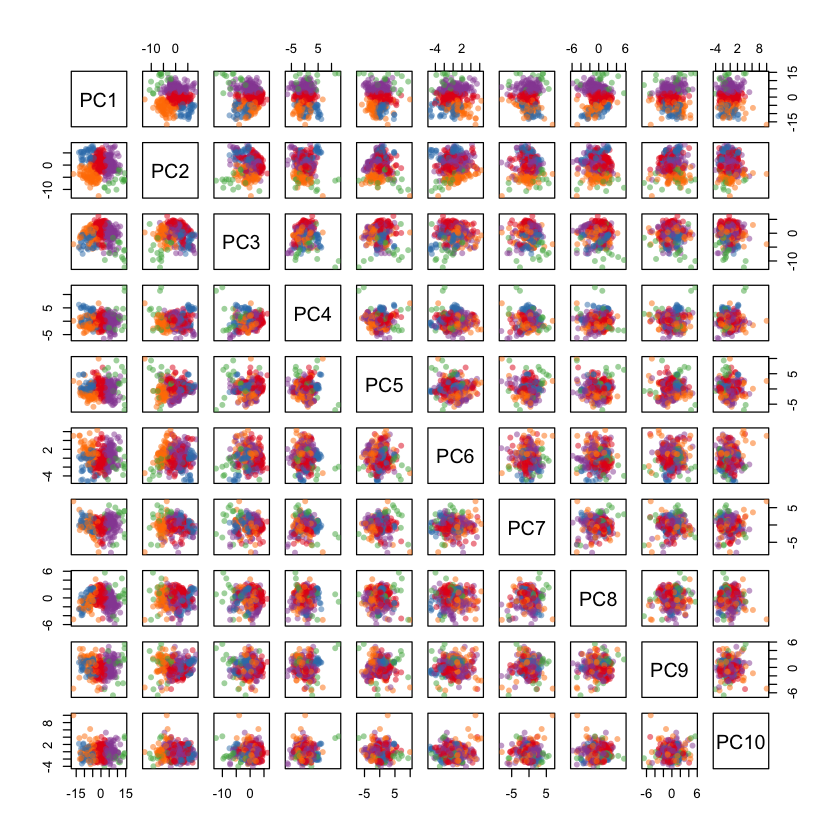

In [30]:
# Apply k-means with k=5
k5 <- kmeans(comp, 5, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =5')
print('Clusters content')
k5$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k5$clust, pch=16)


#pulling the first two dimensions only to compare later on
p5 <- fviz_cluster(k5, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 5")

[1] "clustering with centers(k) =7"
[1] "Clusters content"


[1]  44  12  36  77  60 115  96

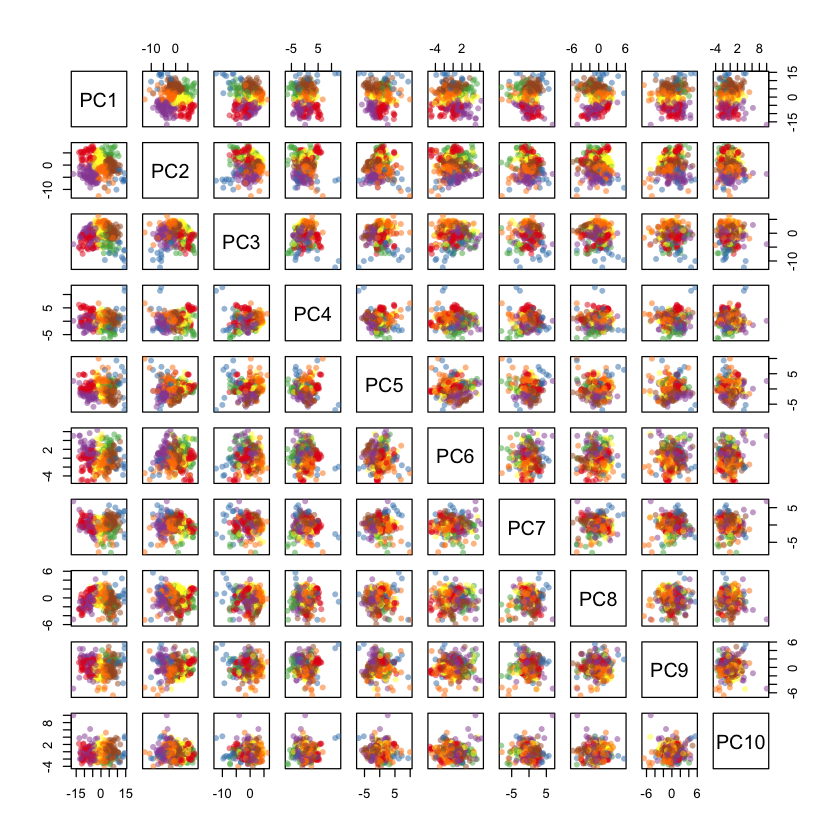

In [31]:
# Apply k-means with k=7
k7 <- kmeans(comp, 7, nstart=25, iter.max=1000)
library(RColorBrewer)
library(scales)
print('clustering with centers(k) =7')
print('Clusters content')
k7$size # gives no. of records in each cluster
palette(alpha(brewer.pal(9,'Set1'), 0.5))
plot(comp, col=k7$clust, pch=16)

#pulling the first two dimensions only to compare later on
p7 <- fviz_cluster(k7, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 7")

###  A closer look at the first two Principal componets with difference selected centers

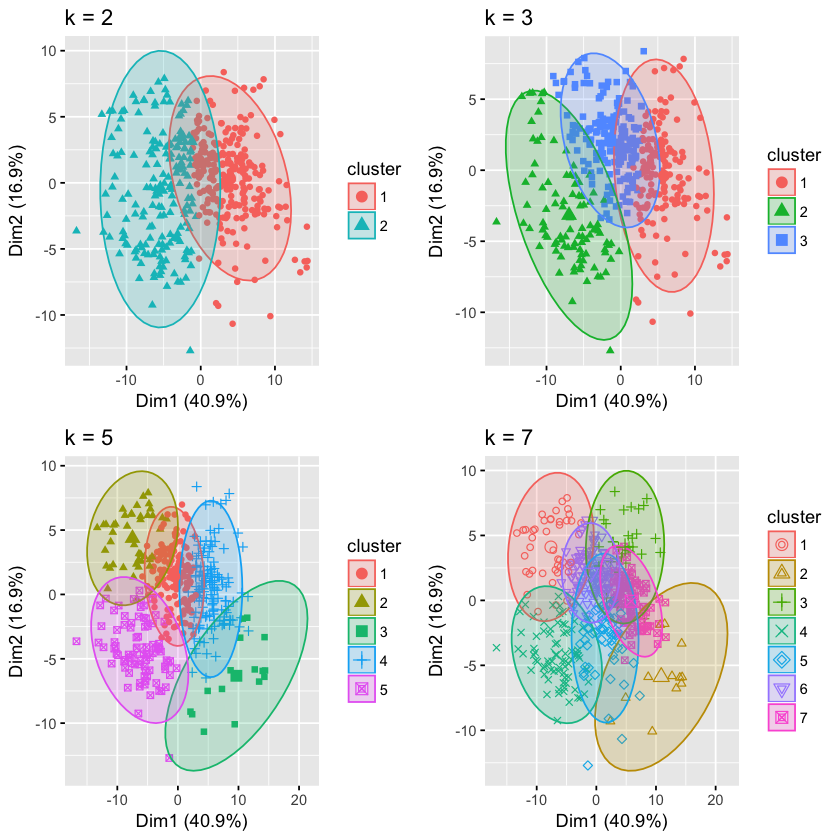

In [32]:
# plots to compare
grid.arrange(p2, p3,p5, p7, nrow=2)

Taking a closer look at the visualizations above, 2 or 3 centers seem to give us the optimal number of clusters. With 2/3 clusters, the clusters are well seperated compared to when we increase the number of clusters to 5 or 7. We can conclude, for our north carolina dataset,when we use more than 3 centers, we start over fitting the data.

## Selecting Optimal number K clusters based on within-Clusters sum of Squares

###  Method 1: Elbow Method

The basic idea is to define clusters such that the total intra-cluster variation (known as total within-cluster variation or total within-cluster sum of square) is minimized: We use a built in fviz_nbclust function from  factorextra library

###  Method 2: Average Silhouette Method

Average silhouette approach measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. 

In [33]:
a = fviz_nbclust(comp, kmeans, method = "wss")+geom_vline(xintercept = 2, linetype = 2)

In [34]:
b =fviz_nbclust(comp, kmeans, method = "silhouette")

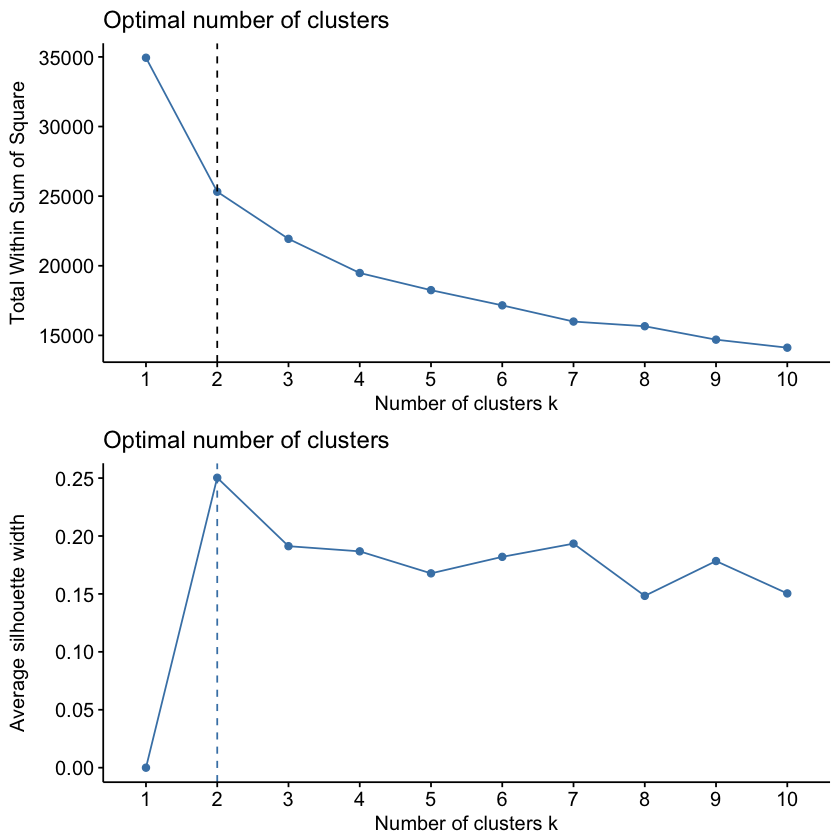

In [35]:
library(gtable)
library(grid)

g2 <- ggplotGrob(a)
g3 <- ggplotGrob(b)
g <- rbind(g2, g3, size = "first")
g$widths <- unit.pmax(g2$widths, g3$widths)
grid.draw(g)

From the figure above, we show using both Elbow Method and silhouette method from factorextra library in R. The optimal number of clusters for K means clustering is determined to be 2 on the North Carolina Educational dataset using both methods for cluster slection.

## varying nstart

Now that we have determined our optimal number of clusters to be 2, lets check the effect of varying nstart. Varying nstart (number of random sets choosen) seems to have no effect on the clusters assignments of our dataset. This implies our datesetset with k =2 is well separated and stable.

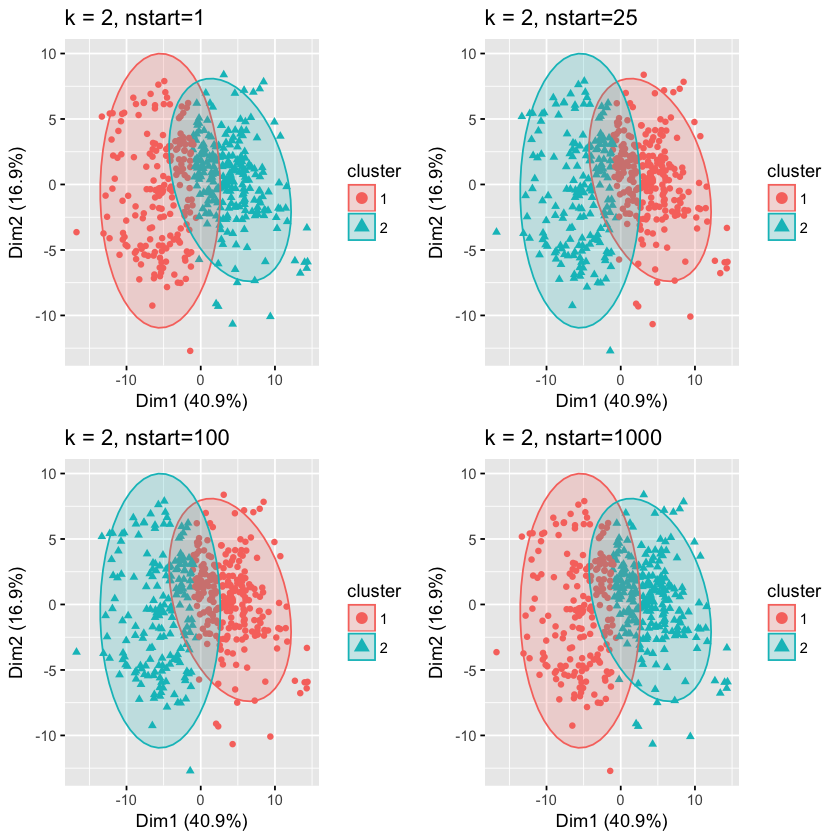

In [36]:
n1 <- kmeans(comp, 2, nstart=1, iter.max=1000)
n25 <- kmeans(comp, 2, nstart=25, iter.max=1000)
n100 <- kmeans(comp, 2, nstart=100, iter.max=1000)
n1000<-kmeans(comp, 2, nstart=1000, iter.max=1000)

#pulling the first two dimensions only to compare later on
c1 <- fviz_cluster(n1, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=1")
c2 <- fviz_cluster(n25, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=25")
c3 <- fviz_cluster(n100, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=100")
c4 <- fviz_cluster(n1000, geom = "point", data = comp, stand = FALSE, ellipse.type = "norm") + ggtitle("k = 2, nstart=1000")

# plots to compare
grid.arrange(c1, c2,c3, c4, nrow=2)


<div class="alert alert-info"><h2>

<font color=red>2. Heirarchical Clustering</font>
</h2></div>

Heirarchical Clustering is a cluster analysis method, which produces a tree-based representation (i.e dendrogram) of the data. It starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named a dendogram.

Steps for heirarchical clustering:
- Prepare the data by scaling
- Compute the distance matrix between each pair of objects in the dataset.
- Use a linkage function to group objects into heirarchical cluster tree. Objects/clusters that are in close proximity are linked together using the  linkage function
- Determine where to cut the tree into clusters. This creates a partition of the data.

Here, we will be using the `comp` dataframe which contains the first ten principal components. As a reminder, we scaled the data and applied `prcomp` and based on the scree-plot analysis, decided to use the first ten principal components. 

In [42]:
head(comp)

PC1         PC2        PC3        PC4        PC5         PC6         PC7        PC8       PC9        PC10     
1  -8.7074958 -5.6971391 -0.3676341 -1.9735130 -0.05593739  0.02175901  0.2085539 -1.022816  2.1866078 1.0305722
2   3.4908227  0.3760429  0.4823906 -1.2051288  0.21183430  0.88735953 -0.2153062  2.071607  0.6891603 1.8102335
3  -0.5023737 -0.1097680  0.6222068  0.2637406  0.37650087 -0.61968812  0.3977716  3.007175 -0.7711777 1.2101457
4  -0.2785913  0.5680220  0.8167782 -0.4887510  0.50475822 -1.06905735 -0.5394262  2.897358 -0.4898594 1.6064411
5  -4.3300536  2.8155600  1.2530538 -0.5023074  1.37329198 -0.38809283 -0.3417910  1.399909 -0.2429808 1.0805333
6 -10.0410473 -2.7589310  1.6776142 -1.5849860 -0.39844563  2.64981302  0.5013576 -0.997309  0.9343716 0.7722452

In [43]:
dim(comp)

[1] 440  10

In order to decide which objects/clusters should be combined we need methods for measuring similarity between objects. In R we can use the `dist()` function to compute the distance between every pair of objects in the dataset. The result is called a dissimilarity or distance matrix. By default, dist() function computes the Euclidean distance between objects. 

In [48]:
# make a copy 
hrc <- comp

In [49]:
# calculate the distance matrix
hrc.dist <- dist(hrc)

The linkage function takes the distance information, returned by the function dist(), and groups pairs of objects into clusters based on their similarity. Next, these newly formed clusters are linked to each other to create bigger clusters. This process is iterated until all the objects in the original data set are linked together in a heirarchical tree. 

In [51]:
# Use complete linkage method
hrc.link <- hclust(d = hrc.dist, method="complete")

- `d`: distance matrix
- `method`: The linkage method used. There are many agglomeration (linkage) methods, of which "`complete or maximum`" linkage is one of them. In complete linkage method, the distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster2. It tends to produce more compact clusters.

Dendograms correspond to the graphical representation of the heirarchical tree generated by the function `hclust()`. Dendograms can be produced in R using the base function `plot(hrc.link)`, where hrc.link is the output of hclust(). Here, we will use the function `fviz_dend()` of the `factoextra` R package to produce beautiful dendograms. 


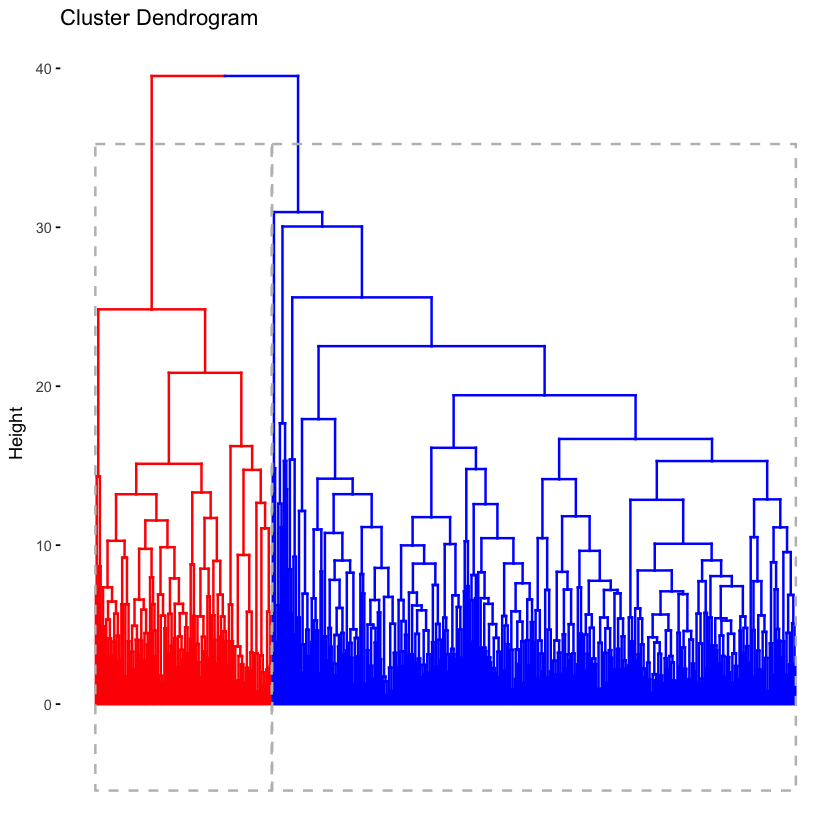

In [66]:
# Cut the dendrogram into 2 groups
fviz_dend(hrc.link, k=2, # Cut into 2 groups
          show_labels= F, # don't show labels
         k_colors = c("red", "blue"),
         rect = T)

#fviz_dend(hrc.link, cex=0.5, show_labels = F)

In the dendogram displayed above, each leaf corresponds to one object. As we move up the tree, objects that are similar to each other are combined into branches, which are themselves fused at a higher height. The height of the fusion, provided on the vertical axis, indicates the (dis)similarity/distance between two objects/clusters. The higher the height of the fusion, the less similar the objects are.

In order to identify sub-groups, we can cut the dendogram at a certain height. One of the problems with hierarchical clustering is that, it does not tell us how many clusters there are, or where to cut the dendrogram to form clusters. You can cut the hierarchical tree at a given height in order to partition our data into clusters. The R base function `cutree()` can be used to cut a tree, generated by the `hclust()` function, into several groups either by specifying the desired number of groups or the cut height. It returns a vector containing the cluster number of each observation.

In [67]:
hrc.clusters <- cutree(hrc.link, k=2)

In [68]:
table(hrc.clusters)

hrc.clusters
  1   2 
111 329 

In [69]:
table(data.class)

data.class
  0   1 
119 321 

### Using ward.D2 as the linkage function


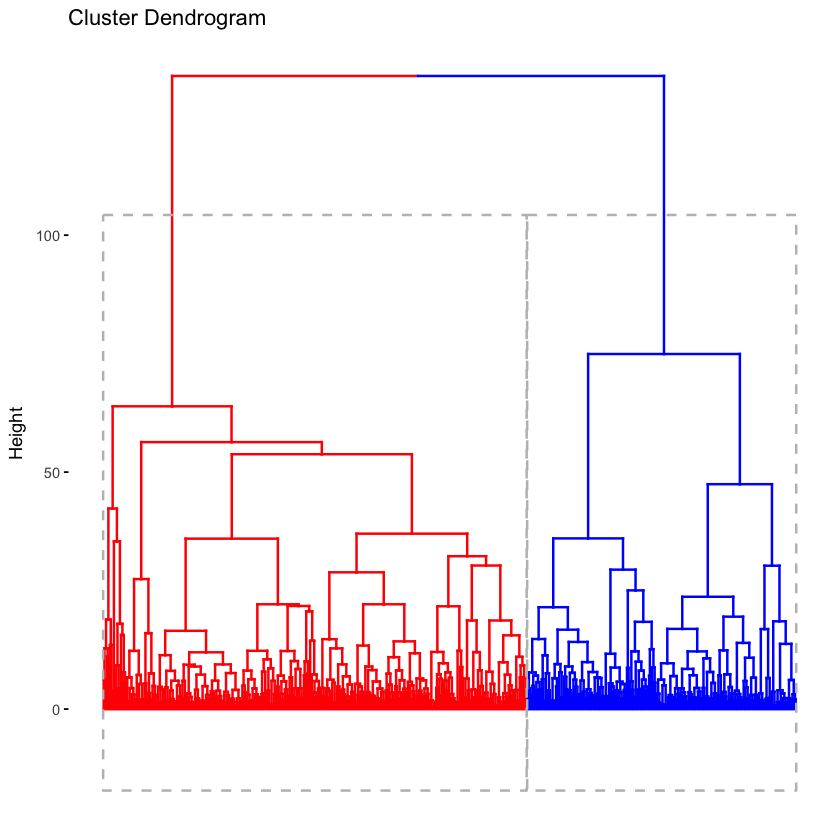

In [71]:
# Use complete linkage method
hrc.link.ward2 <- hclust(d = hrc.dist, method="ward.D2")

# Cut the dendrogram into 2 groups
fviz_dend(hrc.link.ward2, k=2, # Cut into 2 groups
          show_labels= F, # don't show labels
         k_colors = c("red", "blue"),
         rect = T)

Compare `ward.D2` linkage method performance.

In [72]:
hrc.ward2.clusters <- cutree(hrc.link.ward2, k=2)
table(hrc.ward2.clusters)

hrc.ward2.clusters
  1   2 
171 269 

### Hierarchical clustering model comparison

#### Evaluate and Compare 

Here we compare two dendgrams using the `dendextend` R package. The `dendextend` package provides several functions for comparing dendograms. Here we will explore two methods:
- `tanglegram()` for visual comparison of two dendrograms.
- and `cor.dendlist()` for computing a correlation matrix between dendrograms.

In [75]:
suppressPackageStartupMessages(library(dendextend))

dend1 <- as.dendrogram(hrc.link)
dend2 <- as.dendrogram(hrc.link.ward2)

# Create a list to hold dendrograms
dend_list <- dendlist(dend1, dend2)

To visually compare two dendrograms, we will use the `tanglegram()` function which plots two dendrograms, side by side, with their labels connected by lines. The quality of the alignment of the two trees can be measured using the function `entanglement()`. Entanglement is a measure between 1 (full entanglement) and 0 (no entanglement). A lower entanglement coefficient corresponds to a good alignment.

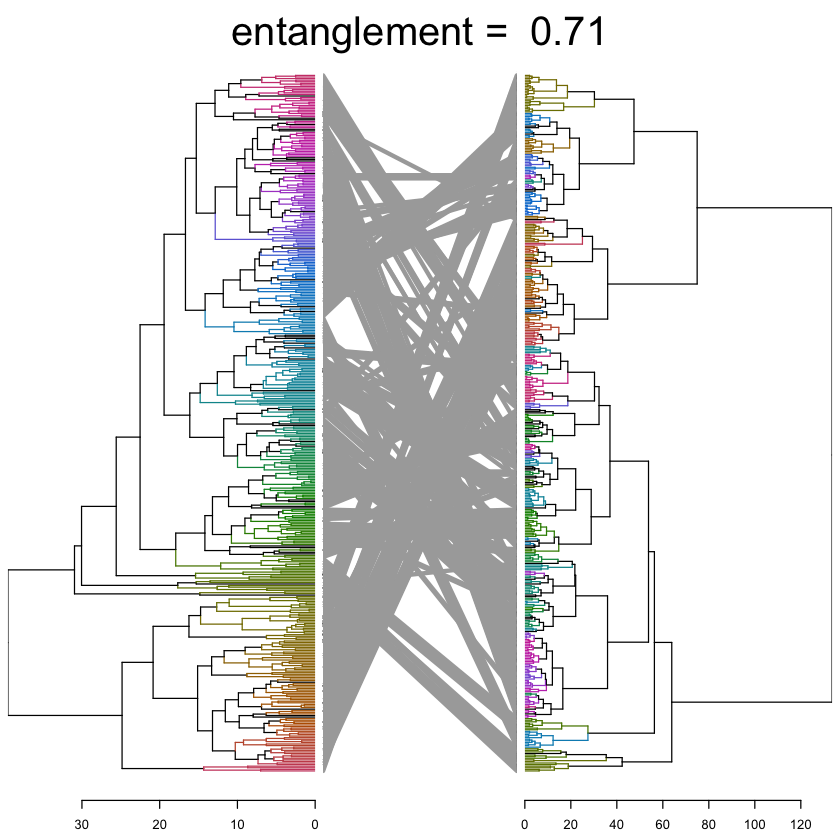

In [84]:
# Draw a tanglegram between linkage methods "complete" and "ward.D2"
tanglegram(dend1, dend2,
          highlight_distinct_edges = F, # Turn-off dashed lines
          common_subtrees_color_lines = F,
          common_subtrees_color_branches = T,
          margin_inner=0.5,
          edge.lwd=1,
          cex.main=0.25,
          main = paste("entanglement = ", round(entanglement(dend_list), 2)))

In [80]:
?tanglegram

## Evaluate the goodness of the clustering algorithms

In [57]:
# Compute the cophenetic distance
#hrc.coph <- cophenetic(hrc.link)

# Correlation b/w cophenetic distance and 
# original distance.
#cor(hrc.dist, hrc.coph)

#rownames(hrc) <- data$unit_code
#hrc$unit_code <- NULL # delete the index column
#head(hrc)

#?fviz_dend

[1] 0.5668282

<div class="alert alert-info"><h2>

<font color=red>2. Model Based Clustering </font>
</h2></div>

#### Ref: 
* http://www.sthda.com/english/articles/30-advanced-clustering/104-model-based-clustering-essentials/

#needs a write up on model based clustering

In [28]:
# Model Based Clustering
library(mclust)
fit <- Mclust(comp)
summary(fit) # display the best model

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VVE (ellipsoidal, equal orientation) model with 8 components:

 log.likelihood   n  df       BIC       ICL
      -8910.327 440 212 -19111.05 -19165.44

Clustering table:
  1   2   3   4   5   6   7   8 
 58  73  68 121  40  44  23  13 

paramater tuning

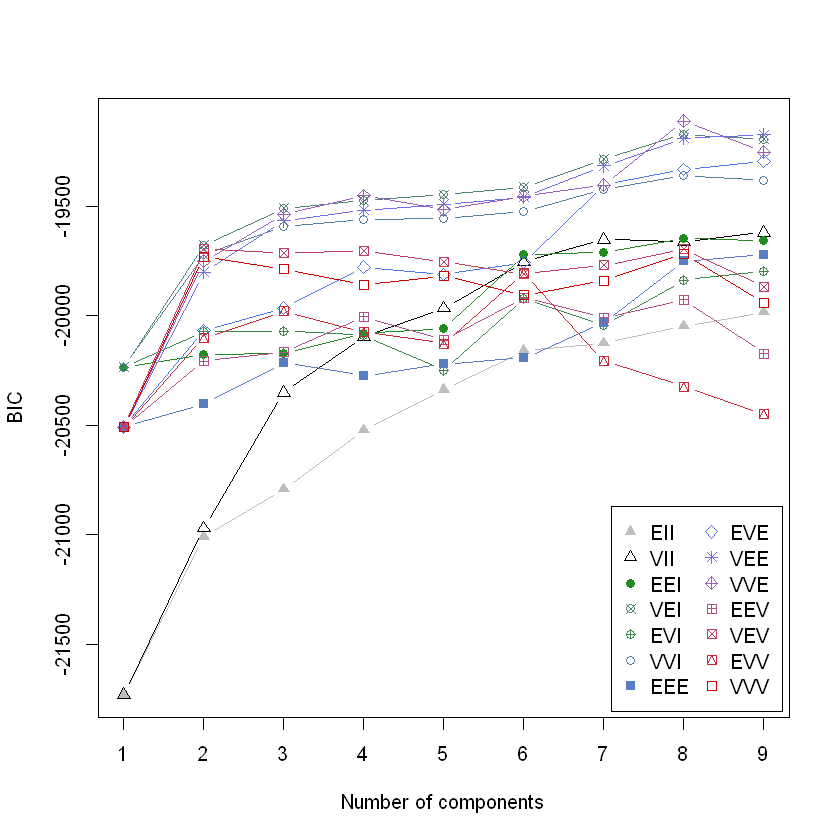

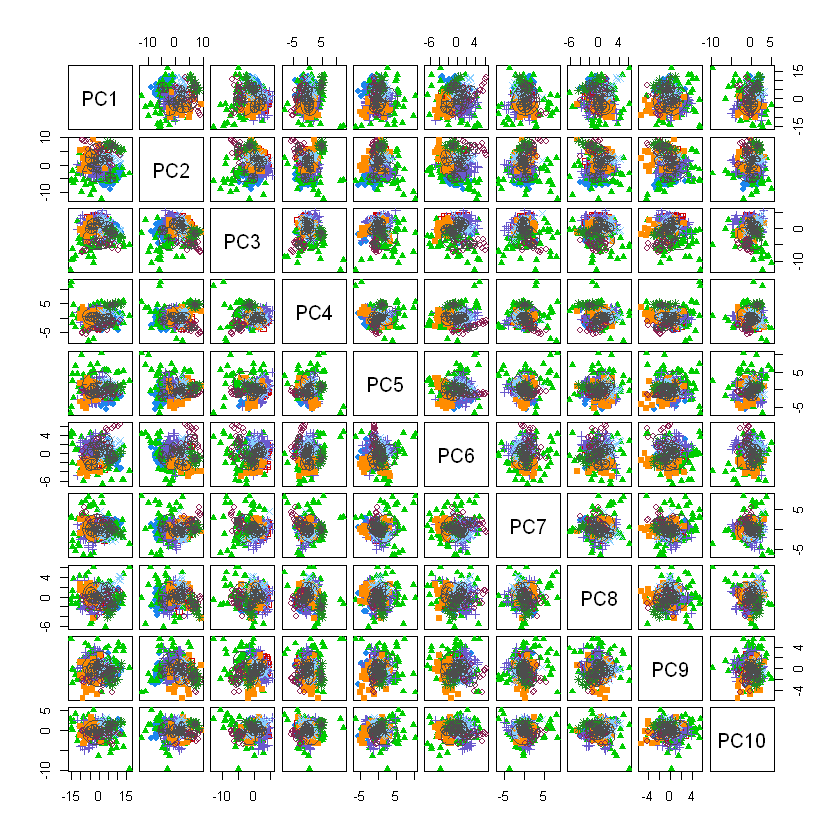

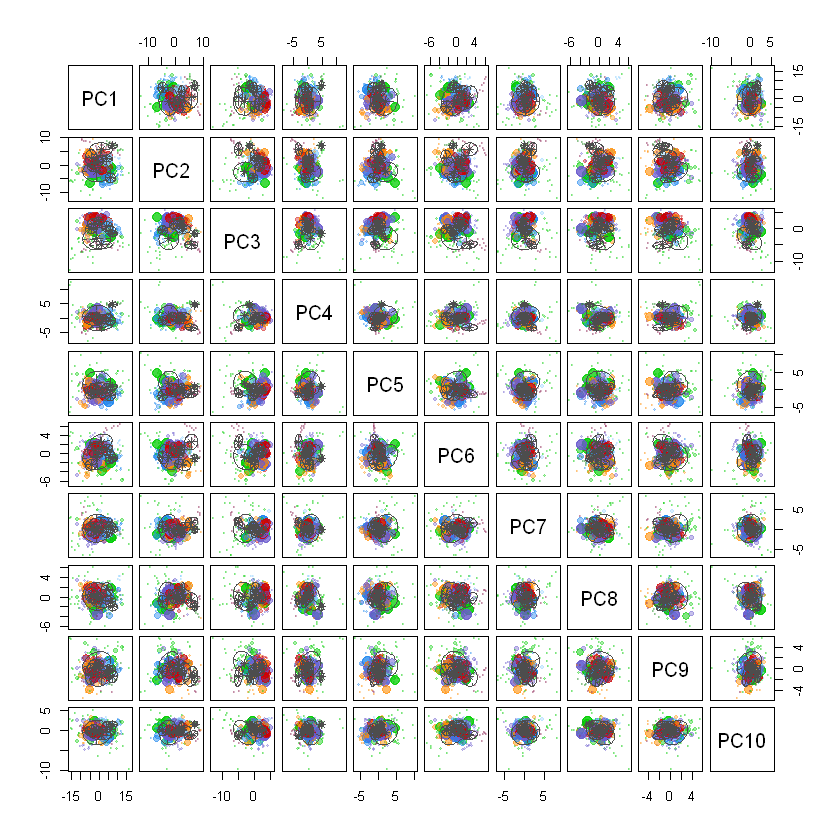

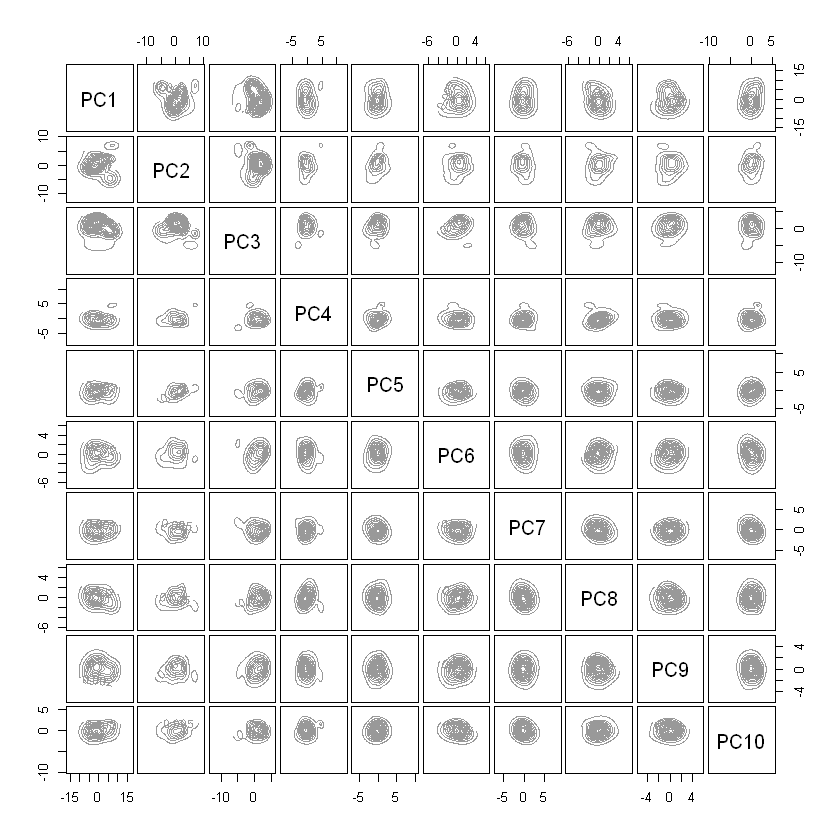

In [29]:
plot(fit) # plot results 

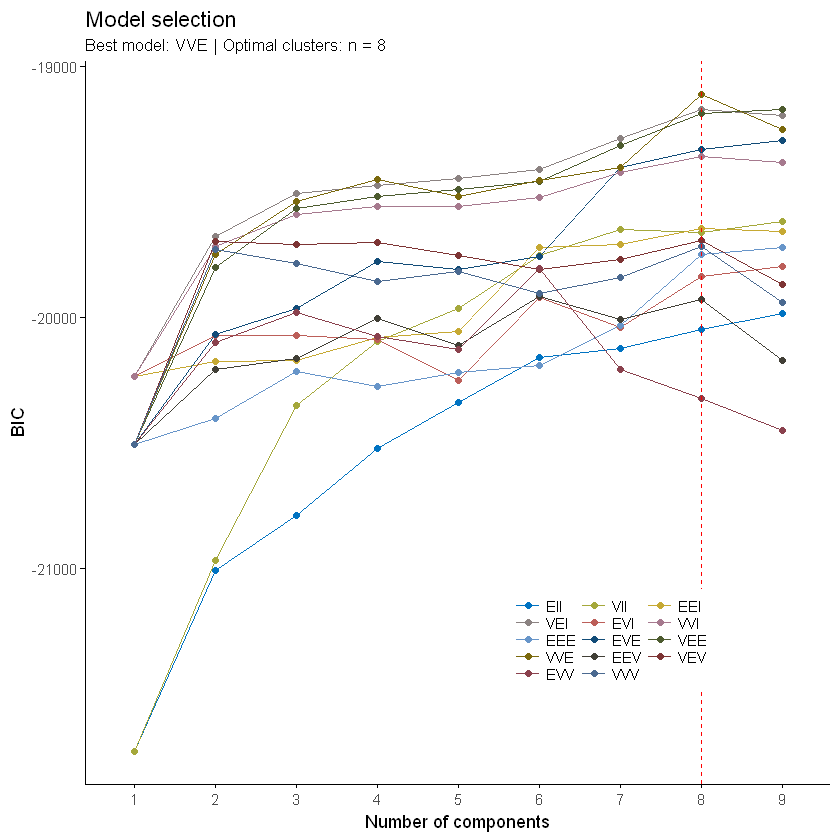

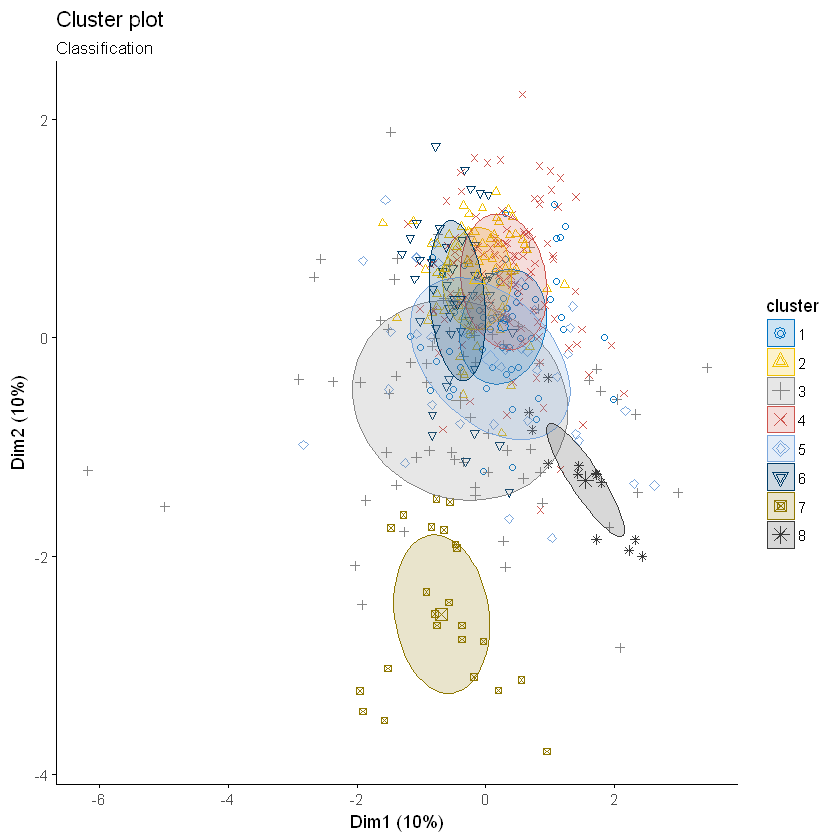

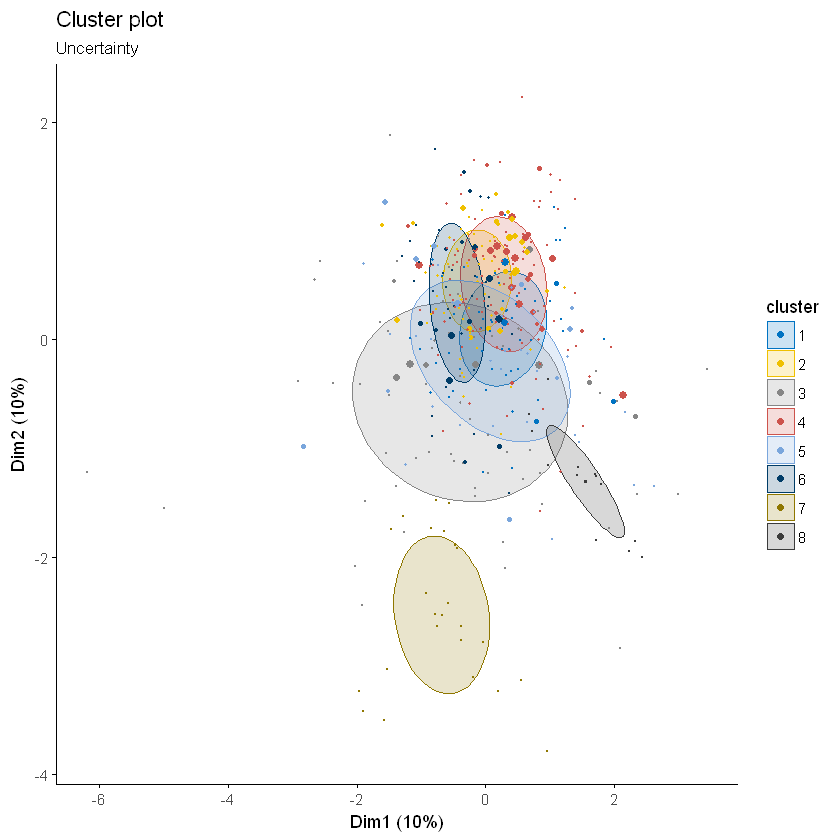

In [30]:
library(factoextra)
mc =fit
# BIC values used for choosing the number of clusters
fviz_mclust(mc, "BIC", palette = "jco")
# Classification: plot showing the clustering
fviz_mclust(mc, "classification", geom = "point", 
            pointsize = 1.5, palette = "jco")
# Classification uncertainty
fviz_mclust(mc, "uncertainty", palette = "jco")

<div class="alert alert-info"><h2>

<font color=red>3. Clustering Method 3</font>
</h2></div>

#### Ref: 
* url tbd

brief description on the methon Write up 

paramater tuning

<div class="alert alert-info"><h1>

<font color=black> Evaluate and Compare (10 points)</font>
</h1></div>


In [ ]:
model accuracy

<div class="alert alert-info"><h1>

<font color=black> Visualize Results (10 points)</font>
</h1></div>


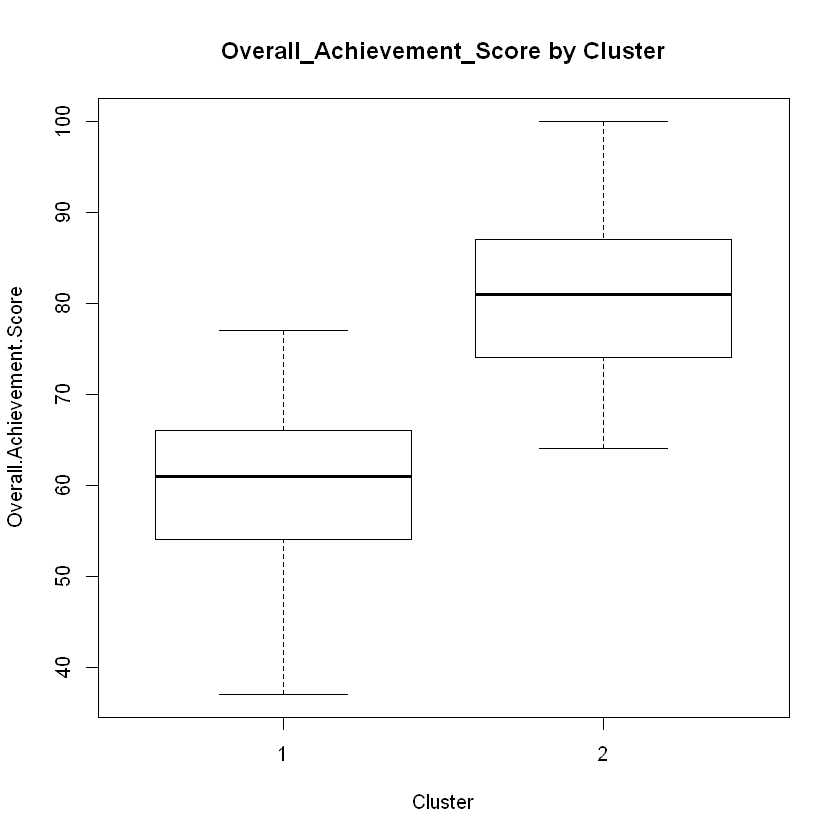

In [27]:
# Compare Overall.Achievement.Score by cluster in boxplot
boxplot(data$Overall.Achievement.Score ~ k2$cluster,
        xlab='Cluster', ylab='Overall.Achievement.Score',
        main='Overall_Achievement_Score by Cluster')

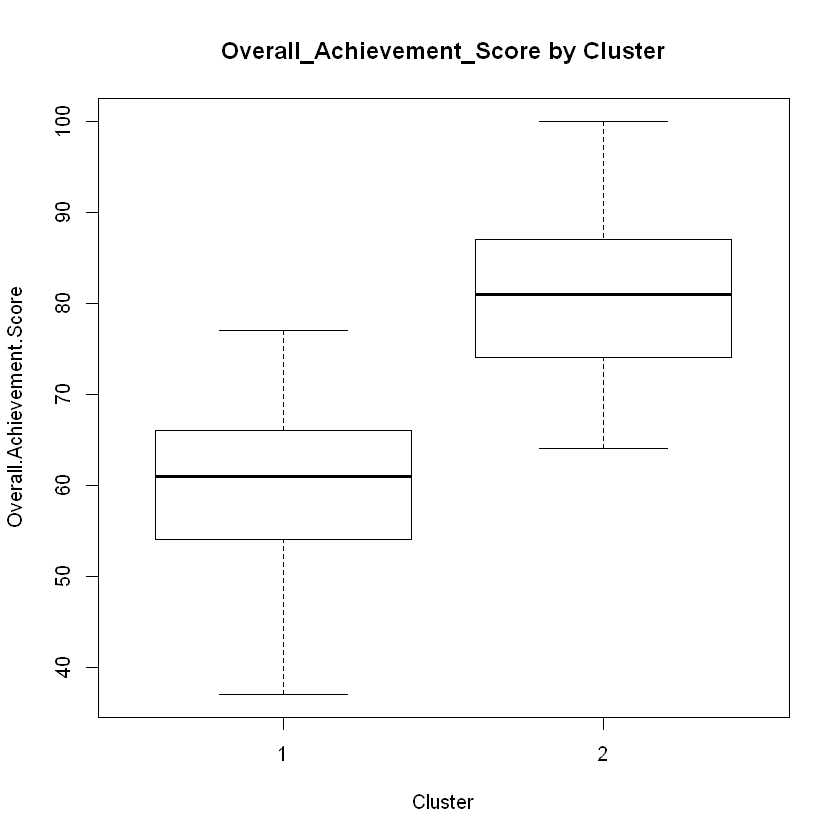

In [28]:
# Compare Overall.Achievement.Score by cluster in boxplot
boxplot(data$Overall.Achievement.Score ~ k2$cluster,
        xlab='Cluster', ylab='Overall.Achievement.Score',
        main='Overall_Achievement_Score by Cluster')


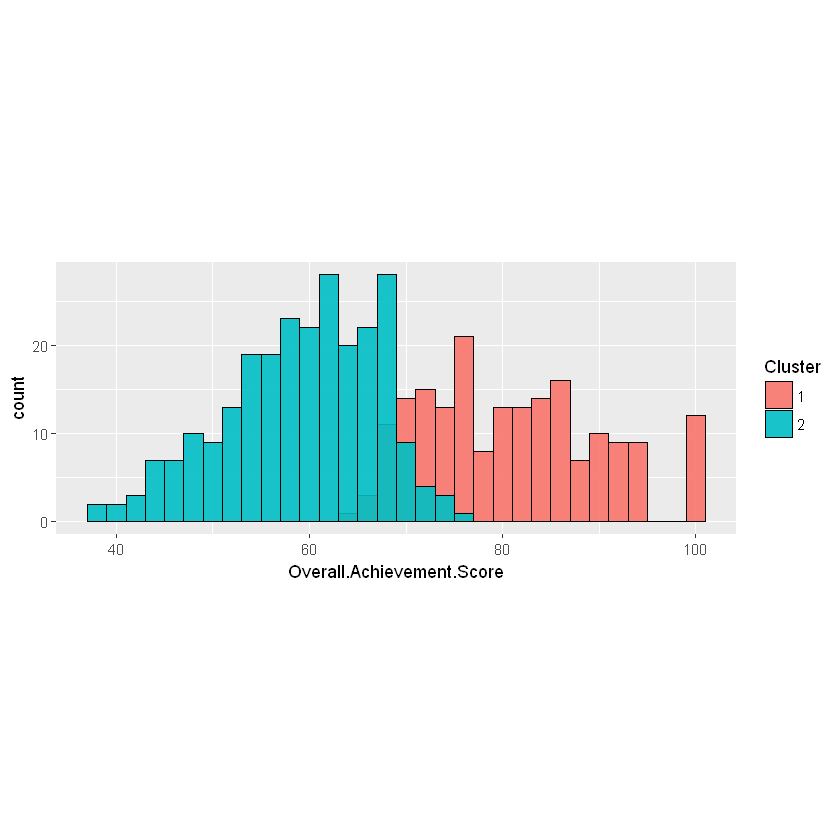

In [98]:
theme_set(theme_gray())
dat= data.frame(data$Overall.Achievement.Score,as.factor(k2$cluster) )
names(dat) = c('Overall.Achievement.Score','Cluster' )
# Overlaid histograms
ggplot(dat, aes(x=Overall.Achievement.Score, fill=Cluster)) +
    geom_histogram(binwidth=2,color="black", alpha=.9, position="identity")+theme(aspect.ratio = .4)

In [39]:
# Cluster sizes
print('------Clusters ------------')
sort(table(k$clust))
clust <- names(sort(table(k$clust)))
for(i in 1:length(k$size)){
    print('------------------------------------------------------------------------------')
    print(paste0('Cluster :', i))
    print(row.names(data[k$clust==clust[i],]))
}

[1] "------Clusters ------------"



  1   2 
190 250 

[1] "------------------------------------------------------------------------------"
[1] "Cluster :1"
  [1] "100307" "110304" "110322" "110323" "110336" "110380" "110416" "111302"
  [9] "111700" "120310" "120346" "120370" "130307" "130326" "130332" "130350"
 [17] "140305" "140309" "150304" "150700" "160313" "160314" "160344" "180308"
 [25] "180325" "180340" "180376" "182700" "190316" "190342" "200350" "220310"
 [33] "230322" "230350" "250314" "250321" "260318" "260347" "260354" "260388"
 [41] "260700" "270311" "280316" "280330" "290315" "290336" "290348" "300312"
 [49] "300314" "310338" "320309" "320317" "320353" "330326" "340362" "340446"
 [57] "340454" "340495" "340496" "340556" "350317" "360337" "360494" "390323"
 [65] "390700" "400315" "410326" "410390" "410394" "410395" "410401" "410408"
 [73] "410483" "410489" "410490" "410508" "410529" "410545" "410547" "410562"
 [81] "410569" "410579" "410595" "440346" "450334" "450341" "450352" "450354"
 [89] "470443" "480316" "490320" "490335

<div class="alert alert-info"><h1>

<font color=black> Summarize the Ramifications (20 points)</font>
</h1></div>


<a class="anchor" id="LAB3"></a>
<div class="alert alert-info"><h1>

<font color=green>DEPLOYMENT [10 Points]</font>
</h1></div>

<a class="anchor" id="LAB3"></a>
<div class="alert alert-info"><h1>

<font color=green>Exceptional Work [10 Points]</font>
</h1></div>

In [159]:
# How does the clustering model do?
table(data.frame(data.class, k$cluster))

          k.cluster
data.class   1   2
         0   8 111
         1 182 139

In [165]:
sil <- silhouette(k$cluster, dist(comp))

In [166]:
rownames(sil) <- rownames(data)
head(sil[, 1:3])

cluster neighbor sil_width 
100307 1       2        0.42638185
100326 2       1        0.47172492
100334 2       1        0.09235233
100348 2       1        0.14366161
110304 1       2        0.31953581
110322 1       2        0.47331328

  cluster size ave.sil.width
1       1  190          0.28
2       2  250          0.35


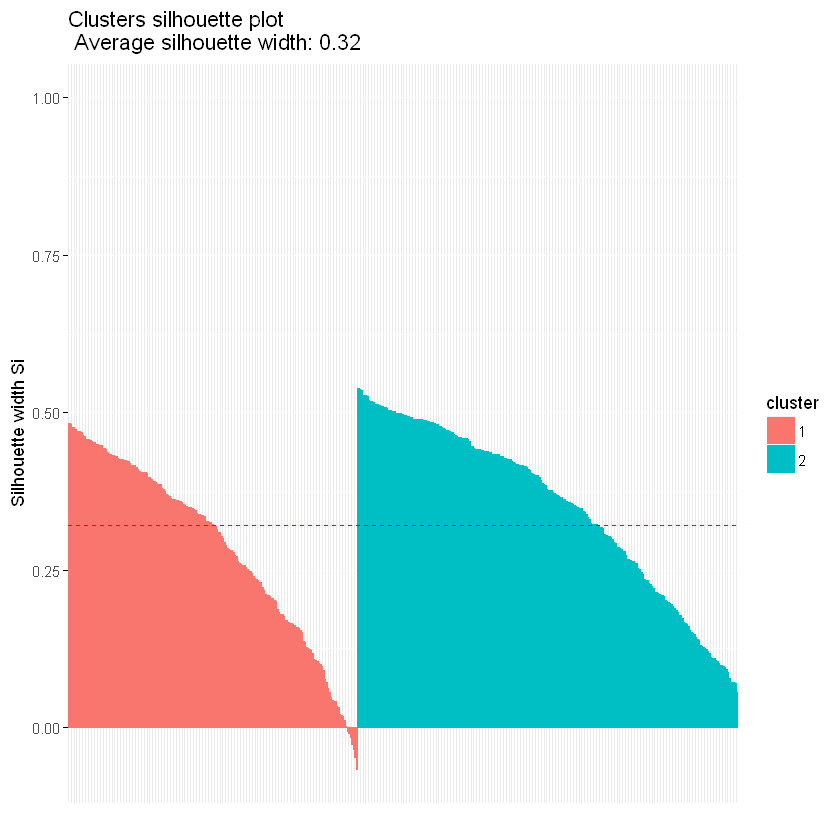

In [167]:
fviz_silhouette(sil)

http://www.sthda.com/english/articles/25-cluster-analysis-in-r-practical-guide/108-clustering-example-4-steps-you-should-know/

In [106]:
#hirechical
 # Enhanced hierarchical clustering
res.hc <- eclust(comp, "hclust") # compute hclust

In [34]:
comp

PC1         PC2         PC3         PC4         PC5         PC6       
1    8.6838904  -5.98549084 -1.36658455 -2.3330948  -0.2017016  -0.4845677
2   -3.1508161   0.29711665  0.98932409 -1.0673577   0.2963948  -0.1072717
3    0.4857469  -0.39675019  0.79781897  0.2348284   0.2897210   0.7875116
4    0.2621664   0.24795981  1.06851490 -0.5795635   0.4000731   1.2681905
5    4.3534564   2.70090448  1.44324188 -0.6895868   1.1433872   0.9373302
6    9.9895650  -2.52592750  0.91706519 -1.3464102  -0.3773785  -1.6706542
7    2.7630762   0.64772218  2.97868604 -0.9346300   0.4442319  -3.5229897
8    1.4168306   2.96446328  2.58997621 -0.6645450   1.4576338  -0.1212387
9   -2.4297722   4.26670994  3.00786374 -1.3313695   1.3738311  -1.1345854
10   0.4200593   4.25101192  2.36675954 -0.7589774   1.1886084  -0.8267507
11   3.6498195   2.97136787  2.52194187 -0.2125043   1.1600702   0.9590391
12   5.2753282   3.42245762  2.13893908  0.2728521   1.2223554   1.5759599
13   2.9030588   3.21476000  1.79633389  3.0768126   5.5334125   0.3978452
14   9.6549744  -0.98726370 -0.48890003  1.6197659   4.6225155  -0.3517705
15   6.3250658  -3.30655823  2.72475381 -1.1933487   0.4161901  -2.2067829
16   0.1455159   1.56219696  3.70821102 -1.3396615  -0.4455514   1.3239508
17   0.7967776   1.32292514  3.86591658 -0.4815832  -0.5208064   1.2597377
18   2.3411572   0.05452373  3.34759153 -1.5253450  -0.6603643   1.1259532
19   2.6541498   0.99946967  3.34430738 -0.5934017  -0.3361017   1.7560220
20   5.3877990   2.74348362 -0.06255879 -2.0962392  -1.2895485   1.8280635
21   0.2849077   4.78786888  0.89635291 -2.1551977  -1.1780380   0.7205408
22  -0.5025843   4.32856240  2.46185559 -1.3634129  -0.5837465   0.3866011
23   0.1016641   4.87499331  1.76516469 -1.5412634  -0.9362487   0.9479742
24   0.6935731   2.92325127  2.72524052 -2.0408880  -1.3720180   0.5422898
25   2.4585636   3.21190551  1.55051294 -1.9383129  -0.9036706   0.9009299
26   5.8178892   2.76417238  0.05635043 -1.7350781  -1.0927695   2.1085138
27  -6.0885629   1.65066923  1.54235146 -3.5658204   2.5471901  -2.8909860
28   8.5680686  -2.15074647 -1.44444891 -3.3666992  -1.8543764  -0.4911606
29  -4.4977749   4.21862161  2.48607514 -0.3982345  -0.6564105   3.8565332
30   5.7165651  -4.57705176  2.54511481  2.1511239  -0.6289610  -2.6924364
... ...         ...         ...         ...         ...         ...       
411  11.7059382 -0.09589987 -1.5364827   1.76575349 -0.91515722 -3.4686353
412   6.0536254  5.89574311  0.1125385   4.01319000  0.94654504 -1.5061127
413   5.6319780  7.93040516 -0.5674267   4.30078845  1.25190813 -0.5170560
414 -14.6138746 -2.11569690 -6.4212194  -1.82251498  4.41883241 -2.0915887
415  -4.5121215 -7.14161178 -7.0803288  -2.38734720  3.83710310 -0.1678155
416  -8.3441349 -5.52592961 -7.2627446  -3.05332012  4.27086915 -0.6374768
417  -7.7265988 -7.43693076 -2.9875175   2.10812989  0.44178005  2.4781235
418 -14.0068299 -6.49245734 -9.3378397   4.49978111 -2.25726389  4.3199465
419   4.4929144  2.72778129  0.6499353   2.39176727  2.21933385  1.0136461
420  -1.4405977 -1.33155891  1.9093051   3.59809412 -3.73493216 -0.5002029
421  -3.9304670 -1.53108024  2.4620763   3.23720860 -3.23282542 -2.1388499
422 -11.5859622  0.04904051 -0.4076850   2.12898844 -2.73752803 -4.7503804
423  -2.3154796 -2.71225019  2.1972750   2.61719581 -3.58864313 -2.1421490
424  -7.8346987 -0.80838195  1.2819402   2.64427821 -2.30762517 -3.3117448
425  -5.8192537 -0.80129187  0.9004565   3.63411263 -3.22330376 -2.3542580
426   8.0486926 -6.95082686 -0.2203944   2.64599835 -4.09080685 -1.5056012
427   4.9490345 -6.16557745 -1.3524403   1.46870178 -2.67493203 -3.3150538
428  -1.7333585 -0.88148377  3.9909404  -0.35776221 -0.71124451 -0.2662257
429  -1.2133050 -1.18382084  3.9185363  -0.20251831 -0.09011319  0.1269886
430   1.8889628 -2.14128849  3.1643891  -0.07173476 -0.40673712  0.8762823
431  -3.0807892 -0.15123996  3.7440829   0.36120314  0.76870903  0.1261129
432   3.1153490 -3.76035340  

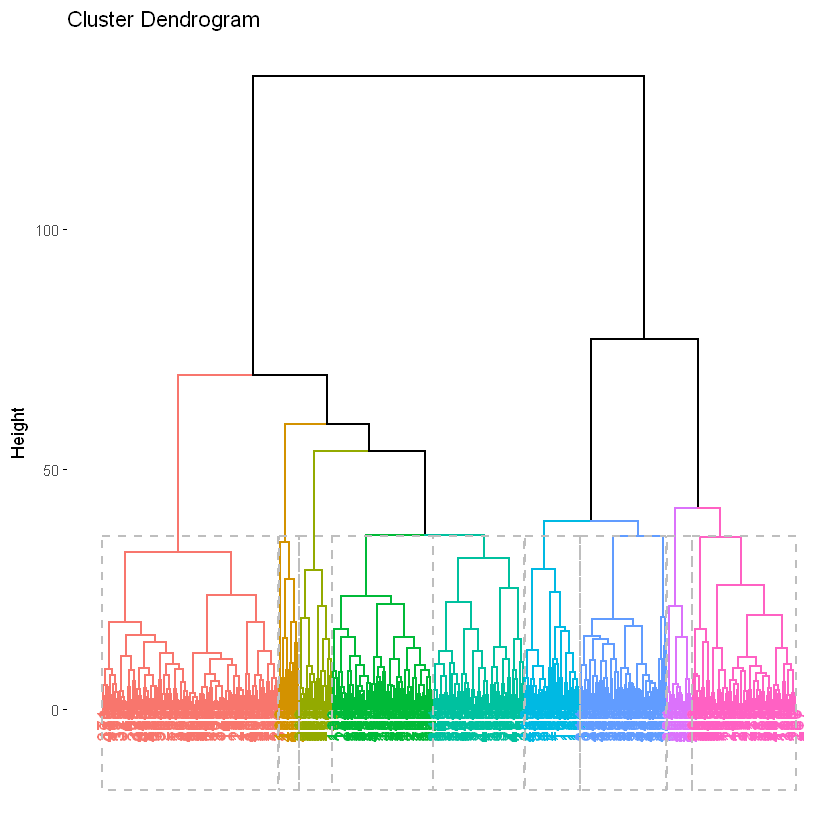

In [107]:
fviz_dend(res.hc, rect = TRUE) # dendrogam

  cluster size ave.sil.width
1       1   55          0.14
2       2   64          0.12
3       3  112          0.20
4       4   66          0.11
5       5   35          0.08
6       6   21          0.13
7       7   58          0.03
8       8   13          0.06
9       9   16          0.41


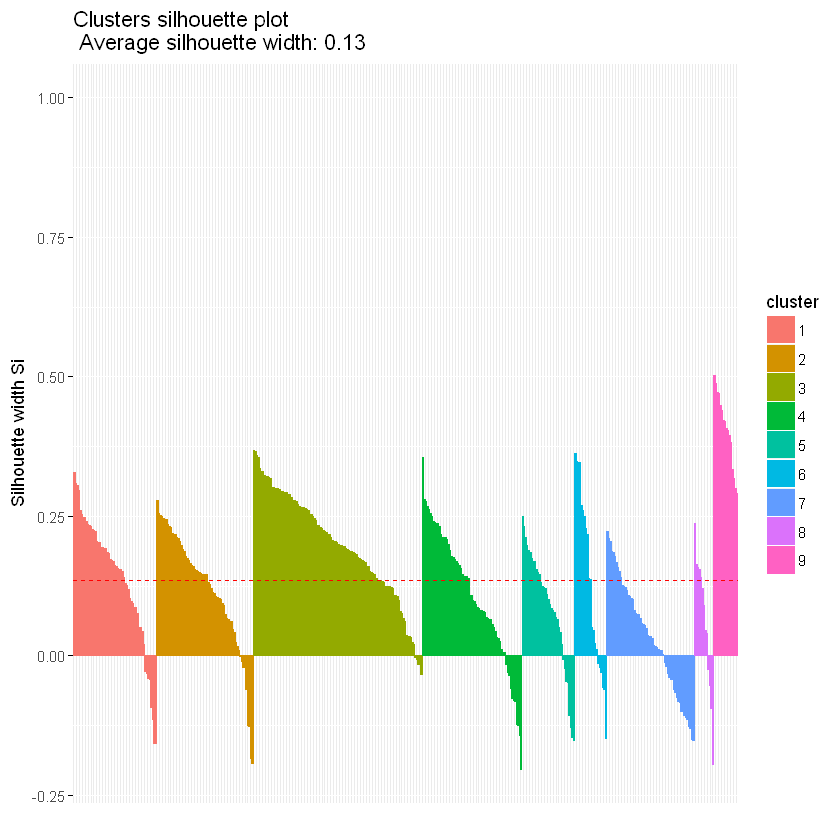

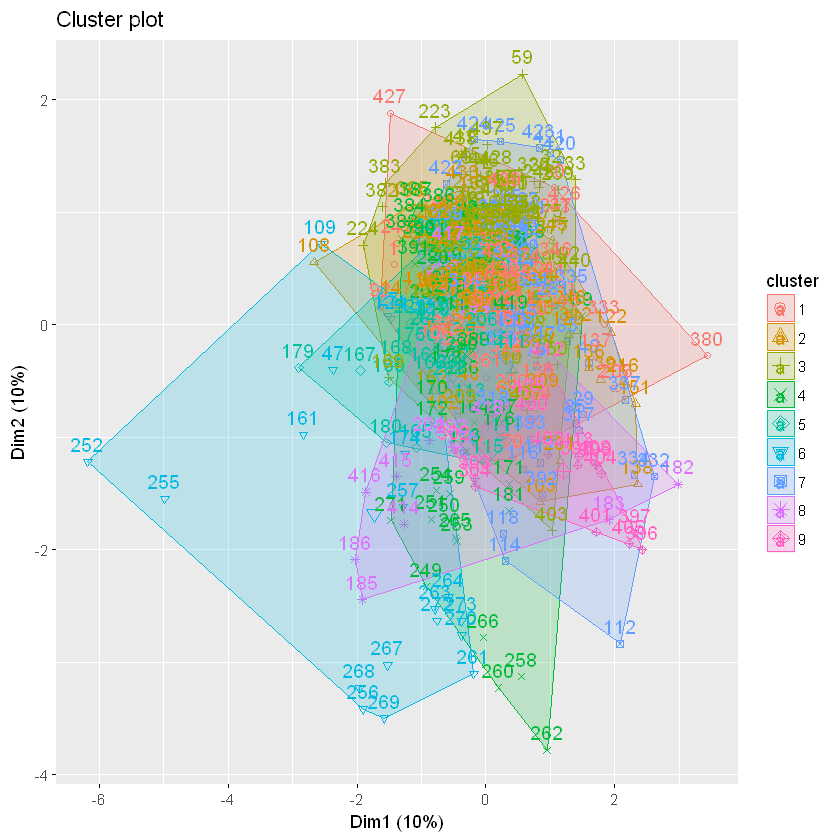

In [108]:
fviz_silhouette(res.hc) # silhouette plot
fviz_cluster(res.hc) # scatter plot